In [2]:
import bnlearn as bn

In [3]:
# Working directory set
import sys
sys.path.append("../scripts/")

In [4]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from clean_data import load_and_clean_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error

pd.set_option('display.max_rows', 400)

In [5]:
df = load_and_clean_data()

In [6]:
df.head()

,female,inpatient,diabetes,SMOKE,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,...,COL_NODESEVAL_92,COL_NODESEVAL_93,COL_NODESEVAL_94,COL_NODESEVAL_95,COL_NODESEVAL_96,COL_NODESEVAL_97,COL_NODESEVAL_98,COL_NODESEVAL_99,COL_NODESEVAL_100,COL_NODESEVAL_101
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
cols_to_keep = ['COL_ILEUS_1', 'TOTHLOS', 'RETURNOR', 'ORGSPCSSI', 'AGE', 'bmi', 'PRHCT', 'STEROID', 'HYPERMED']
df_sub = df[cols_to_keep]

 ## Small Bayes DAG

In [8]:
# Define the network structure
edges = [('COL_ILEUS_1', 'TOTHLOS'),
         ('RETURNOR', 'TOTHLOS'),
         ('ORGSPCSSI', 'TOTHLOS'),
         ('ORGSPCSSI', 'AGE'),
         ('bmi', 'TOTHLOS'),
         ('bmi', 'ORGSPCSSI'),
         ('bmi', 'AGE'), 
         ('PRHCT', 'TOTHLOS'),
         ('AGE', 'STEROID'),
         ('AGE', 'HYPERMED'),
         ('AGE', 'TOTHLOS'),
         ('STEROID', 'HYPERMED'),
         ('STEROID', 'TOTHLOS')]

# Make the actual Bayesian DAG
DAG = bn.make_DAG(edges)

[bnlearn] >bayes DAG created.


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


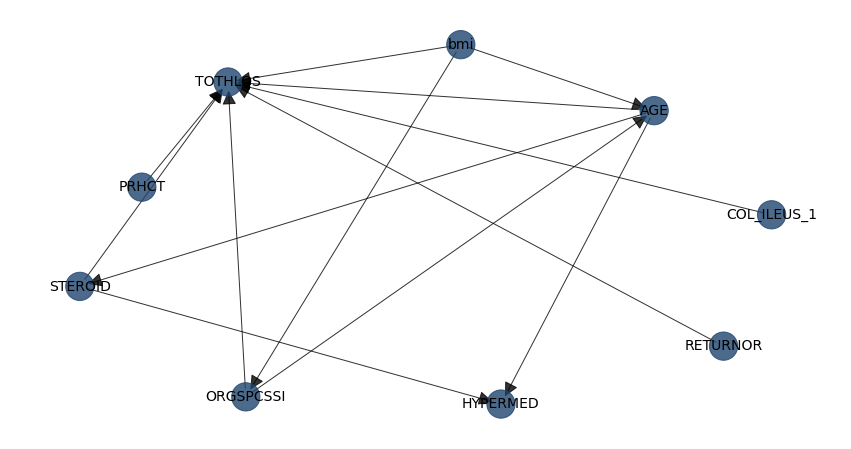

{'pos': {'COL_ILEUS_1': array([1.        , 0.08277427]),
  'TOTHLOS': array([-0.55909377,  0.79127841]),
  'RETURNOR': array([ 0.86225332, -0.61805714]),
  'ORGSPCSSI': array([-0.50813215, -0.8886399 ]),
  'AGE': array([0.66317115, 0.63831628]),
  'bmi': array([0.10857519, 0.99055473]),
  'PRHCT': array([-0.80636237,  0.23021058]),
  'STEROID': array([-0.98420814, -0.2992661 ]),
  'HYPERMED': array([ 0.22379677, -0.92717113])},
 'G': <networkx.classes.digraph.DiGraph at 0x7ff32a039310>,
 'node_properties': {'COL_ILEUS_1': {'node_color': '#1f456e',
   'node_size': 800},
  'TOTHLOS': {'node_color': '#1f456e', 'node_size': 800},
  'RETURNOR': {'node_color': '#1f456e', 'node_size': 800},
  'ORGSPCSSI': {'node_color': '#1f456e', 'node_size': 800},
  'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'bmi': {'node_color': '#1f456e', 'node_size': 800},
  'PRHCT': {'node_color': '#1f456e', 'node_size': 800},
  'STEROID': {'node_color': '#1f456e', 'node_size': 800},
  'HYPERMED': {'node_colo

In [9]:
bn.plot(DAG)

In [10]:
df_sub.reset_index(drop = True, inplace = True)
df_sub.head()

,COL_ILEUS_1,TOTHLOS,RETURNOR,ORGSPCSSI,AGE,bmi,PRHCT,STEROID,HYPERMED
0,0,4.0,0,0,3,2,2,0,0
1,1,12.0,0,0,2,1,1,0,0
2,0,1.0,0,0,5,1,2,1,1
3,0,5.0,0,0,5,1,2,0,1
4,0,4.0,1,0,6,0,2,0,0


In [11]:
model = bn.parameter_learning.fit(DAG, df_sub)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of COL_ILEUS_1:
+----------------+----------+
| COL_ILEUS_1(0) | 0.840203 |
+----------------+----------+
| COL_ILEUS_1(1) | 0.159797 |
+----------------+----------+
[bnlearn] >CPD of TOTHLOS:
+----------------+-----+---------------------+
| AGE            | ... | AGE(7)              |
+----------------+-----+---------------------+
| COL_ILEUS_1    | ... | COL_ILEUS_1(1)      |
+----------------+-----+---------------------+
| ORGSPCSSI      | ... | ORGSPCSSI(1)        |
+----------------+-----+---------------------+
| PRHCT          | ... | PRHCT(2)            |
+----------------+-----+---------------------+
| RETURNOR       | ... | RETURNOR(1)         |
+----------------+-----+---------------------+
| STEROID        | ... | STEROID(1)          |
+----------------+-----+---------------------+
| bmi            | ... | bmi(3)              |
+----------------+-----+---------------------+
| TOTHLOS(0.0)   | ..

In [12]:
q1 = bn.inference.fit(model, variables=['TOTHLOS'], evidence={'COL_ILEUS_1':1})

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00158052 |
+----+-----------+------------+
|  1 |         1 | 0.00216235 |
+----+-----------+------------+
|  2 |         2 | 0.0140745  |
+----+-----------+------------+
|  3 |         3 | 0.0240425  |
+----+-----------+------------+
|  4 |         4 | 0.0262335  |
+----+-----------+------------+


In [13]:
q1.df

,TOTHLOS,p
0,0,0.001581
1,1,0.002162
2,2,0.014075
3,3,0.024043
4,4,0.026233
5,5,0.033494
6,6,0.053986
7,7,0.079483
8,8,0.081425
9,9,0.077707


In [14]:
"""
This function merges the evidence from the data and predictions from the model
@param data: original data (dataframe)
@param preds: predictions from the model (dictionary)
@param evidence: variables and values from the original data used to predict the target (dictionary)
@return X: merged evidence and predictions (dataframe)
@return y: original TOTHLOS
"""
def full_data_preds(data, preds, evidence):
    ev = pd.DataFrame(evidence)
    pred = pd.DataFrame(preds)
    if 'pred_tothlos' in pred.columns:
        pred.drop('pred_tothlos', axis = 1, inplace = True)
    pred = pred.T
    X = data.drop('TOTHLOS', axis = 1)
    y = pd.DataFrame(data['TOTHLOS'])
    ev = ev.merge(pred, on = pred.index)
    X = X.merge(ev, on = ['COL_ILEUS_1', 'RETURNOR', 'ORGSPCSSI', 'AGE', 'PRHCT', 'STEROID', 'HYPERMED', 'bmi'])
    X.drop('key_0', axis = 1, inplace = True)
    X = X.merge(y, on = y.index)
    X.drop('key_0', axis = 1, inplace = True)
    return X

In [15]:
"""
This function finds the 95% confidnece interval for the prediction (just using percentiles here)
@param data: distribution of TOTHLOS for a single patient (array-like)
@param alpha: confidence value (float)
@return lower: lower CI (float)
@return upper: upper CI (float)
@return idx_lower: index of lower (int)
@return idx_upper: index of upper (int)
"""
def find_ci(data, alpha = .95):
    prob_cs = np.cumsum(data)
    idx_lower = np.where(prob_cs >= (1 - alpha) / 2)[0]
    idx_upper = np.where(prob_cs <= alpha + ((1 - alpha) / 2))[0]
    lower_ci = np.min(idx_lower)
    upper_ci = np.max(idx_upper)
    #arr1 = np.percentile(data, [100*((1 - alpha) / 2), 100*(alpha + ((1 - alpha) / 2))])
    #lower = arr1[0]
    #upper = arr1[1]
    #idx_lower = np.where(data == int(lower))[0]
    #idx_upper = np.where(data == int(upper))[0]
    return lower_ci, upper_ci

In [16]:
"""
This function determines if the prediction is within the CI
@param data: data (dataframe)
@param new_col: name of new column for dataframe (string)
@param target: name of target (string)
@param lower: lower CI (float)
@param upper: upper CI (float)
"""
def inci95(data, new_col, target, lower, upper):
    data[new_col] = np.nan
    for i in range(len(data)):
        if data[target][i] >= data[lower][i] and data[target][i] <= data[upper][i]:
            data[new_col][i] = 1
        else:
            data[new_col][i] = 0

In [17]:
#predicted distribution is the null so do this for the actual tothlos on the predicted distribution
def p_val(actual_tothlos, df):
    #add up the probabilites above and below the actual tothlos
    lower = df['p'].loc[np.where(df['TOTHLOS'] <= actual_tothlos)[0]]
    upper = df['p'].loc[np.where(df['TOTHLOS'] >= actual_tothlos)[0]]
    lower_sum = np.sum(lower)
    upper_sum = np.sum(upper)
    """
    count, freq = np.unique(actual_tothlos, return_counts = True)
    cumsum = np.cumsum(freq)
    upper = np.flip(cumsum)
    probs = freq/len(actual_tothlos)
    lower_probs = cumsum/len(actual_tothlos)
    upper_probs = (1 - lower_probs) + probs
    """

    return lower_sum, upper_sum

In [18]:
"""
This function plots the conditional probability distribution from a query dataframe using bn.inference.fit
@param query: bnlearn query dataframe
@param target: name of predicted feature (string)
@param evidence: names and values of the evidence (string)
@param y: probabilities from query dataframe (float)
@param figsize: figure size (tuple)
"""
def plot_dist(query, target, evidence, max_idx, idx_lower, idx_upper, y = 'p', figsize = (8,10)):
    fig, ax = plt.subplots(figsize = figsize)
    plt.bar(list(query[target]), list(query[y]))
    #plt.bar(query[target][max_idx], query[y][max_idx], color = 'green',label = "Most likely LOS")
    plt.vlines(x = [idx_lower, idx_upper], ymin = 0, ymax = query[y][max_idx] + .005, colors = 'red', ls='--', lw=1.5,label = '95% CI')
    plt.title(f'Probability distribution of {target} given {evidence}')
    plt.xlabel(f'{target}')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [19]:
from collections import defaultdict
def inference(data, model, target_var = ['TOTHLOS']):
    #data.reset_index(drop = True, inplace = True)
    features = data.drop(target_var, axis = 1)
    #drop duplicates to be more efficient
    features.drop_duplicates(inplace = True)
    features.reset_index(drop = True, inplace = True)
    preds = defaultdict(dict)
    ev = []
    #loop
    for i in range(len(features)):
        patient = pd.DataFrame(features.loc[i])
        keys = list(patient.index)
        values = list(patient[i])
        evidence = dict(zip(keys, values))
        ev.append(evidence)
        q1 = bn.inference.fit(model, variables= target_var, evidence = evidence)
        df = q1.df
        print(df.index)
        #df.reset_index(drop = True, inplace = True)
        max_idx = np.argmax(df['p'])
        max_prob = np.max(df['p'])
        max_los = int(df[target_var].loc[max_idx])
        preds[i]['pred_tothlos'] = max_los
        preds[i]['p'] = max_prob
        lower, upper = find_ci(np.array(df['p']))
        preds[i]['CI95_lower'] = lower
        preds[i]['CI95_upper'] = upper
        lower_pval, upper_pval = p_val(int(data[target_var].loc[i]), df)
        preds[i]['lower_pval'] = lower_pval
        preds[i]['upper_pval'] = upper_pval
        plot_dist(df, 'TOTHLOS', str(evidence), max_idx, lower, upper)
    X = full_data_preds(data, preds, ev)
    inci95(X, 'in_CI95', 'TOTHLOS', 'CI95_lower', 'CI95_upper')
    return X

In [37]:
temp = bn.sampling(model, 114)

[bnlearn] >Forward sampling for 114 samples..


In [27]:
temp

,COL_ILEUS_1,TOTHLOS,RETURNOR,ORGSPCSSI,AGE,bmi,PRHCT,STEROID,HYPERMED
0,0,6.0,0,0,4,0,1,0,0
1,0,5.0,0,0,7,2,1,0,0
2,0,6.0,0,0,7,0,2,0,0
3,1,12.0,0,0,4,2,2,0,1
4,0,8.0,0,0,4,1,1,0,1
5,0,3.0,0,0,4,1,2,1,0
6,0,5.0,0,0,3,2,2,0,1
7,1,11.0,0,0,5,2,0,0,0
8,0,3.0,0,0,3,1,1,0,0
9,0,22.0,1,0,5,3,1,0,0


[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00272343 |
+----+-----------+------------+
|  1 |         1 | 0.030812   |
+----+-----------+------------+
|  2 |         2 | 0.199344   |
+----+-----------+------------+
|  3 |         3 | 0.247366   |
+----+-----------+------------+
|  4 |         4 | 0.183034   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


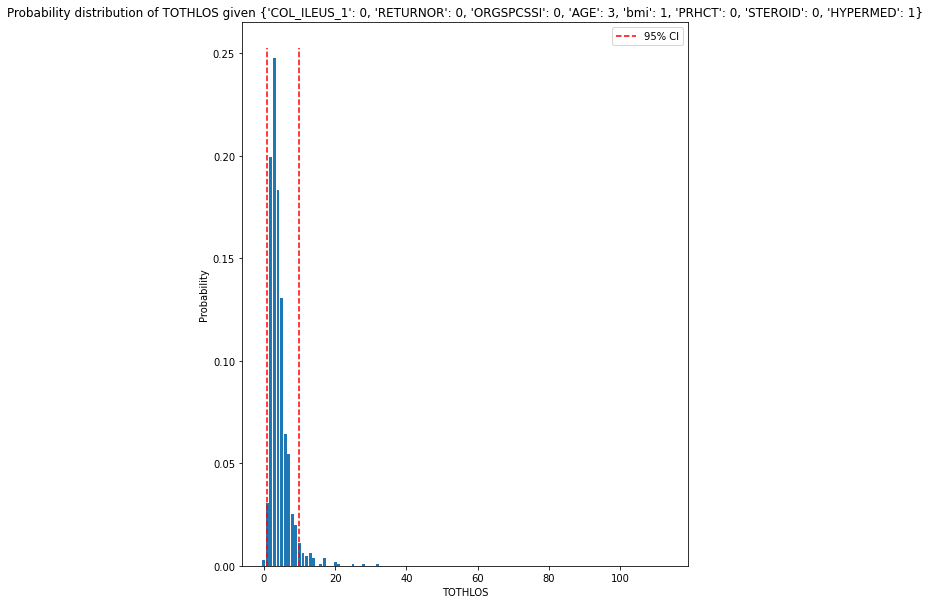

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00163623 |
+----+-----------+------------+
|  1 |         1 | 0.0146517  |
+----+-----------+------------+
|  2 |         2 | 0.0829832  |
+----+-----------+------------+
|  3 |         3 | 0.242423   |
+----+-----------+------------+
|  4 |         4 | 0.195242   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


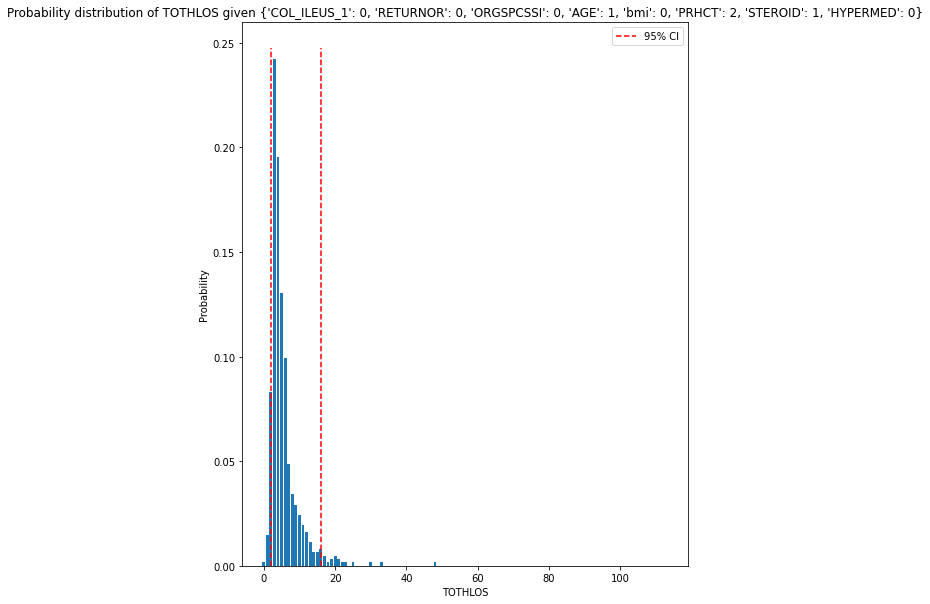

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00272343 |
+----+-----------+------------+
|  1 |         1 | 0.030812   |
+----+-----------+------------+
|  2 |         2 | 0.199344   |
+----+-----------+------------+
|  3 |         3 | 0.247366   |
+----+-----------+------------+
|  4 |         4 | 0.183034   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


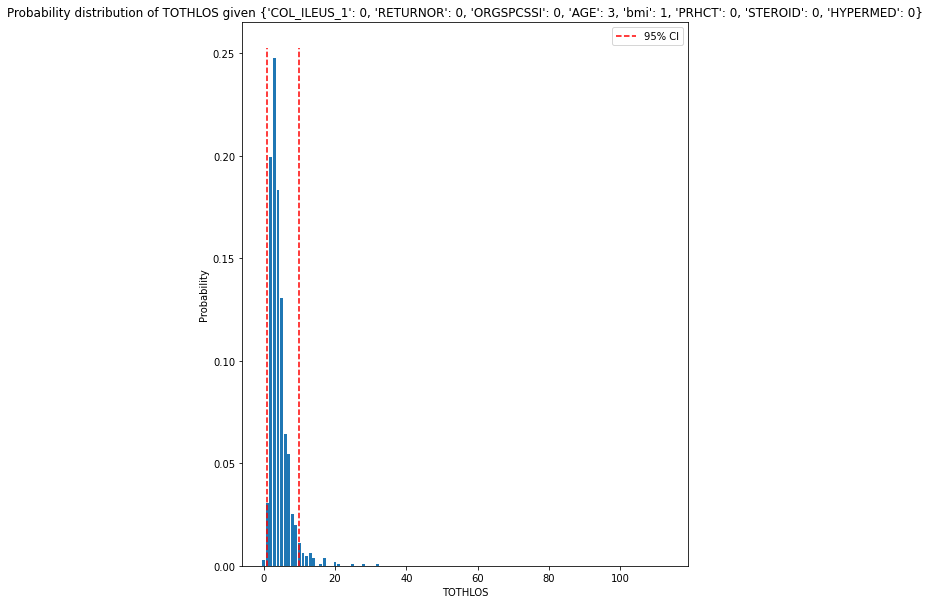

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00313074 |
+----+-----------+------------+
|  1 |         1 | 0.00313074 |
+----+-----------+------------+
|  2 |         2 | 0.00937439 |
+----+-----------+------------+
|  3 |         3 | 0.0203008  |
+----+-----------+------------+
|  4 |         4 | 0.0109353  |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


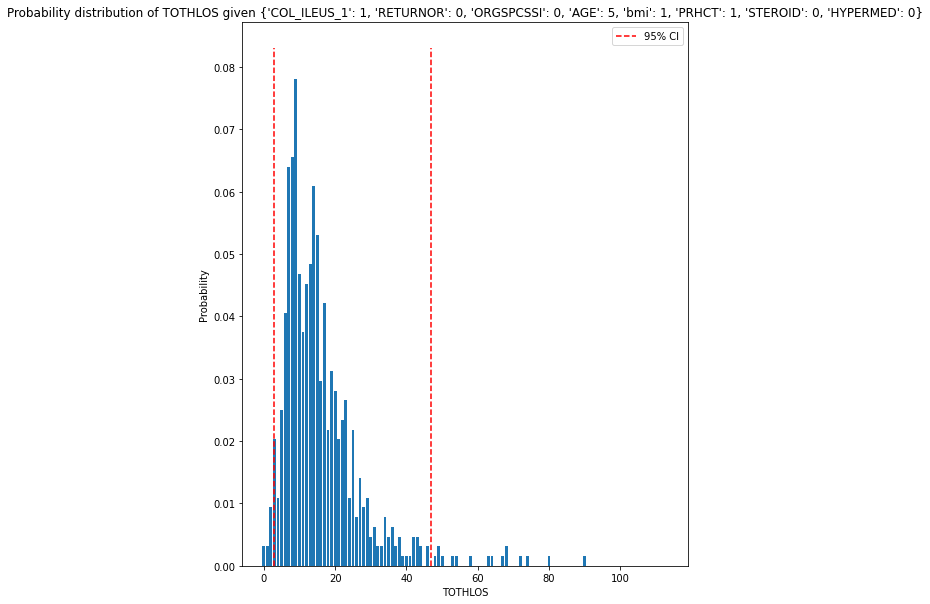

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00734013 |
+----+-----------+------------+
|  1 |         1 | 0.0255416  |
+----+-----------+------------+
|  2 |         2 | 0.178786   |
+----+-----------+------------+
|  3 |         3 | 0.251885   |
+----+-----------+------------+
|  4 |         4 | 0.186419   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


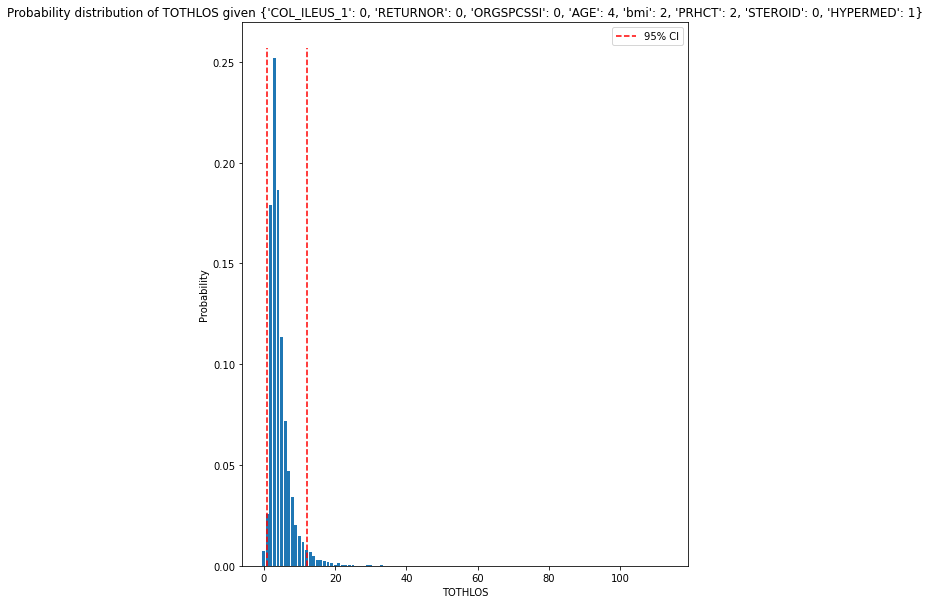

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00103826 |
+----+-----------+------------+
|  1 |         1 | 0.0134266  |
+----+-----------+------------+
|  2 |         2 | 0.0619477  |
+----+-----------+------------+
|  3 |         3 | 0.177572   |
+----+-----------+------------+
|  4 |         4 | 0.130084   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


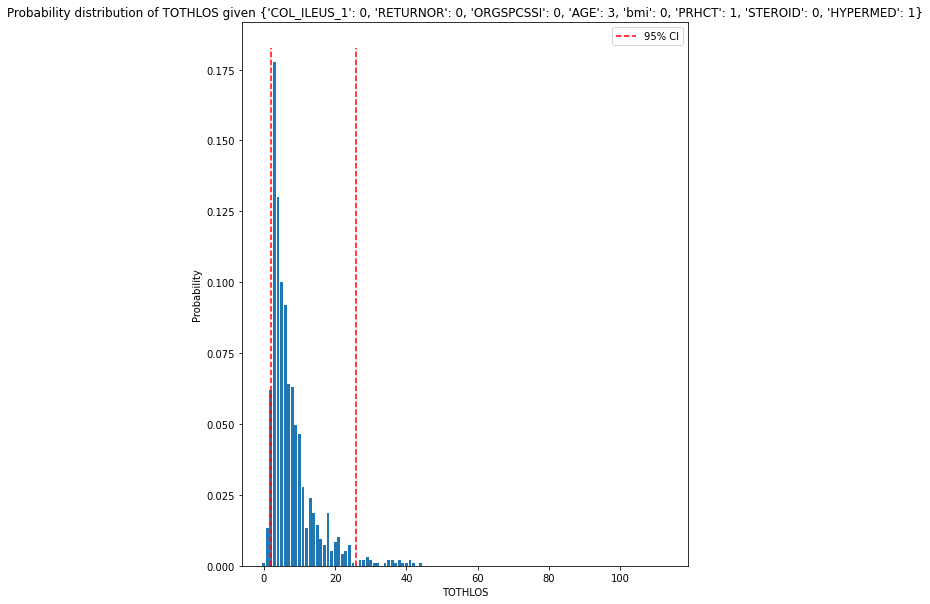

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00575005 |
+----+-----------+------------+
|  1 |         1 | 0.0171315  |
+----+-----------+------------+
|  2 |         2 | 0.166498   |
+----+-----------+------------+
|  3 |         3 | 0.249219   |
+----+-----------+------------+
|  4 |         4 | 0.197709   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


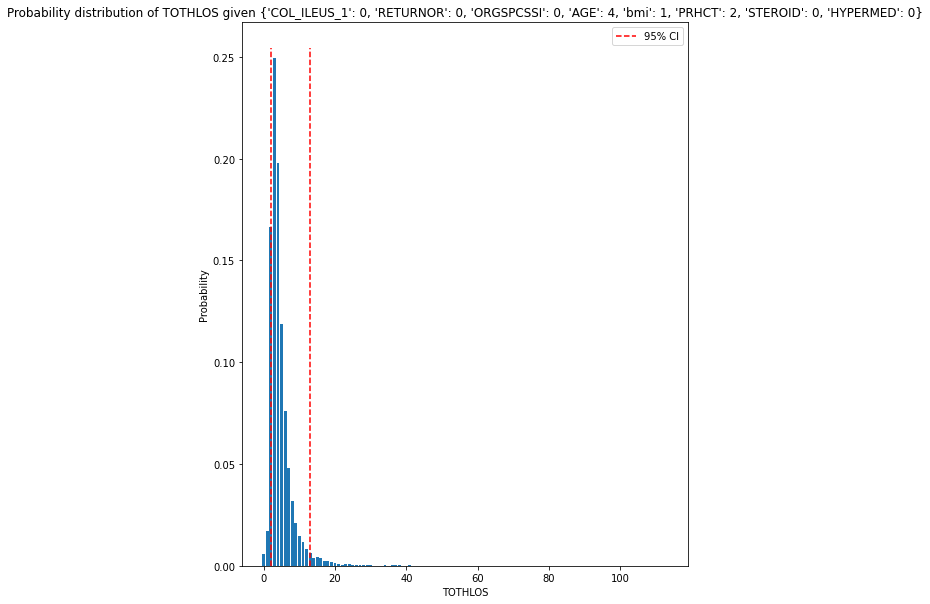

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00501476 |
+----+-----------+------------+
|  1 |         1 | 0.0154004  |
+----+-----------+------------+
|  2 |         2 | 0.140565   |
+----+-----------+------------+
|  3 |         3 | 0.213622   |
+----+-----------+------------+
|  4 |         4 | 0.184256   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


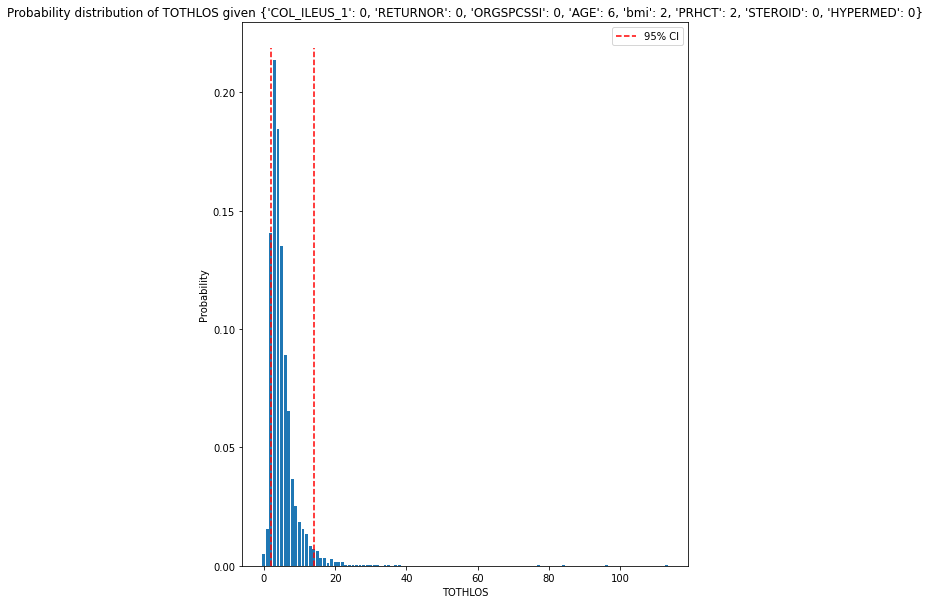

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00605567 |
+----+-----------+------------+
|  1 |         1 | 0.0200679  |
+----+-----------+------------+
|  2 |         2 | 0.152925   |
+----+-----------+------------+
|  3 |         3 | 0.238728   |
+----+-----------+------------+
|  4 |         4 | 0.185793   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


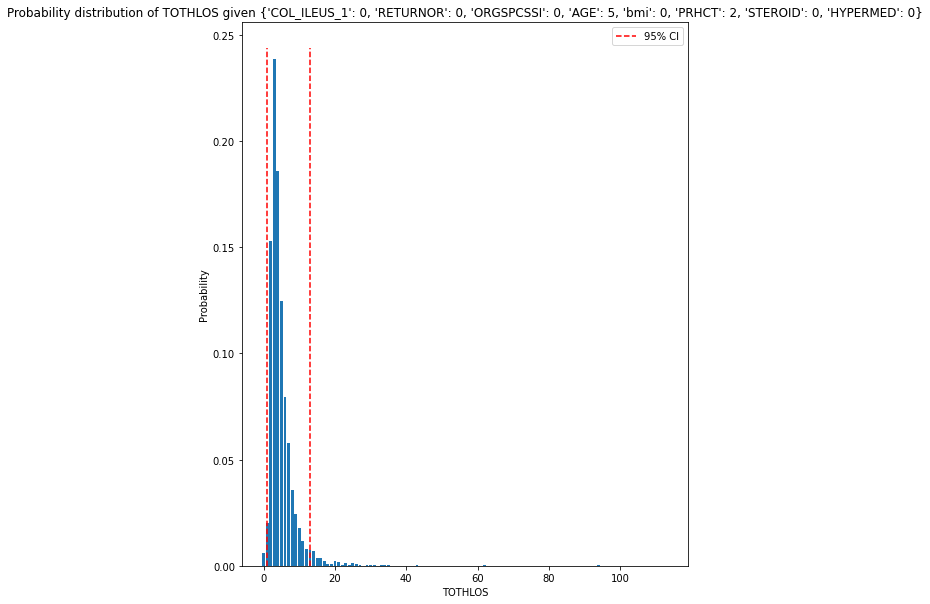

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00313074 |
+----+-----------+------------+
|  1 |         1 | 0.00313074 |
+----+-----------+------------+
|  2 |         2 | 0.00937439 |
+----+-----------+------------+
|  3 |         3 | 0.0203008  |
+----+-----------+------------+
|  4 |         4 | 0.0109353  |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


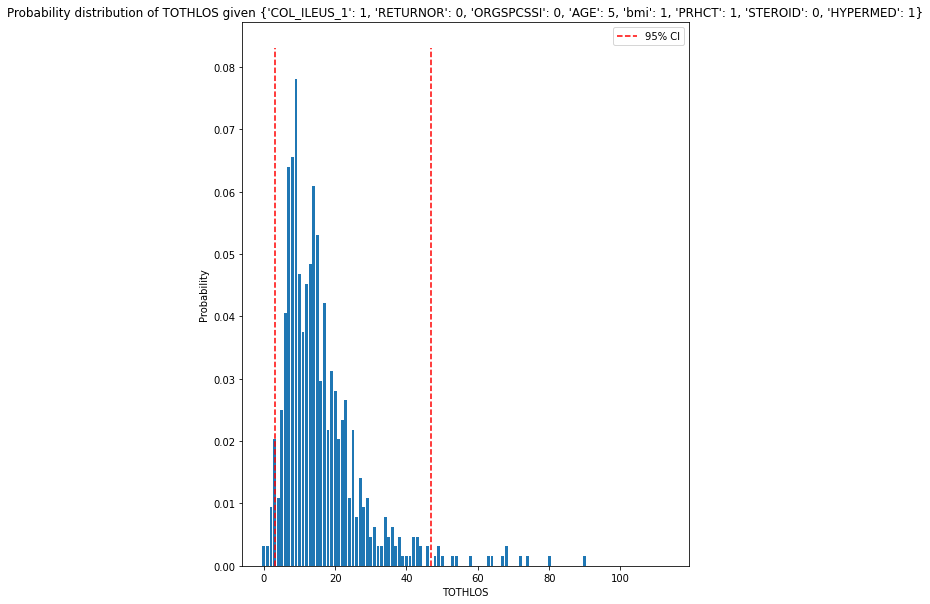

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00103246 |
+----+-----------+------------+
|  1 |         1 | 0.00412102 |
+----+-----------+------------+
|  2 |         2 | 0.0478757  |
+----+-----------+------------+
|  3 |         3 | 0.101411   |
+----+-----------+------------+
|  4 |         4 | 0.111706   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


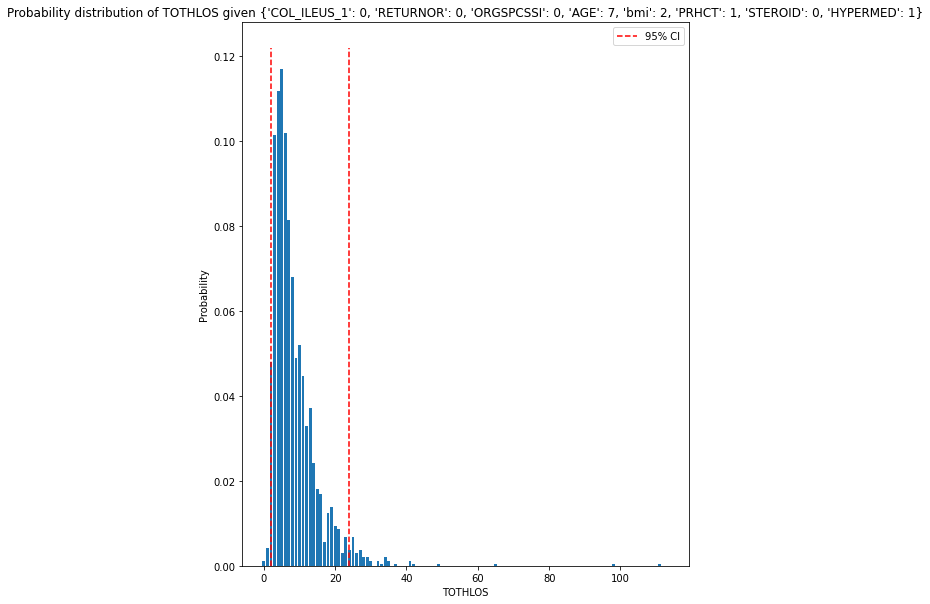

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000147755 |
+----+-----------+-------------+
|  1 |         1 | 0.000147755 |
+----+-----------+-------------+
|  2 |         2 | 0.0518928   |
+----+-----------+-------------+
|  3 |         3 | 0.103638    |
+----+-----------+-------------+
|  4 |         4 | 0.103638    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


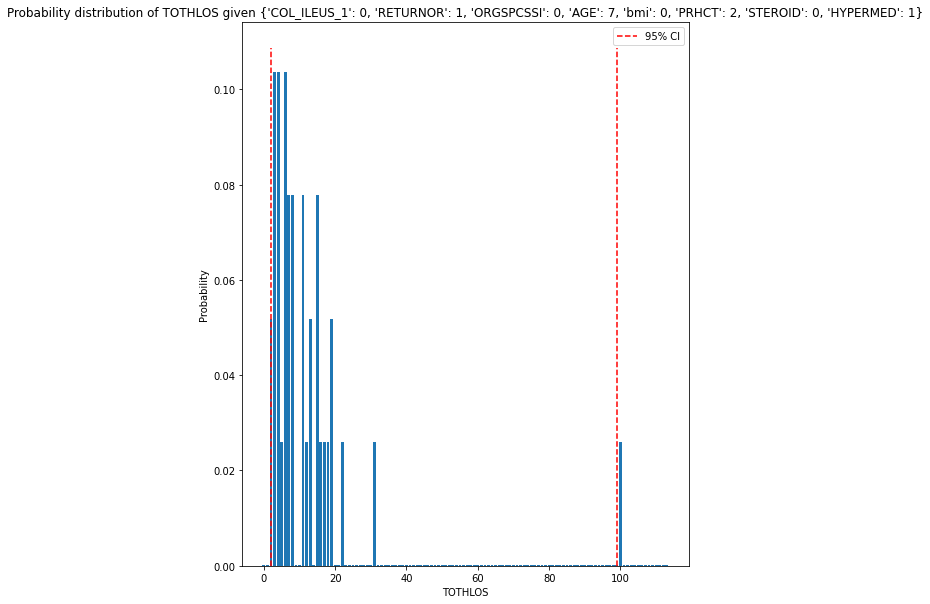

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00170282 |
+----+-----------+------------+
|  1 |         1 | 0.00680547 |
+----+-----------+------------+
|  2 |         2 | 0.0693979  |
+----+-----------+------------+
|  3 |         3 | 0.137093   |
+----+-----------+------------+
|  4 |         4 | 0.147979   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


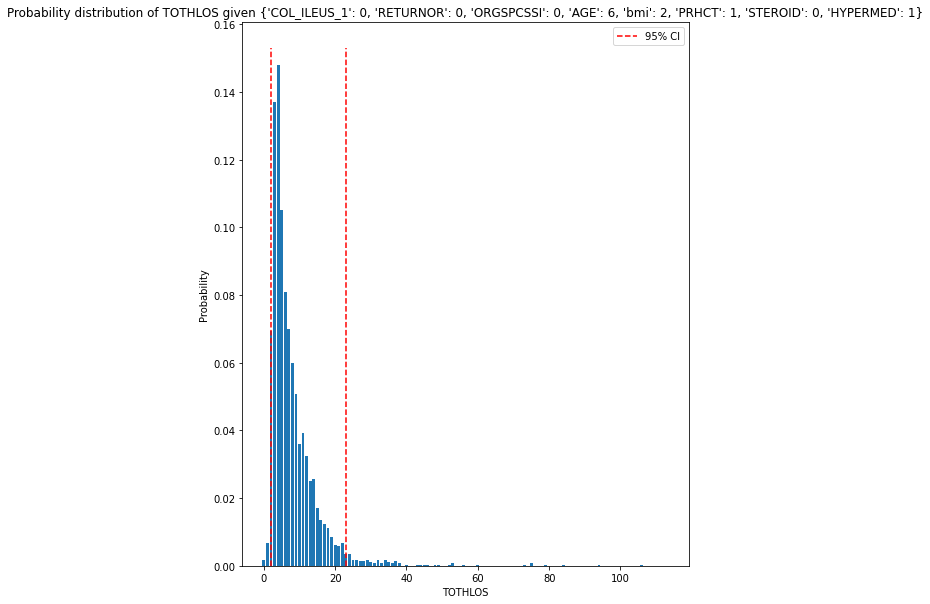

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00734013 |
+----+-----------+------------+
|  1 |         1 | 0.0255416  |
+----+-----------+------------+
|  2 |         2 | 0.178786   |
+----+-----------+------------+
|  3 |         3 | 0.251885   |
+----+-----------+------------+
|  4 |         4 | 0.186419   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


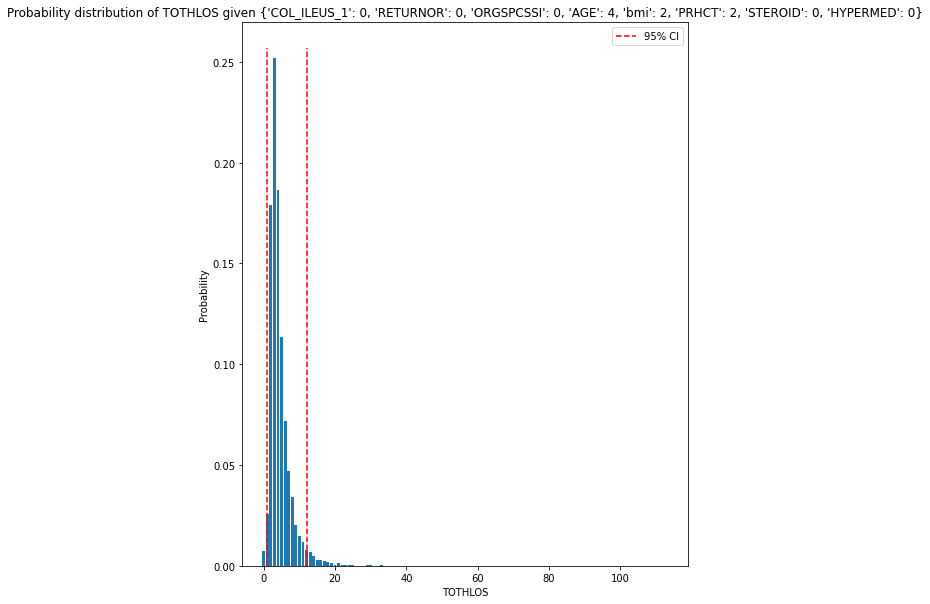

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00560417 |
+----+-----------+------------+
|  1 |         1 | 0.00373789 |
+----+-----------+------------+
|  2 |         2 | 0.05786    |
+----+-----------+------------+
|  3 |         3 | 0.150241   |
+----+-----------+------------+
|  4 |         4 | 0.16797    |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


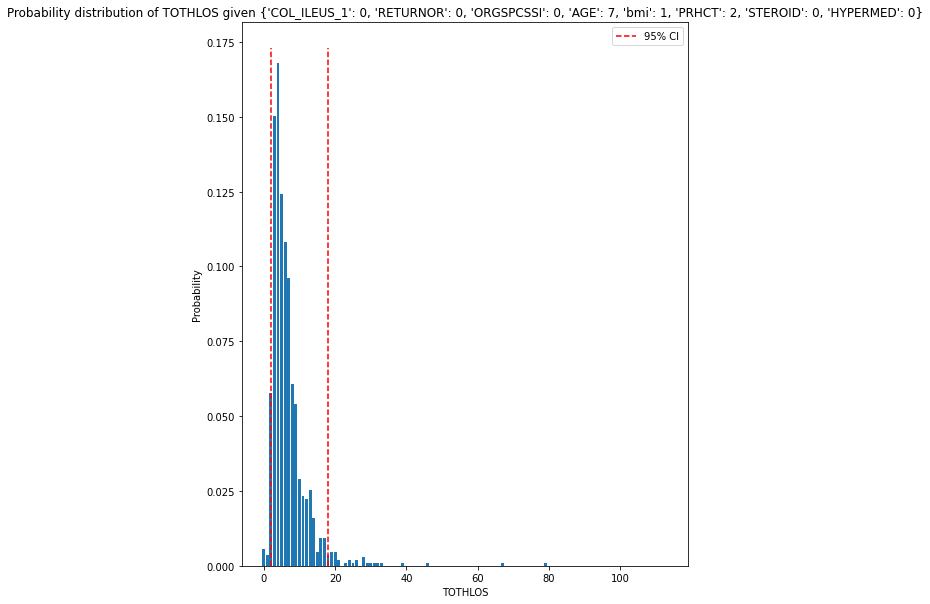

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 7.26105e-05 |
+----+-----------+-------------+
|  1 |         1 | 7.26105e-05 |
+----+-----------+-------------+
|  2 |         2 | 0.0255014   |
+----+-----------+-------------+
|  3 |         3 | 0.0382158   |
+----+-----------+-------------+
|  4 |         4 | 0.012787    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


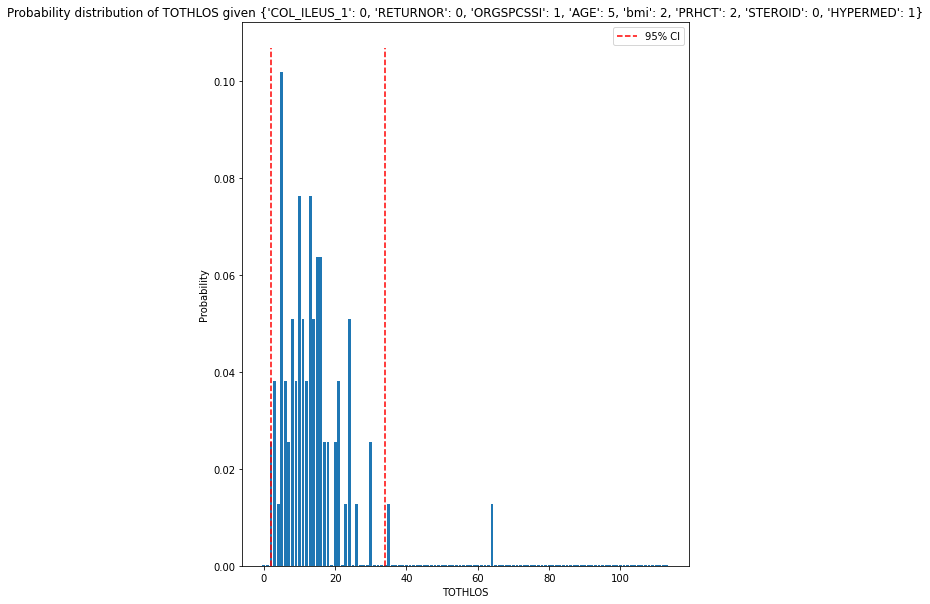

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00137835 |
+----+-----------+------------+
|  1 |         1 | 0.00411938 |
+----+-----------+------------+
|  2 |         2 | 0.0123425  |
+----+-----------+------------+
|  3 |         3 | 0.0287887  |
+----+-----------+------------+
|  4 |         4 | 0.0424939  |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


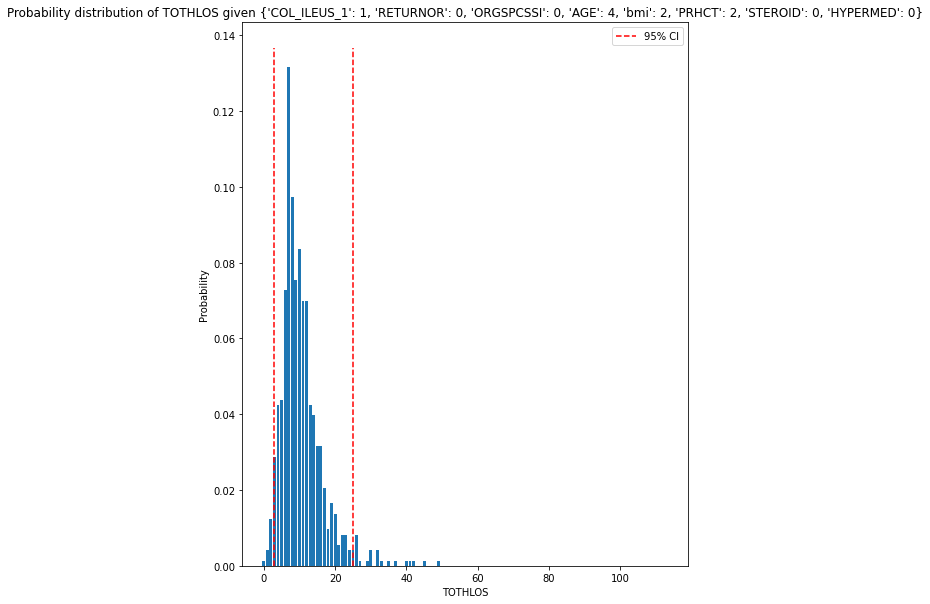

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00528609 |
+----+-----------+------------+
|  1 |         1 | 0.0115873  |
+----+-----------+------------+
|  2 |         2 | 0.11566    |
+----+-----------+------------+
|  3 |         3 | 0.212618   |
+----+-----------+------------+
|  4 |         4 | 0.19717    |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


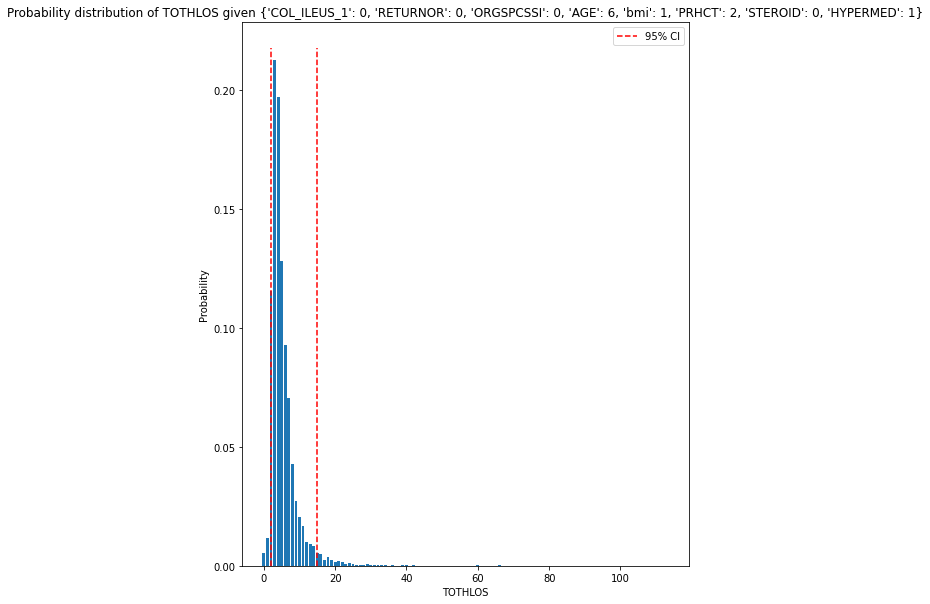

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.0040037  |
+----+-----------+------------+
|  1 |         1 | 0.00633809 |
+----+-----------+------------+
|  2 |         2 | 0.0723678  |
+----+-----------+------------+
|  3 |         3 | 0.146068   |
+----+-----------+------------+
|  4 |         4 | 0.125725   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


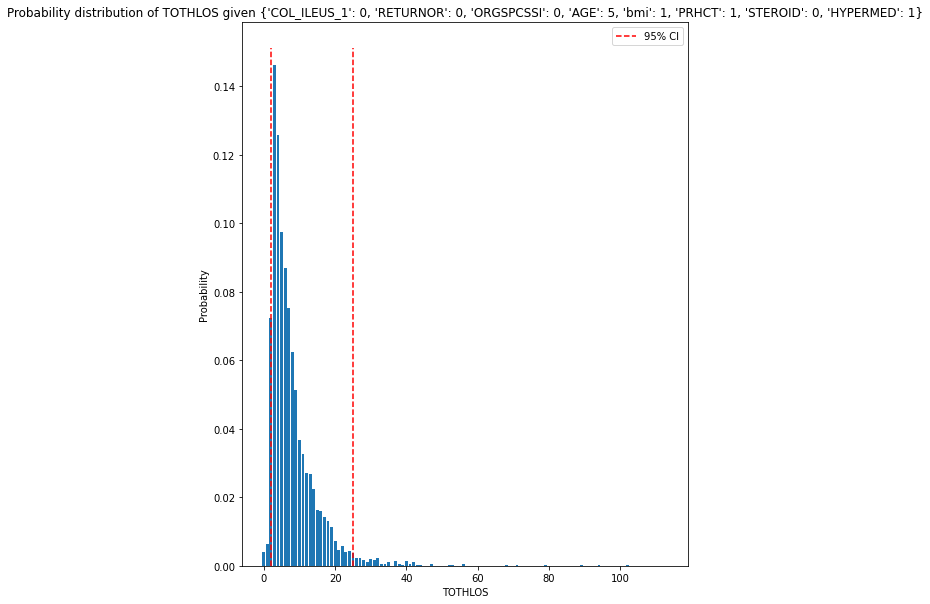

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00026377 |
+----+-----------+------------+
|  1 |         1 | 0.00026377 |
+----+-----------+------------+
|  2 |         2 | 0.0926381  |
+----+-----------+------------+
|  3 |         3 | 0.2312     |
+----+-----------+------------+
|  4 |         4 | 0.0926381  |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


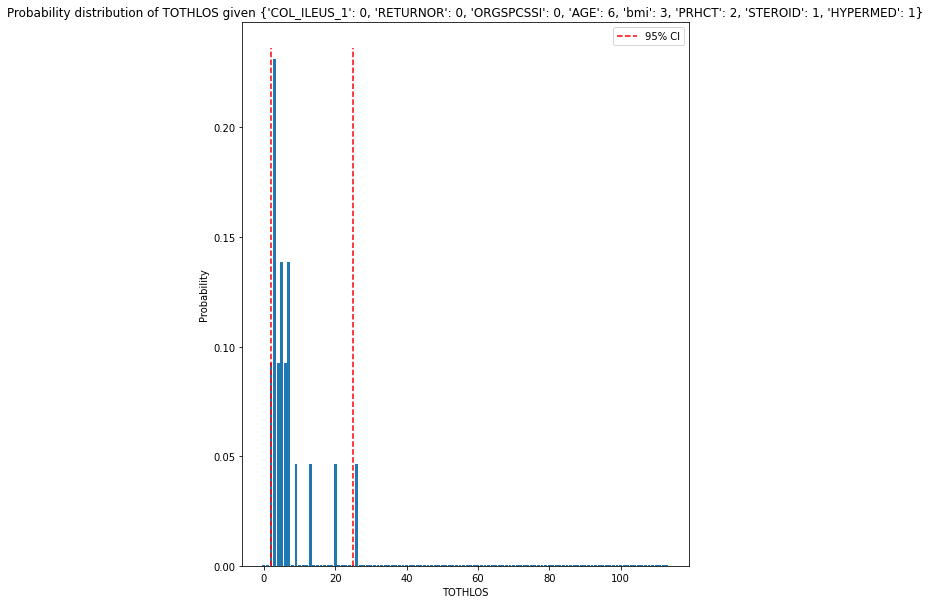

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00200881 |
+----+-----------+------------+
|  1 |         1 | 0.008001   |
+----+-----------+------------+
|  2 |         2 | 0.0998814  |
+----+-----------+------------+
|  3 |         3 | 0.18577    |
+----+-----------+------------+
|  4 |         4 | 0.165796   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


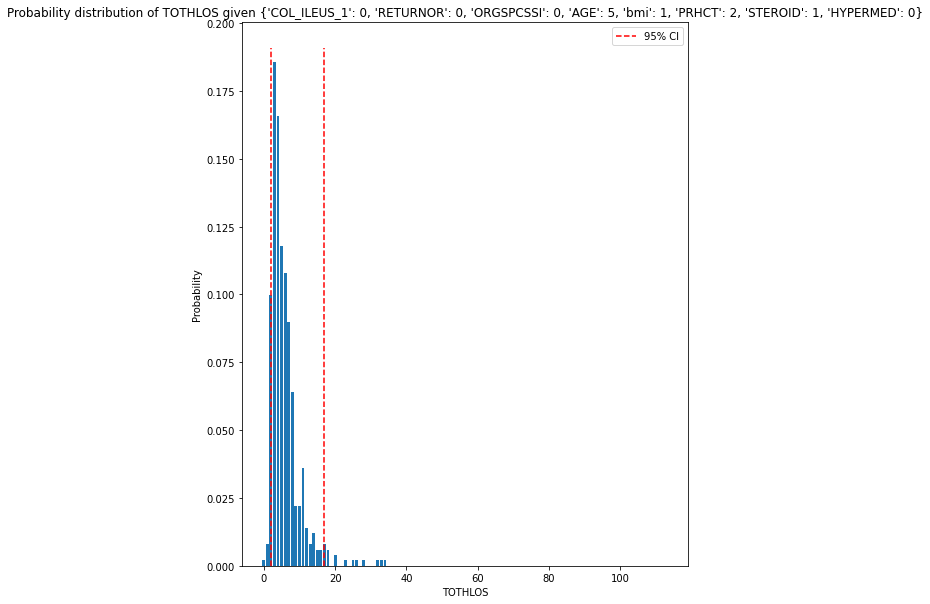

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00120583 |
+----+-----------+------------+
|  1 |         1 | 0.00682234 |
+----+-----------+------------+
|  2 |         2 | 0.0838488  |
+----+-----------+------------+
|  3 |         3 | 0.134397   |
+----+-----------+------------+
|  4 |         4 | 0.131589   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


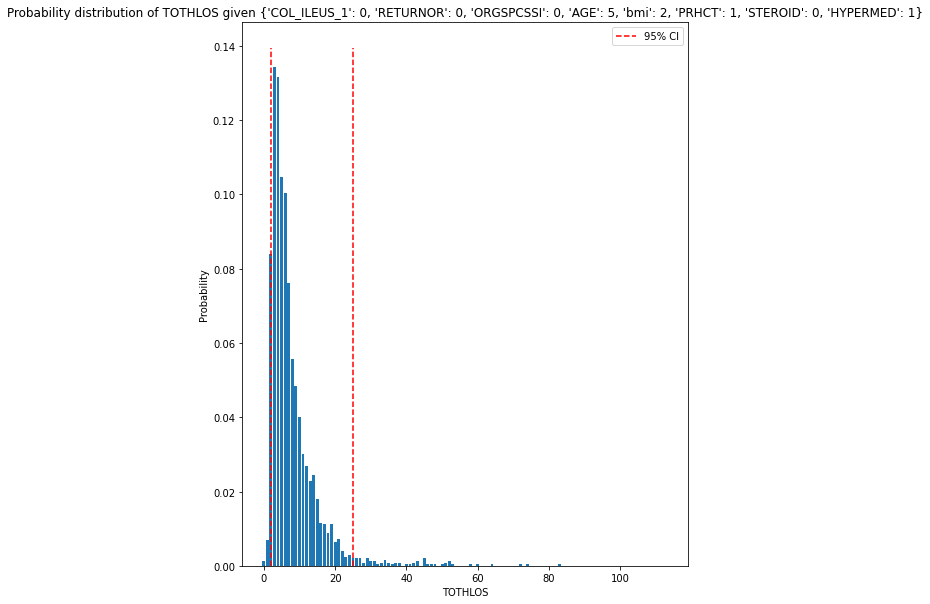

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00538831 |
+----+-----------+------------+
|  1 |         1 | 0.019144   |
+----+-----------+------------+
|  2 |         2 | 0.151313   |
+----+-----------+------------+
|  3 |         3 | 0.235338   |
+----+-----------+------------+
|  4 |         4 | 0.188454   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


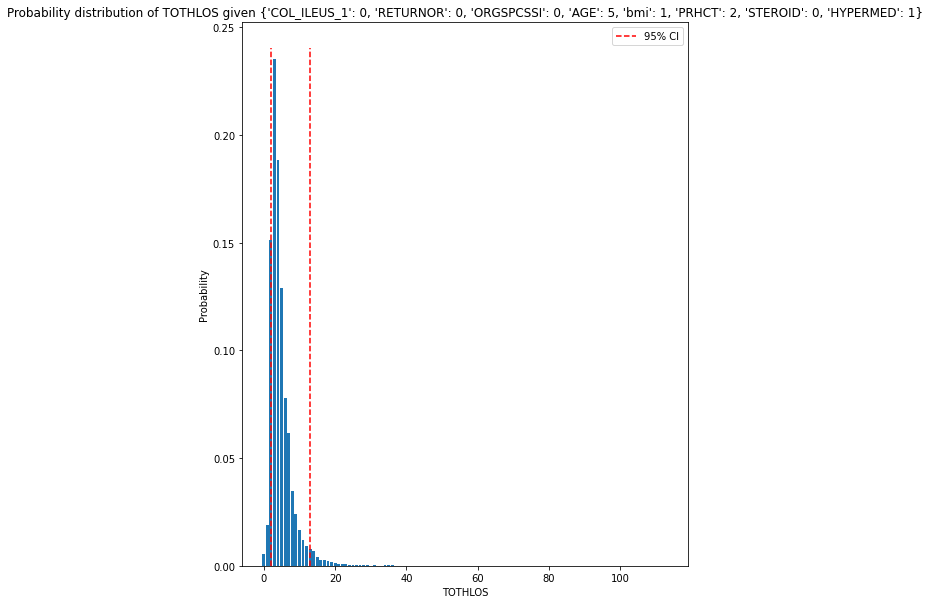

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00605567 |
+----+-----------+------------+
|  1 |         1 | 0.0200679  |
+----+-----------+------------+
|  2 |         2 | 0.152925   |
+----+-----------+------------+
|  3 |         3 | 0.238728   |
+----+-----------+------------+
|  4 |         4 | 0.185793   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


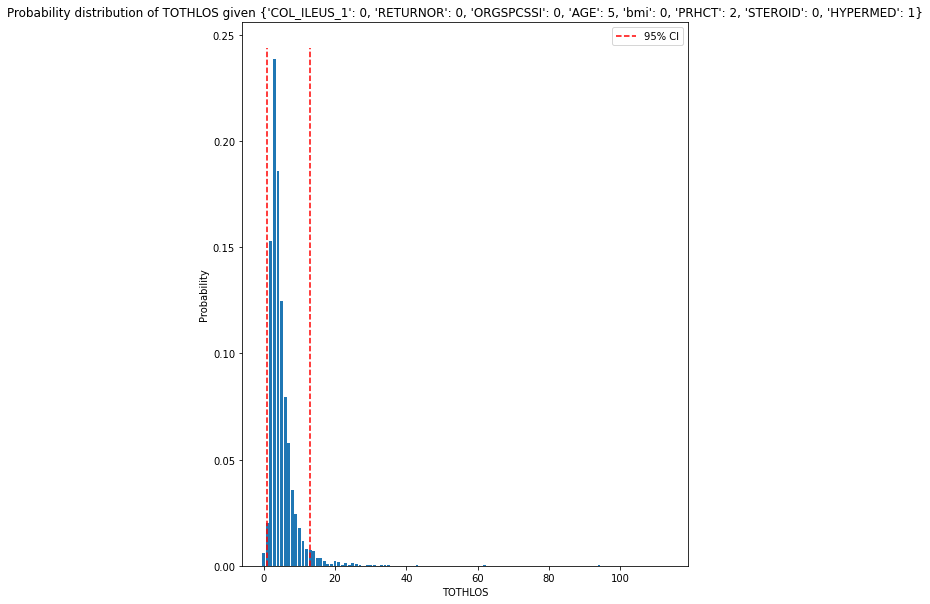

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.0040037  |
+----+-----------+------------+
|  1 |         1 | 0.00633809 |
+----+-----------+------------+
|  2 |         2 | 0.0723678  |
+----+-----------+------------+
|  3 |         3 | 0.146068   |
+----+-----------+------------+
|  4 |         4 | 0.125725   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


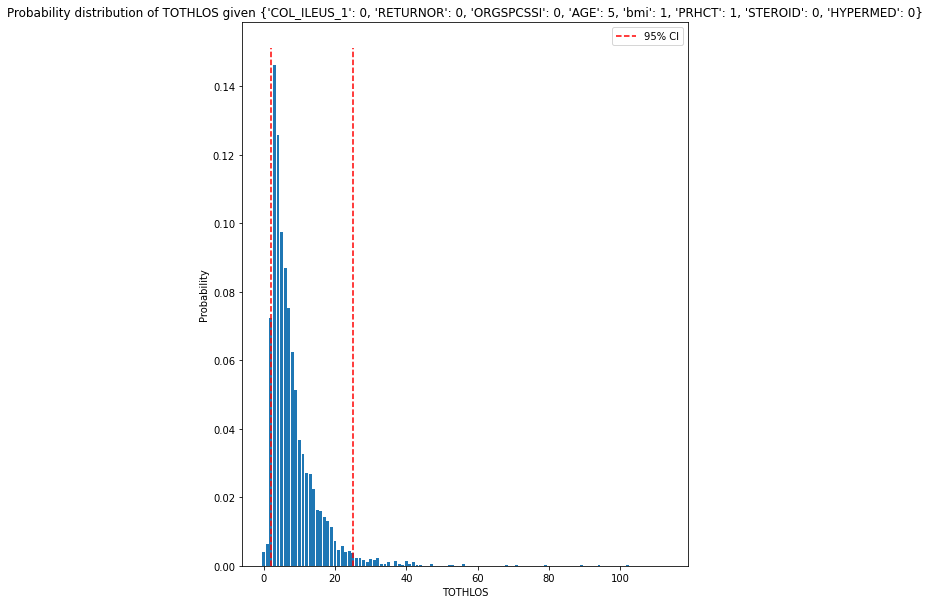

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 5.50973e-05 |
+----+-----------+-------------+
|  1 |         1 | 0.0193506   |
+----+-----------+-------------+
|  2 |         2 | 0.0193506   |
+----+-----------+-------------+
|  3 |         3 | 0.0772371   |
+----+-----------+-------------+
|  4 |         4 | 0.144771    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


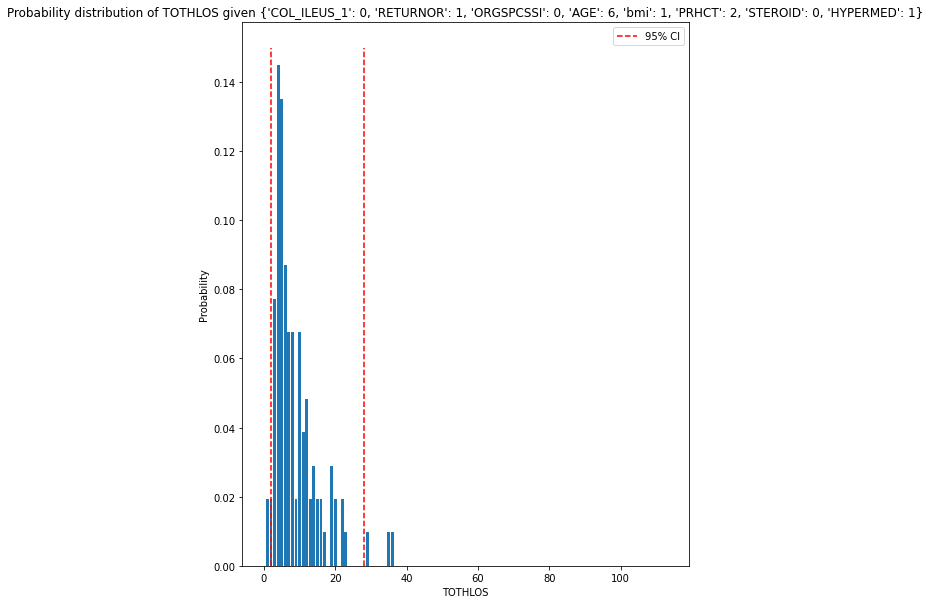

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 3.92094e-05 |
+----+-----------+-------------+
|  1 |         1 | 3.92094e-05 |
+----+-----------+-------------+
|  2 |         2 | 0.0275021   |
+----+-----------+-------------+
|  3 |         3 | 0.0892936   |
+----+-----------+-------------+
|  4 |         4 | 0.054965    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


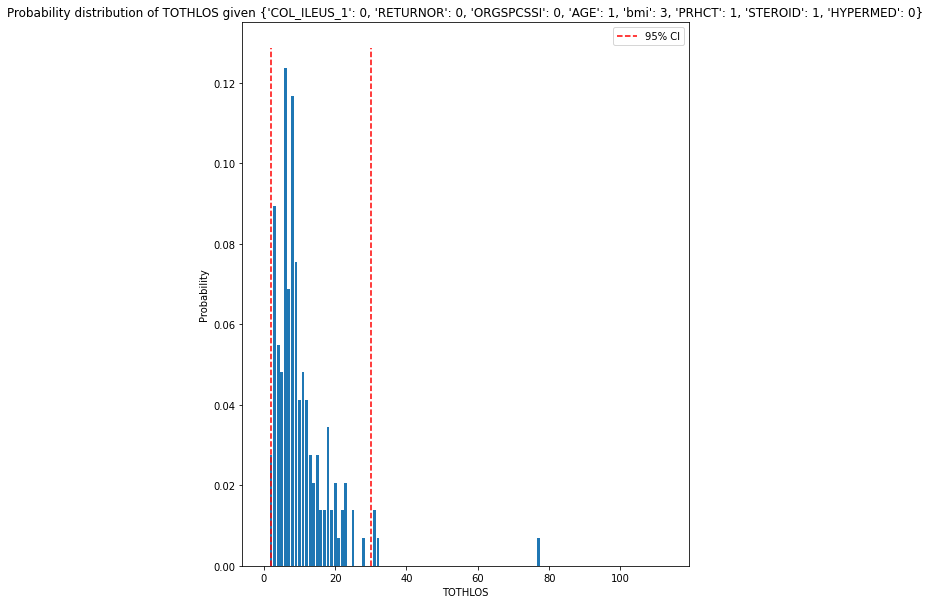

[bnlearn] >Variable Elimination..




+----+-----------+-----------+
|    |   TOTHLOS |         p |
+====+===========+===========+
|  0 |         0 | 0.007695  |
+----+-----------+-----------+
|  1 |         1 | 0.0115316 |
+----+-----------+-----------+
|  2 |         2 | 0.0422239 |
+----+-----------+-----------+
|  3 |         3 | 0.0997721 |
+----+-----------+-----------+
|  4 |         4 | 0.103609  |
+----+-----------+-----------+
RangeIndex(start=0, stop=114, step=1)


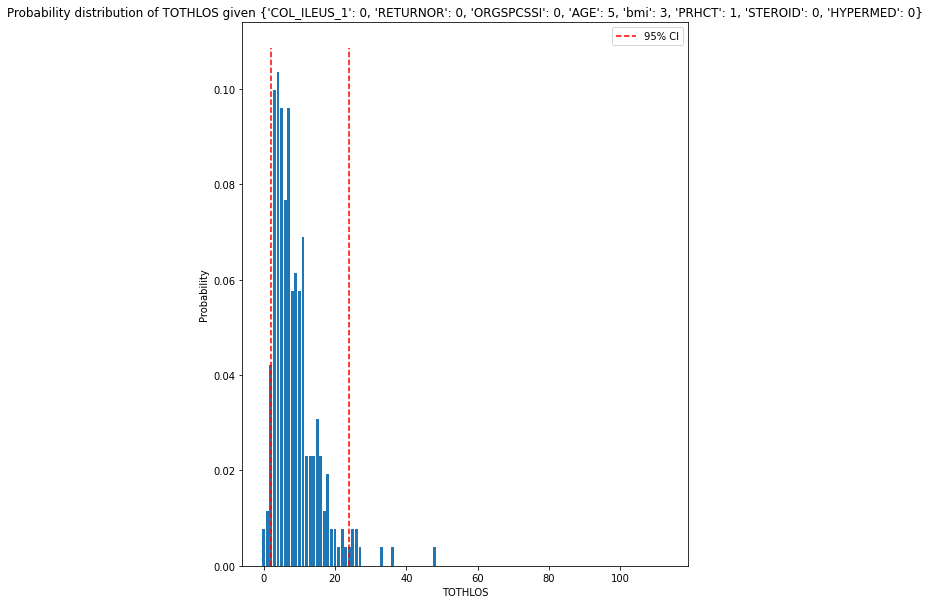

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00257636 |
+----+-----------+------------+
|  1 |         1 | 0.00771928 |
+----+-----------+------------+
|  2 |         2 | 0.0771488  |
+----+-----------+------------+
|  3 |         3 | 0.132864   |
+----+-----------+------------+
|  4 |         4 | 0.14315    |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


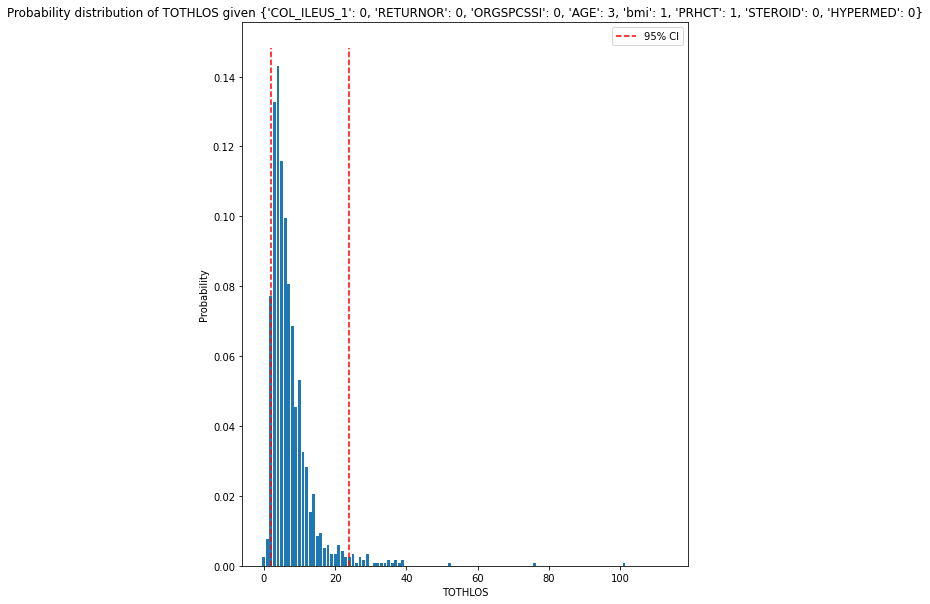

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000214284 |
+----+-----------+-------------+
|  1 |         1 | 0.000214284 |
+----+-----------+-------------+
|  2 |         2 | 0.000214284 |
+----+-----------+-------------+
|  3 |         3 | 0.000214284 |
+----+-----------+-------------+
|  4 |         4 | 0.000214284 |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


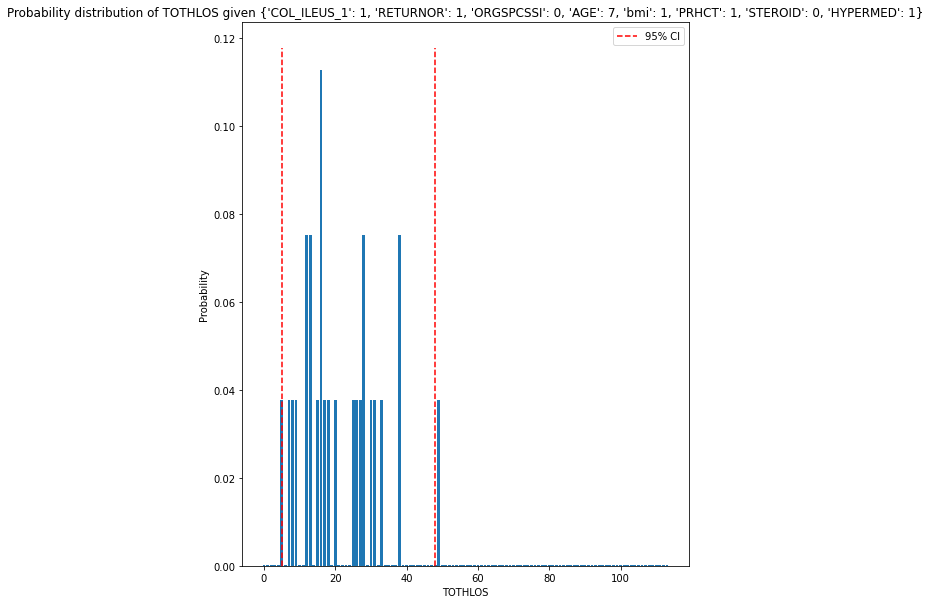

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 9.66881e-06 |
+----+-----------+-------------+
|  1 |         1 | 0.00170272  |
+----+-----------+-------------+
|  2 |         2 | 0.0220193   |
+----+-----------+-------------+
|  3 |         3 | 0.0203262   |
+----+-----------+-------------+
|  4 |         4 | 0.0254054   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


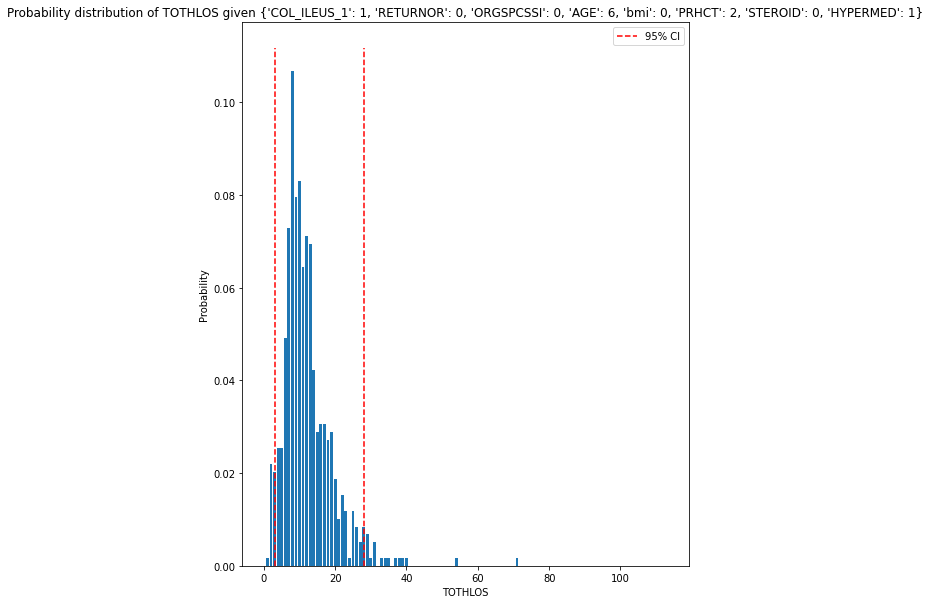

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000110567 |
+----+-----------+-------------+
|  1 |         1 | 0.000110567 |
+----+-----------+-------------+
|  2 |         2 | 0.000110567 |
+----+-----------+-------------+
|  3 |         3 | 0.0581926   |
+----+-----------+-------------+
|  4 |         4 | 0.0581926   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


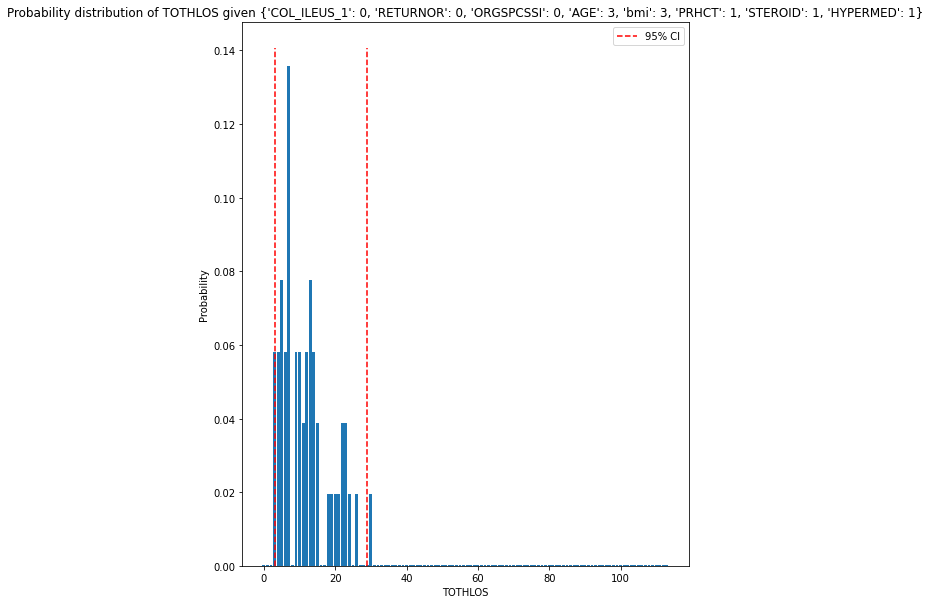

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00327885 |
+----+-----------+------------+
|  1 |         1 | 0.0202035  |
+----+-----------+------------+
|  2 |         2 | 0.144681   |
+----+-----------+------------+
|  3 |         3 | 0.220023   |
+----+-----------+------------+
|  4 |         4 | 0.177439   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


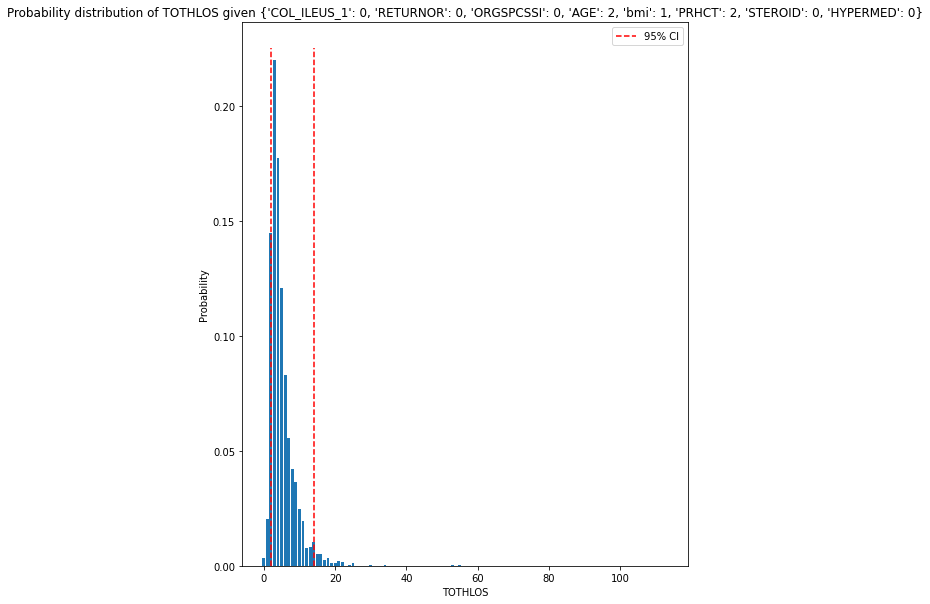

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 9.66881e-06 |
+----+-----------+-------------+
|  1 |         1 | 0.00170272  |
+----+-----------+-------------+
|  2 |         2 | 0.0220193   |
+----+-----------+-------------+
|  3 |         3 | 0.0203262   |
+----+-----------+-------------+
|  4 |         4 | 0.0254054   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


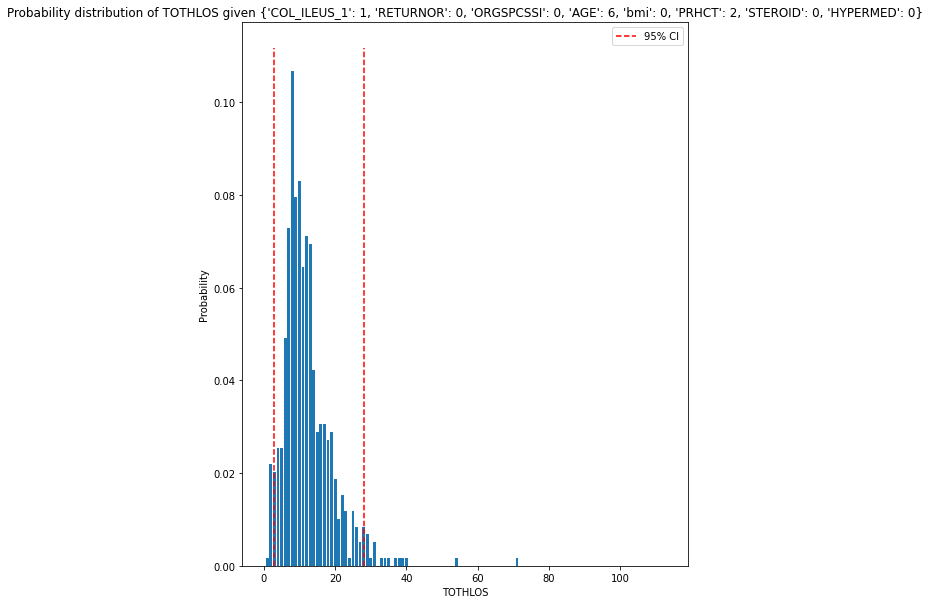

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 6.72146e-06 |
+----+-----------+-------------+
|  1 |         1 | 0.00118368  |
+----+-----------+-------------+
|  2 |         2 | 0.018838    |
+----+-----------+-------------+
|  3 |         3 | 0.0294306   |
+----+-----------+-------------+
|  4 |         4 | 0.0247228   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


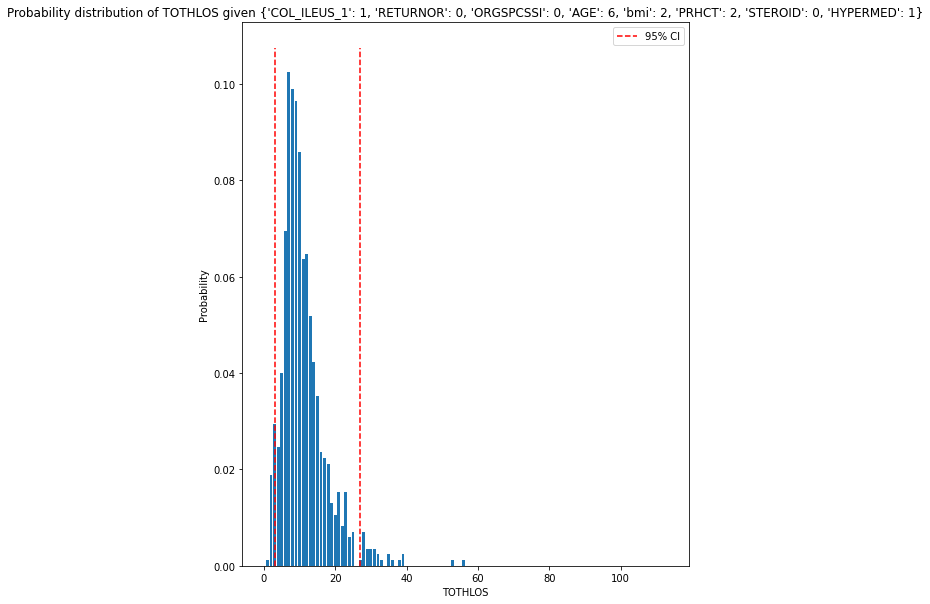

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00599078 |
+----+-----------+------------+
|  1 |         1 | 0.0225621  |
+----+-----------+------------+
|  2 |         2 | 0.159525   |
+----+-----------+------------+
|  3 |         3 | 0.249969   |
+----+-----------+------------+
|  4 |         4 | 0.183084   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


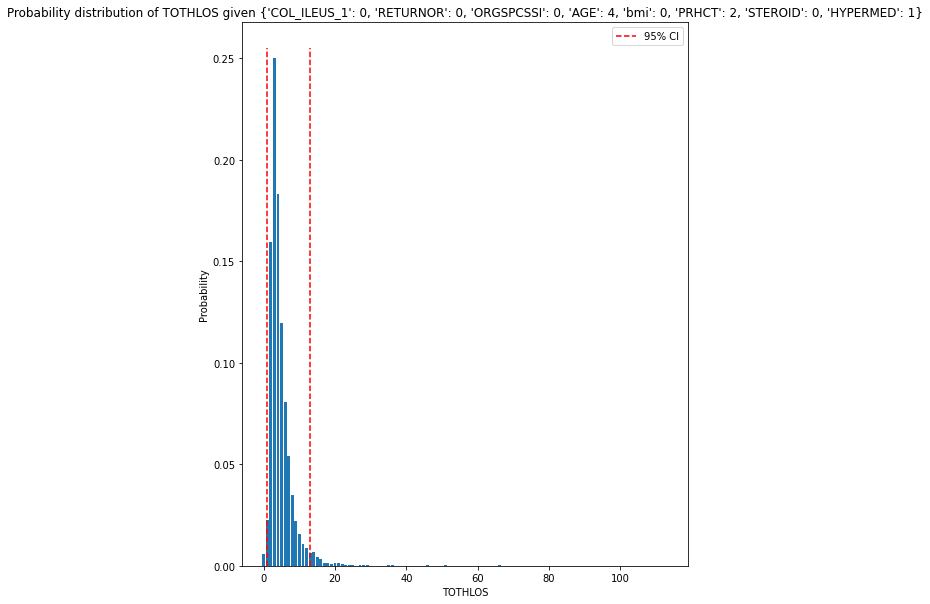

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000104497 |
+----+-----------+-------------+
|  1 |         1 | 0.000104497 |
+----+-----------+-------------+
|  2 |         2 | 0.000104497 |
+----+-----------+-------------+
|  3 |         3 | 0.000104497 |
+----+-----------+-------------+
|  4 |         4 | 0.000104497 |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


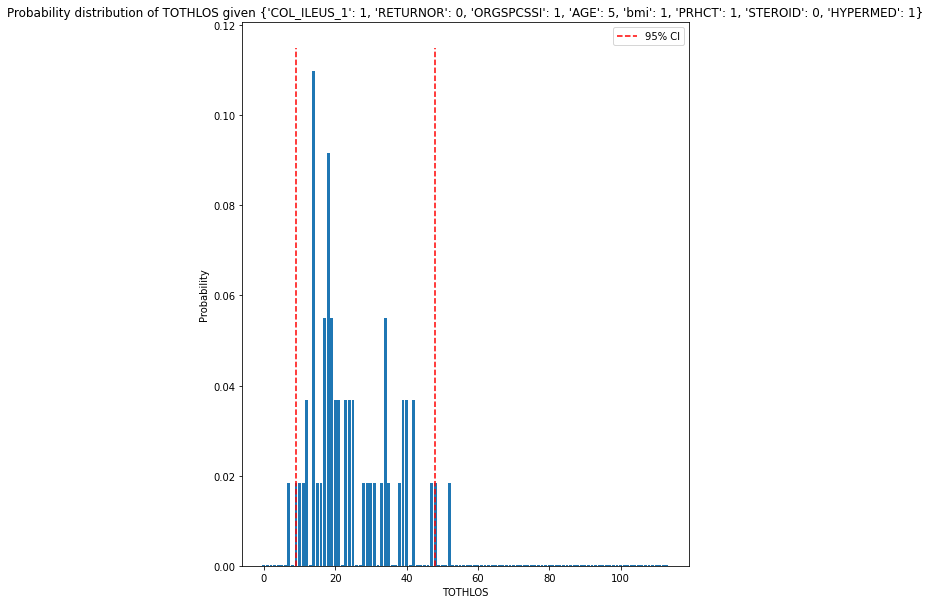

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00150441 |
+----+-----------+------------+
|  1 |         1 | 0.00338223 |
+----+-----------+------------+
|  2 |         2 | 0.0600926  |
+----+-----------+------------+
|  3 |         3 | 0.12807    |
+----+-----------+------------+
|  4 |         4 | 0.129572   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


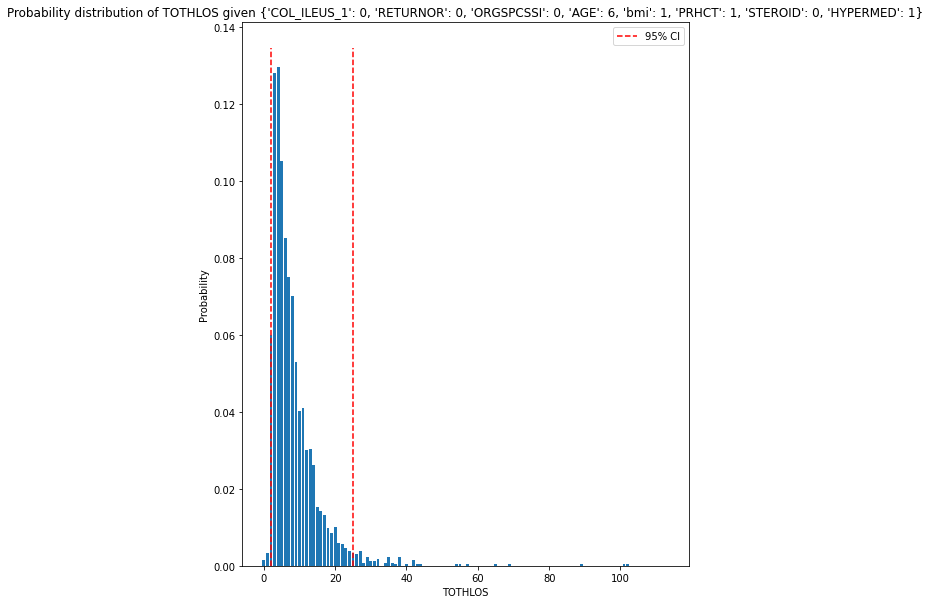

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 1.00961e-05 |
+----+-----------+-------------+
|  1 |         1 | 1.00961e-05 |
+----+-----------+-------------+
|  2 |         2 | 0.00708159  |
+----+-----------+-------------+
|  3 |         3 | 0.0106173   |
+----+-----------+-------------+
|  4 |         4 | 0.015921    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


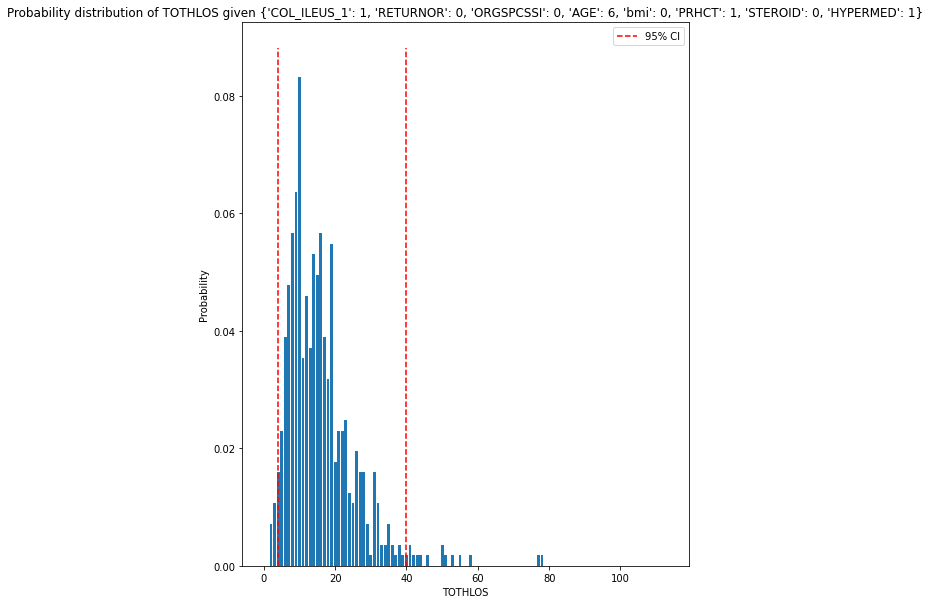

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00550619 |
+----+-----------+------------+
|  1 |         1 | 0.0109811  |
+----+-----------+------------+
|  2 |         2 | 0.021931   |
+----+-----------+------------+
|  3 |         3 | 0.016456   |
+----+-----------+------------+
|  4 |         4 | 0.0493056  |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


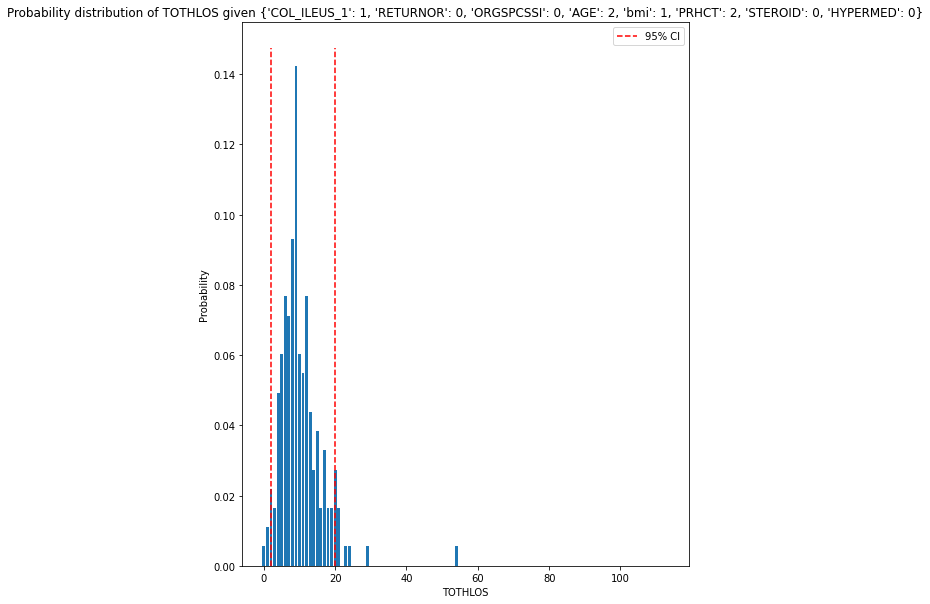

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00509206 |
+----+-----------+------------+
|  1 |         1 | 0.020962   |
+----+-----------+------------+
|  2 |         2 | 0.168582   |
+----+-----------+------------+
|  3 |         3 | 0.260508   |
+----+-----------+------------+
|  4 |         4 | 0.191638   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


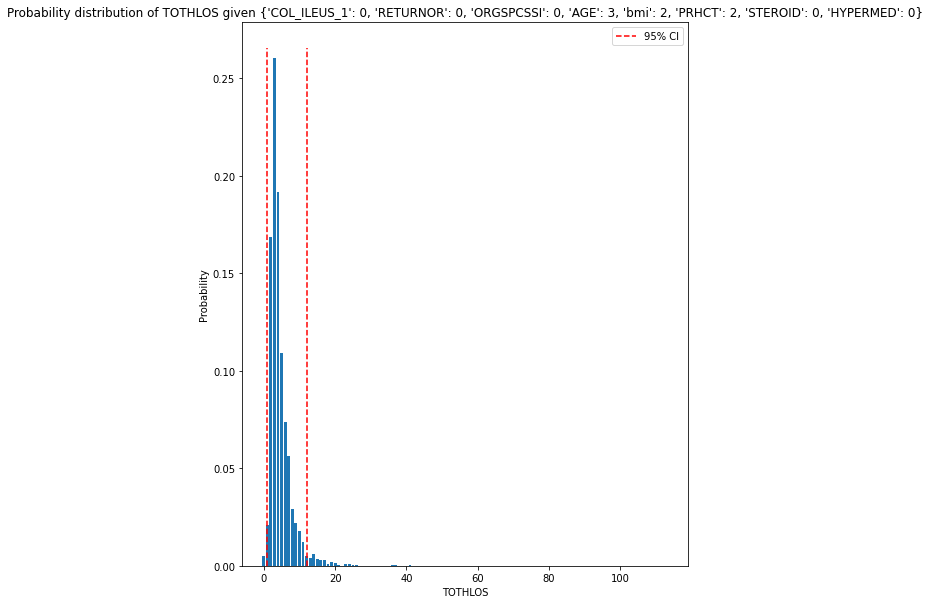

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 1.71678e-05 |
+----+-----------+-------------+
|  1 |         1 | 1.71678e-05 |
+----+-----------+-------------+
|  2 |         2 | 0.0511218   |
+----+-----------+-------------+
|  3 |         3 | 0.120263    |
+----+-----------+-------------+
|  4 |         4 | 0.108239    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


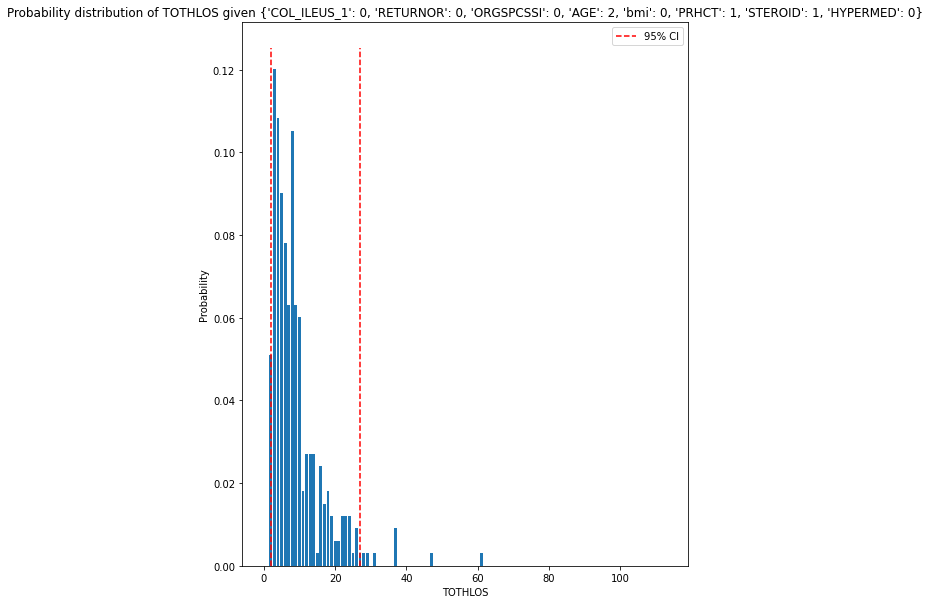

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00292655 |
+----+-----------+------------+
|  1 |         1 | 0.00583648 |
+----+-----------+------------+
|  2 |         2 | 0.0902244  |
+----+-----------+------------+
|  3 |         3 | 0.148423   |
+----+-----------+------------+
|  4 |         4 | 0.107684   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


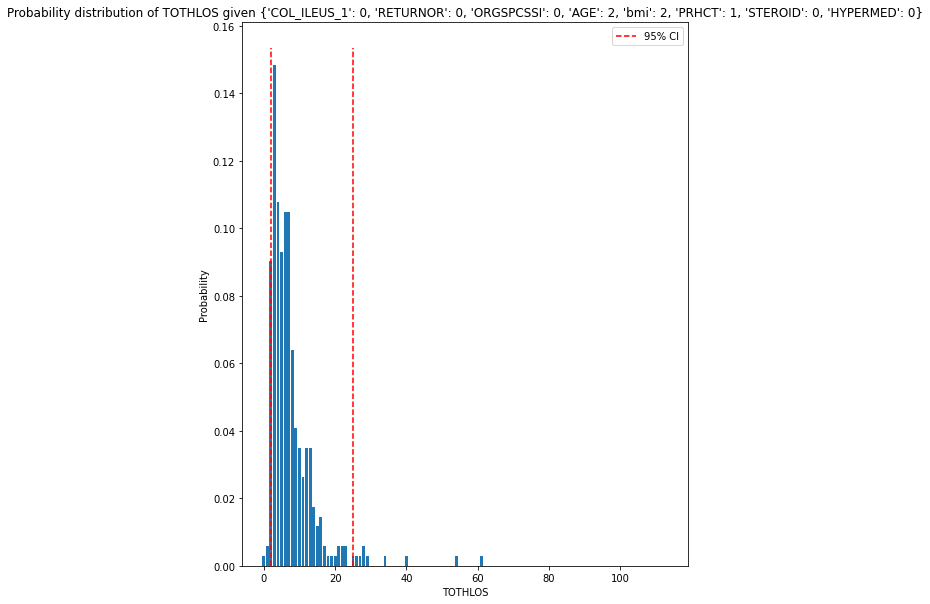

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00200881 |
+----+-----------+------------+
|  1 |         1 | 0.008001   |
+----+-----------+------------+
|  2 |         2 | 0.0998814  |
+----+-----------+------------+
|  3 |         3 | 0.18577    |
+----+-----------+------------+
|  4 |         4 | 0.165796   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


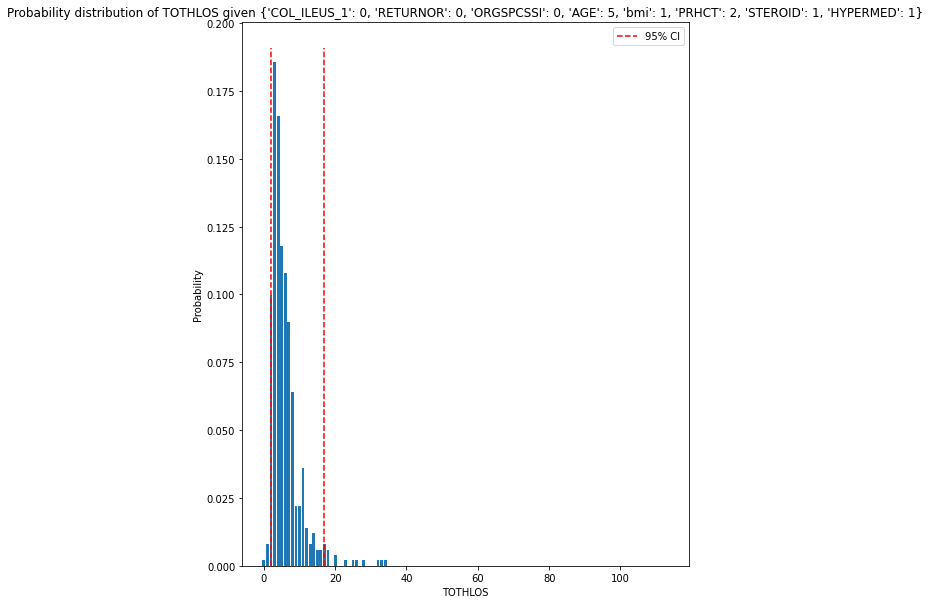

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00599078 |
+----+-----------+------------+
|  1 |         1 | 0.0225621  |
+----+-----------+------------+
|  2 |         2 | 0.159525   |
+----+-----------+------------+
|  3 |         3 | 0.249969   |
+----+-----------+------------+
|  4 |         4 | 0.183084   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


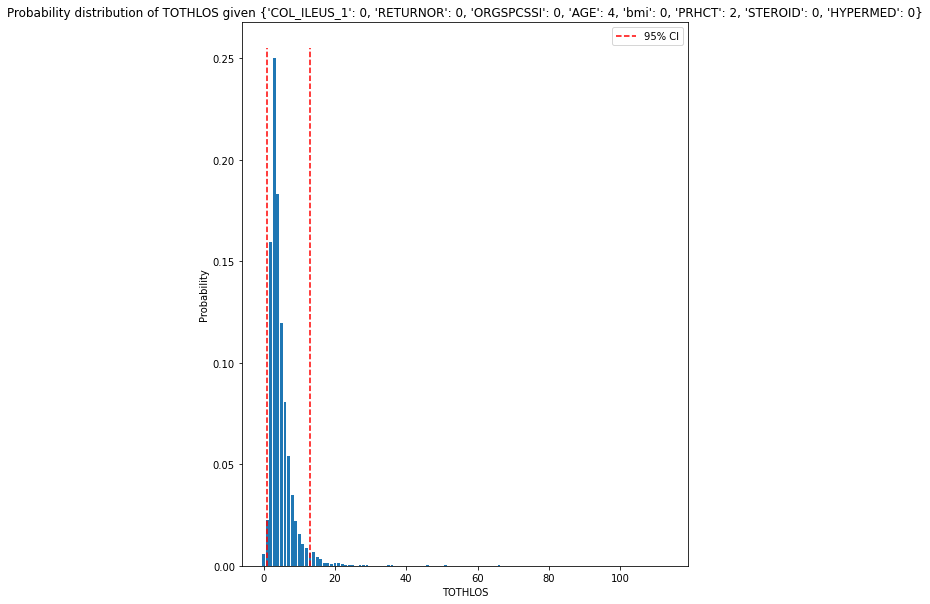

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00538831 |
+----+-----------+------------+
|  1 |         1 | 0.019144   |
+----+-----------+------------+
|  2 |         2 | 0.151313   |
+----+-----------+------------+
|  3 |         3 | 0.235338   |
+----+-----------+------------+
|  4 |         4 | 0.188454   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


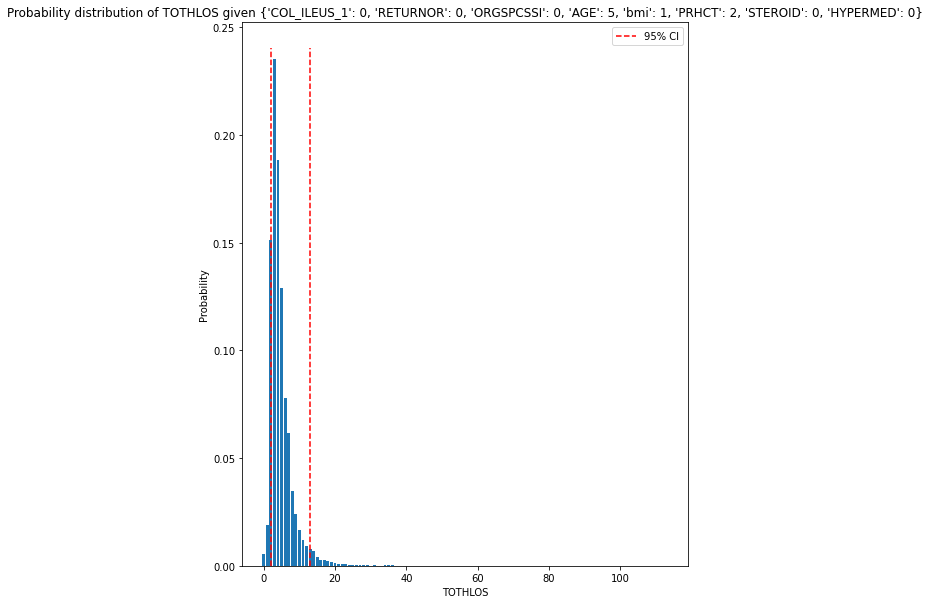

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00101059 |
+----+-----------+------------+
|  1 |         1 | 0.00101059 |
+----+-----------+------------+
|  2 |         2 | 0.00101059 |
+----+-----------+------------+
|  3 |         3 | 0.00101059 |
+----+-----------+------------+
|  4 |         4 | 0.354928   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


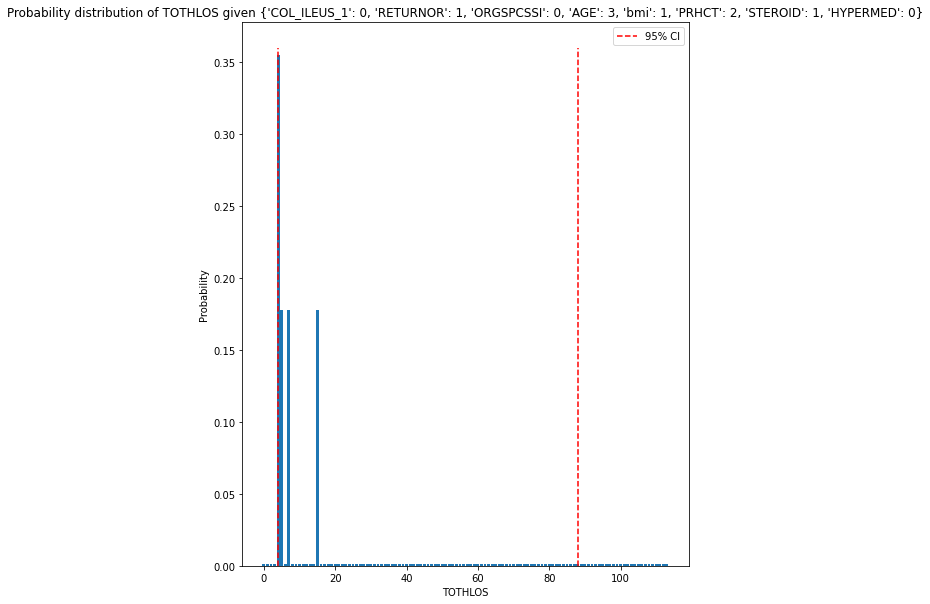

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 1.14988e-05 |
+----+-----------+-------------+
|  1 |         1 | 0.00202498  |
+----+-----------+-------------+
|  2 |         2 | 0.00806544  |
+----+-----------+-------------+
|  3 |         3 | 0.0100789   |
+----+-----------+-------------+
|  4 |         4 | 0.0201464   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


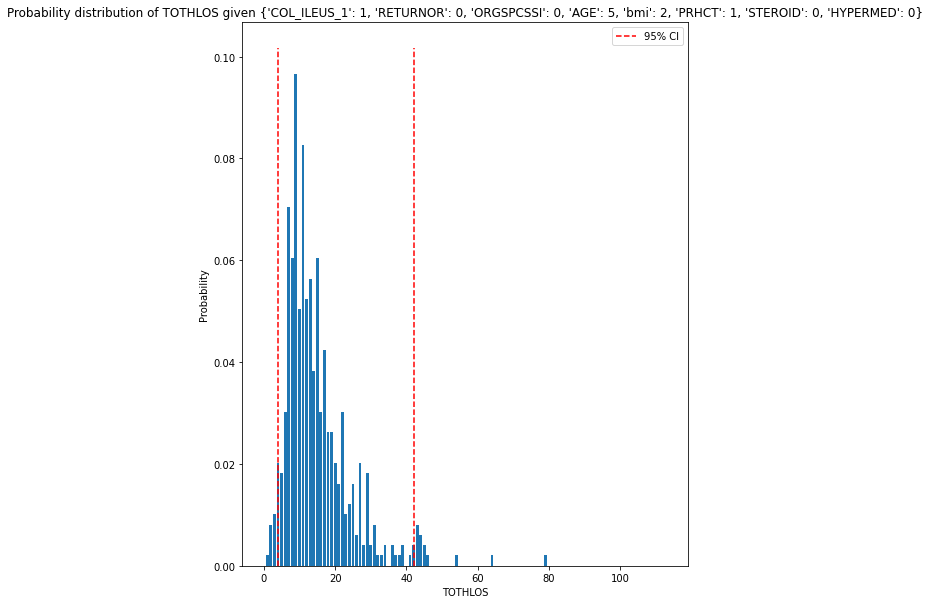

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 1.5835e-05 |
+----+-----------+------------+
|  1 |         1 | 1.5835e-05 |
+----+-----------+------------+
|  2 |         2 | 0.0111069  |
+----+-----------+------------+
|  3 |         3 | 0.0388345  |
+----+-----------+------------+
|  4 |         4 | 0.0416073  |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


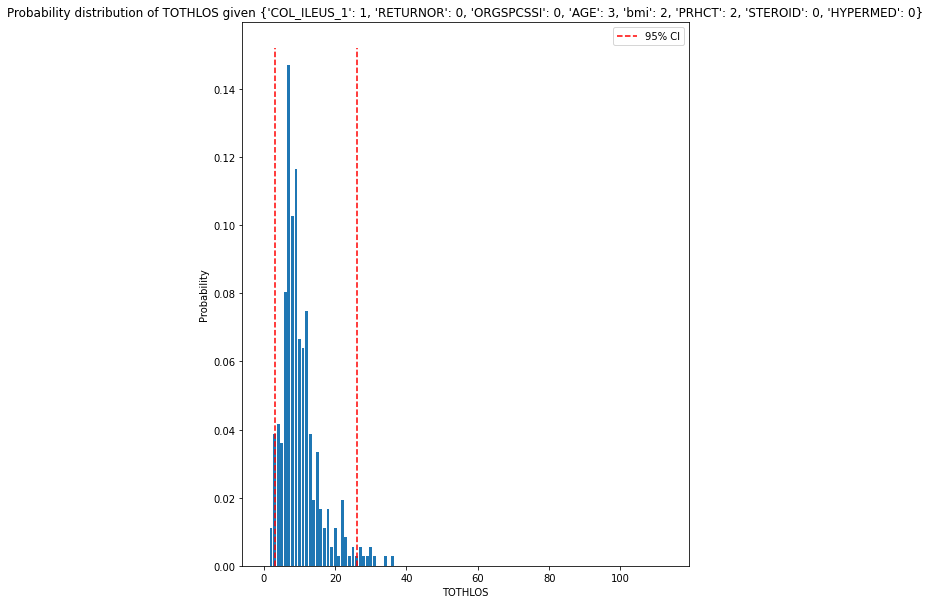

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00250132 |
+----+-----------+------------+
|  1 |         1 | 0.0208095  |
+----+-----------+------------+
|  2 |         2 | 0.151463   |
+----+-----------+------------+
|  3 |         3 | 0.215542   |
+----+-----------+------------+
|  4 |         4 | 0.183086   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


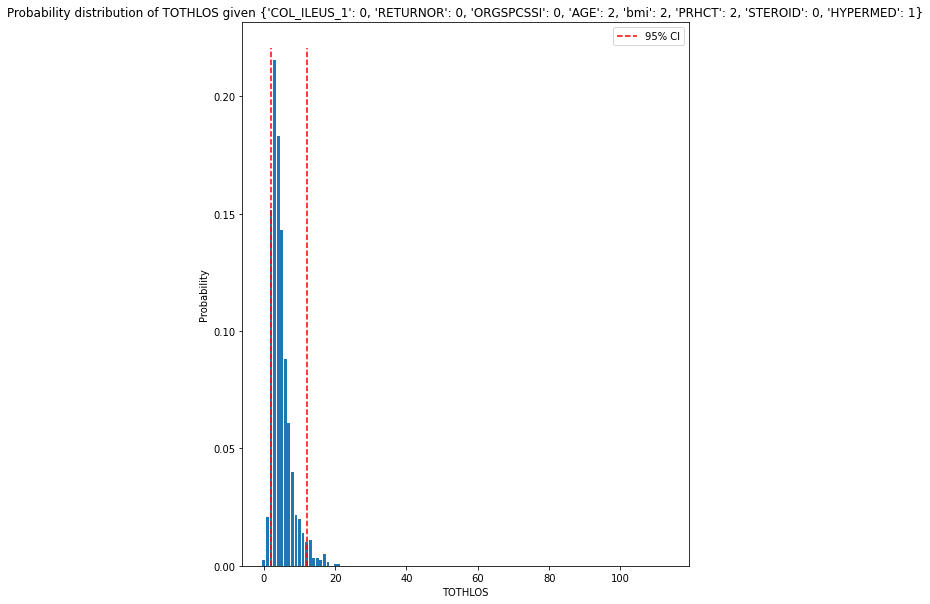

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000130831 |
+----+-----------+-------------+
|  1 |         1 | 0.000130831 |
+----+-----------+-------------+
|  2 |         2 | 0.000130831 |
+----+-----------+-------------+
|  3 |         3 | 0.000130831 |
+----+-----------+-------------+
|  4 |         4 | 0.0230398   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


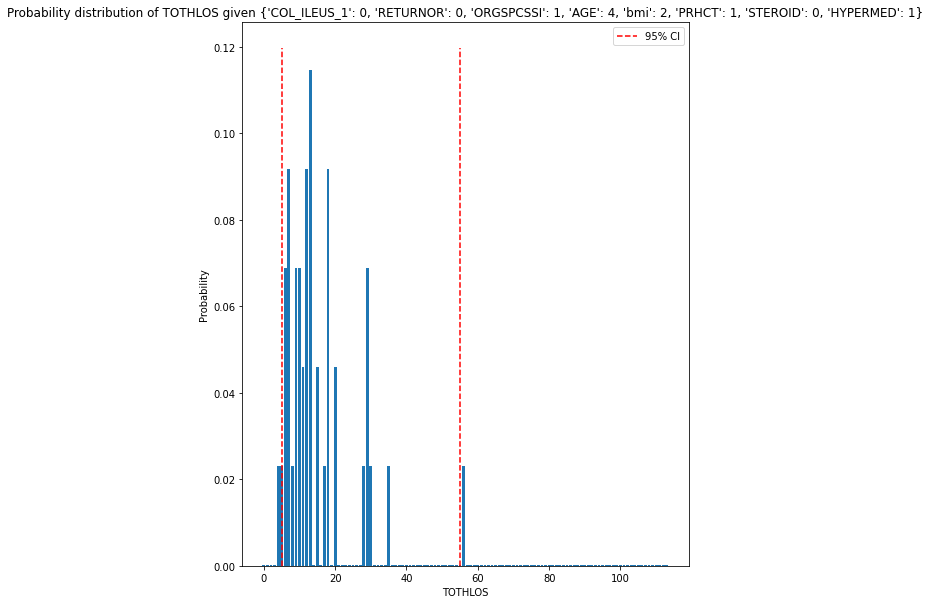

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00194841 |
+----+-----------+------------+
|  1 |         1 | 0.00648605 |
+----+-----------+------------+
|  2 |         2 | 0.0758472  |
+----+-----------+------------+
|  3 |         3 | 0.145857   |
+----+-----------+------------+
|  4 |         4 | 0.142615   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


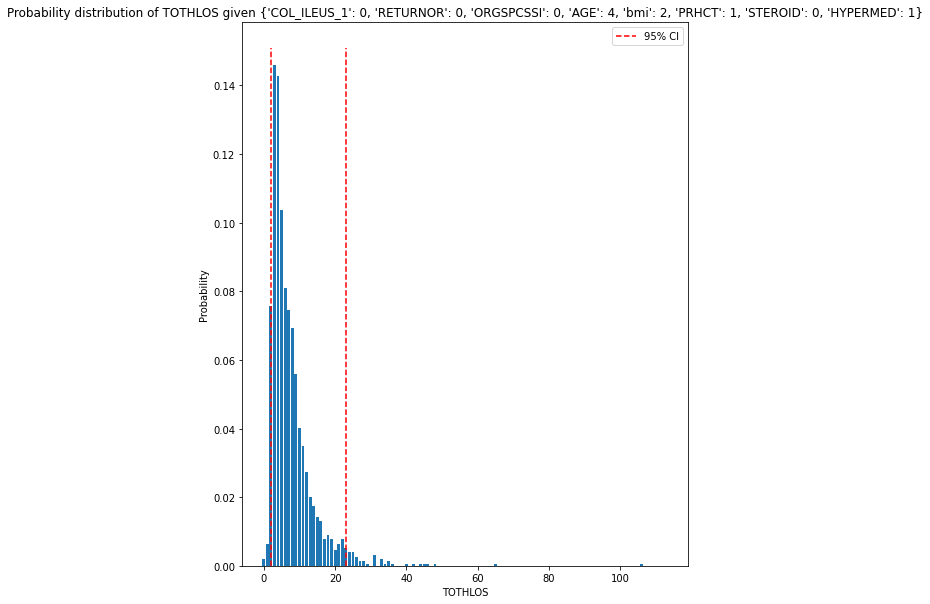

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00469006 |
+----+-----------+------------+
|  1 |         1 | 0.00469006 |
+----+-----------+------------+
|  2 |         2 | 0.0958859  |
+----+-----------+------------+
|  3 |         3 | 0.212804   |
+----+-----------+------------+
|  4 |         4 | 0.194097   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


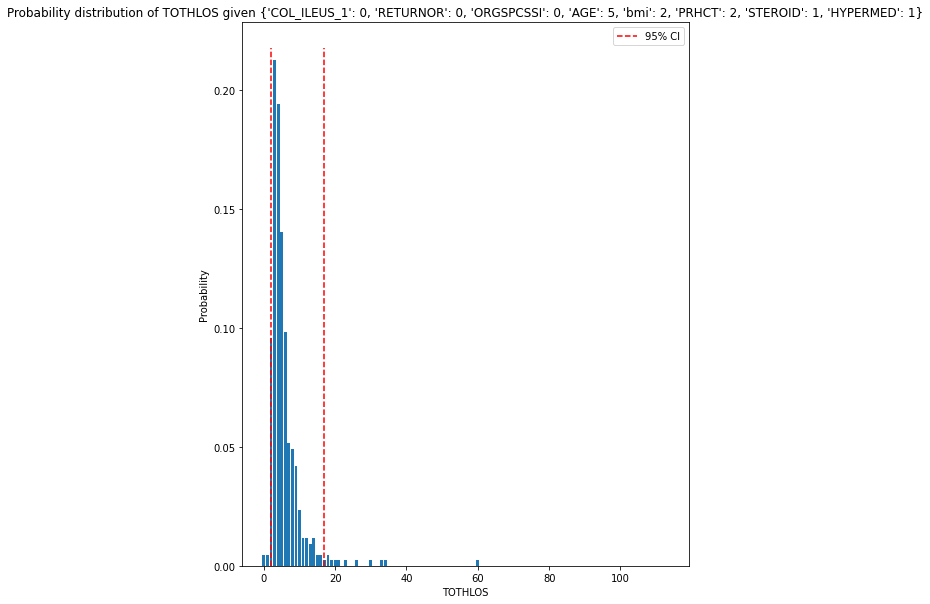

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000342975 |
+----+-----------+-------------+
|  1 |         1 | 0.000342975 |
+----+-----------+-------------+
|  2 |         2 | 0.000342975 |
+----+-----------+-------------+
|  3 |         3 | 0.0603993   |
+----+-----------+-------------+
|  4 |         4 | 0.180512    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


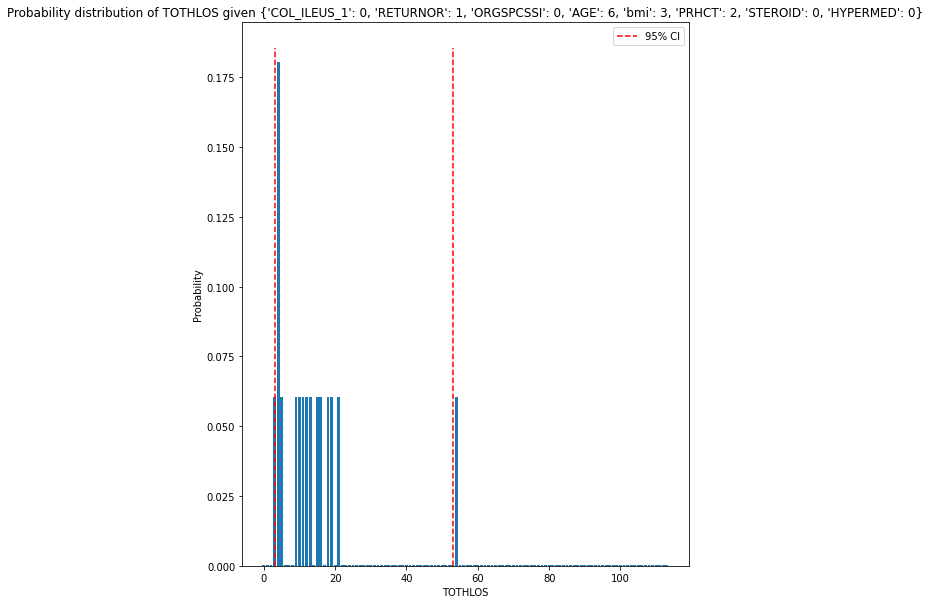

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00585505 |
+----+-----------+------------+
|  1 |         1 | 0.019385   |
+----+-----------+------------+
|  2 |         2 | 0.170946   |
+----+-----------+------------+
|  3 |         3 | 0.236775   |
+----+-----------+------------+
|  4 |         4 | 0.194103   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


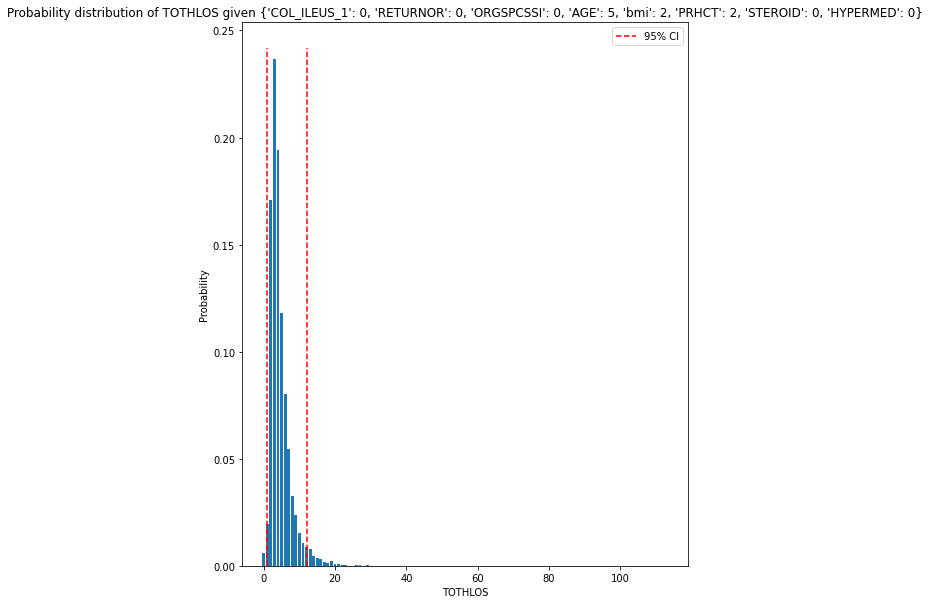

[bnlearn] >Variable Elimination..




+----+-----------+-----------+
|    |   TOTHLOS |         p |
+====+===========+===========+
|  0 |         0 | 0.003185  |
+----+-----------+-----------+
|  1 |         1 | 0.0120928 |
+----+-----------+-----------+
|  2 |         2 | 0.0789016 |
+----+-----------+-----------+
|  3 |         3 | 0.141893  |
+----+-----------+-----------+
|  4 |         4 | 0.117078  |
+----+-----------+-----------+
RangeIndex(start=0, stop=114, step=1)


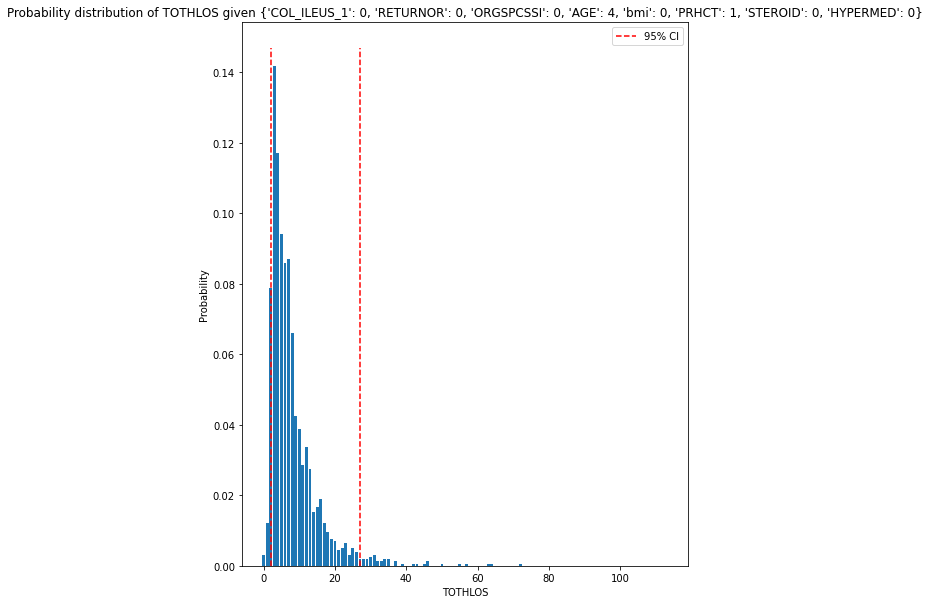

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00137835 |
+----+-----------+------------+
|  1 |         1 | 0.00411938 |
+----+-----------+------------+
|  2 |         2 | 0.0123425  |
+----+-----------+------------+
|  3 |         3 | 0.0287887  |
+----+-----------+------------+
|  4 |         4 | 0.0424939  |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


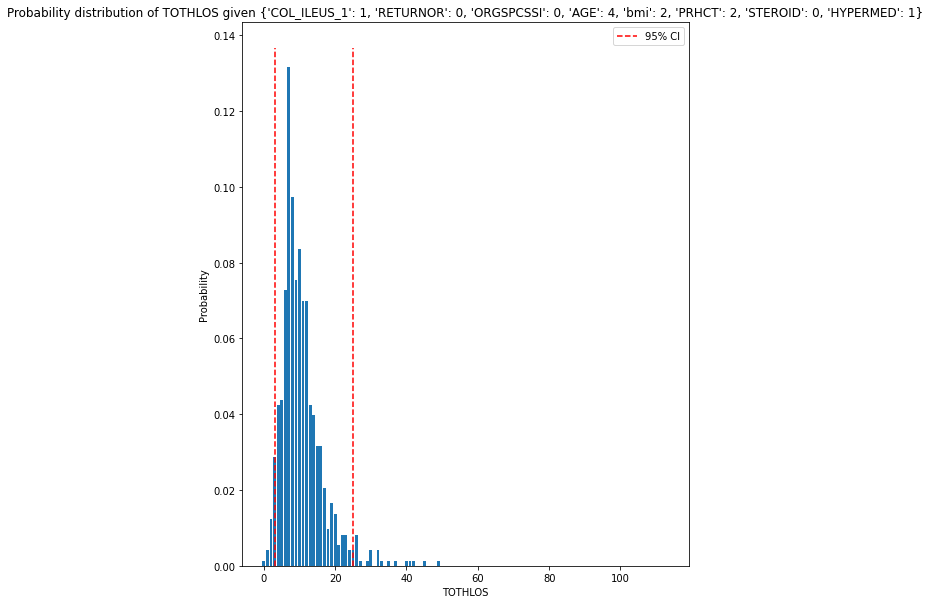

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000831406 |
+----+-----------+-------------+
|  1 |         1 | 0.0190185   |
+----+-----------+-------------+
|  2 |         2 | 0.126487    |
+----+-----------+-------------+
|  3 |         3 | 0.243877    |
+----+-----------+-------------+
|  4 |         4 | 0.205849    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


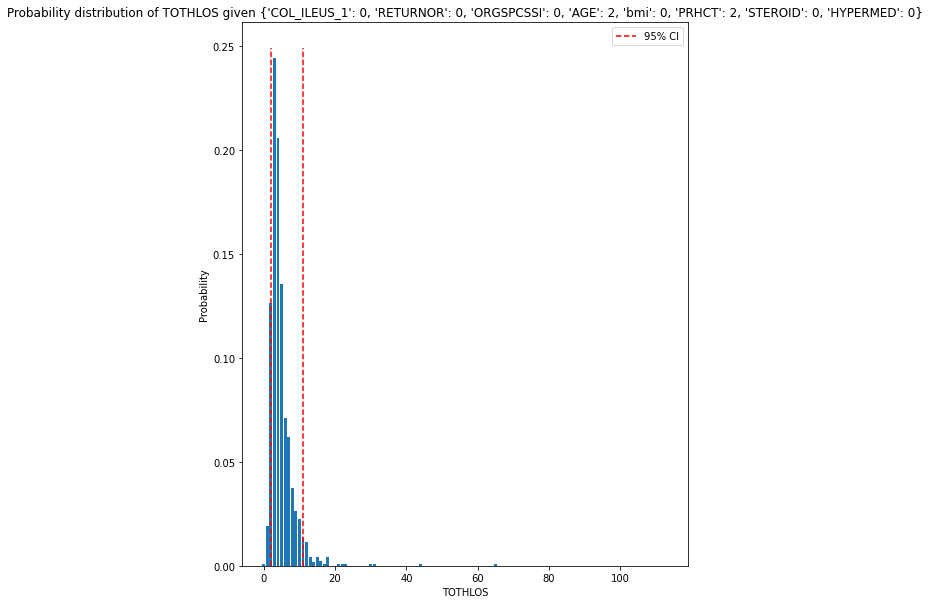

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00536298 |
+----+-----------+------------+
|  1 |         1 | 0.0216627  |
+----+-----------+------------+
|  2 |         2 | 0.150345   |
+----+-----------+------------+
|  3 |         3 | 0.239565   |
+----+-----------+------------+
|  4 |         4 | 0.188521   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


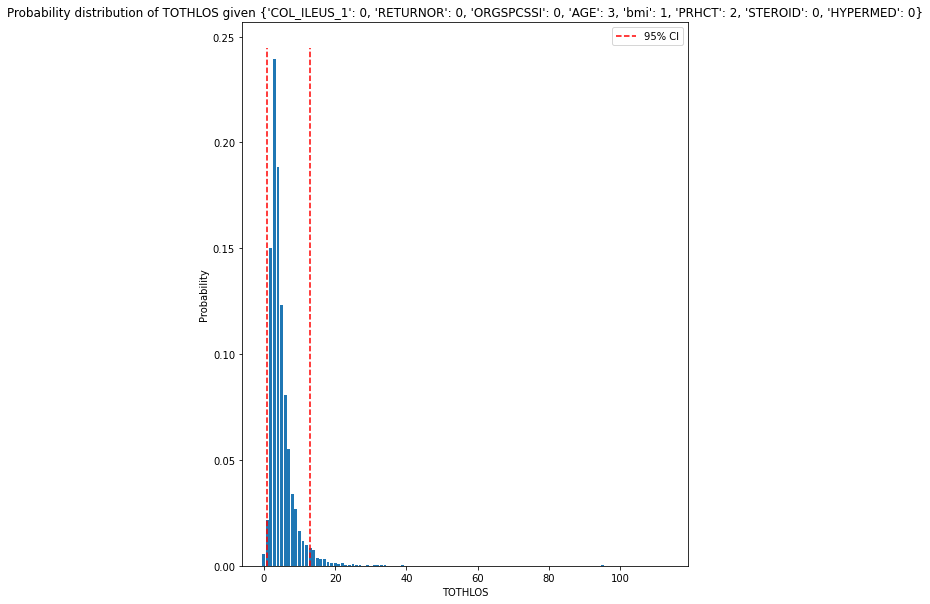

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 4.85409e-05 |
+----+-----------+-------------+
|  1 |         1 | 4.85409e-05 |
+----+-----------+-------------+
|  2 |         2 | 0.017048    |
+----+-----------+-------------+
|  3 |         3 | 0.0255477   |
+----+-----------+-------------+
|  4 |         4 | 0.0425471   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


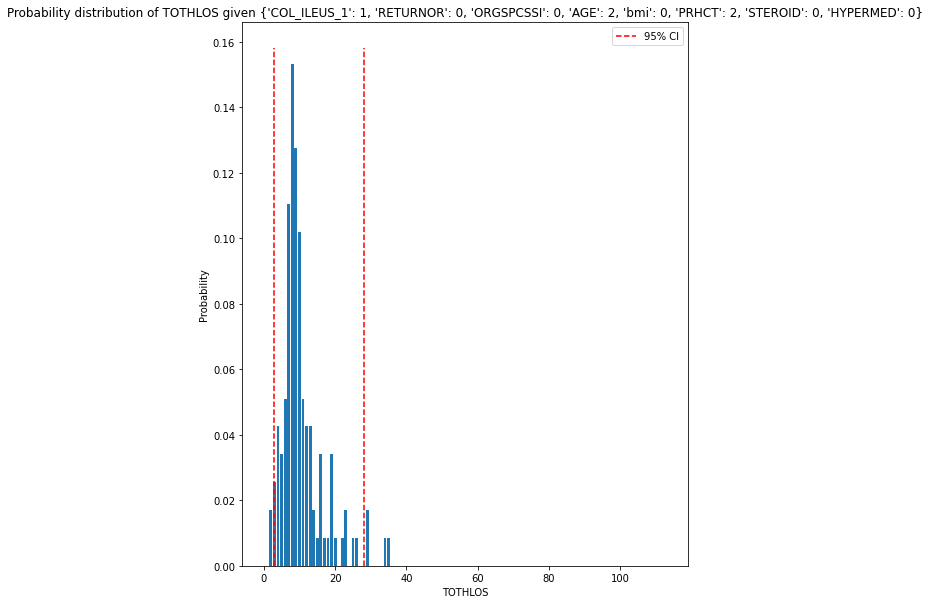

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00201384 |
+----+-----------+------------+
|  1 |         1 | 0.0088531  |
+----+-----------+------------+
|  2 |         2 | 0.0667856  |
+----+-----------+------------+
|  3 |         3 | 0.122304   |
+----+-----------+------------+
|  4 |         4 | 0.128741   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


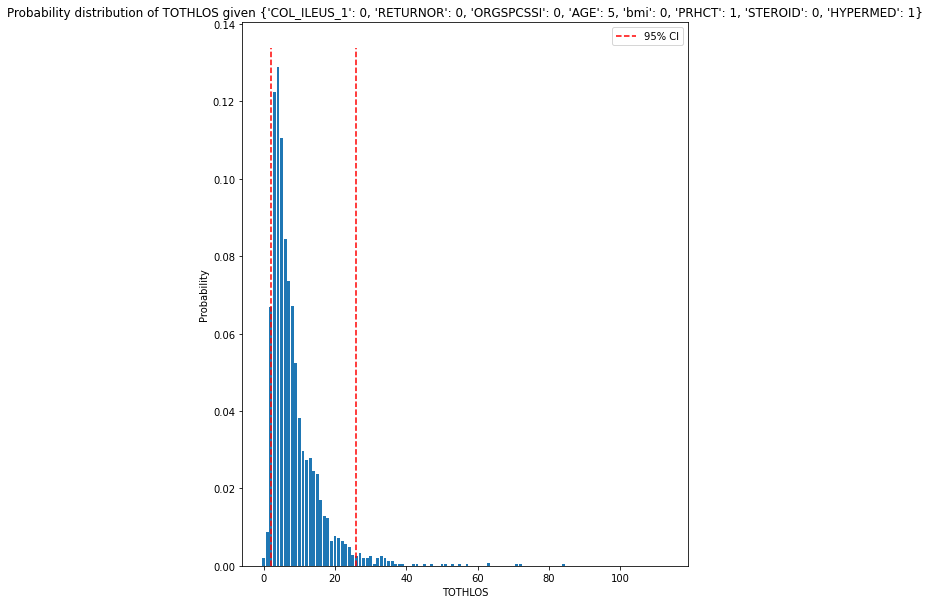

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00575005 |
+----+-----------+------------+
|  1 |         1 | 0.0171315  |
+----+-----------+------------+
|  2 |         2 | 0.166498   |
+----+-----------+------------+
|  3 |         3 | 0.249219   |
+----+-----------+------------+
|  4 |         4 | 0.197709   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


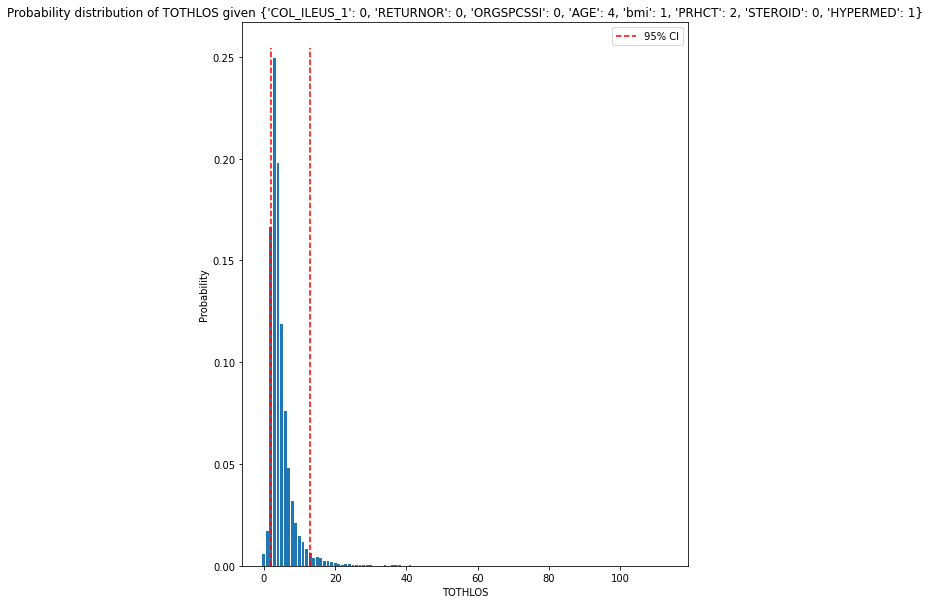

[bnlearn] >Variable Elimination..




+----+-----------+-----------+
|    |   TOTHLOS |         p |
+====+===========+===========+
|  0 |         0 | 0.0060114 |
+----+-----------+-----------+
|  1 |         1 | 0.0120057 |
+----+-----------+-----------+
|  2 |         2 | 0.10192   |
+----+-----------+-----------+
|  3 |         3 | 0.221806  |
+----+-----------+-----------+
|  4 |         4 | 0.197829  |
+----+-----------+-----------+
RangeIndex(start=0, stop=114, step=1)


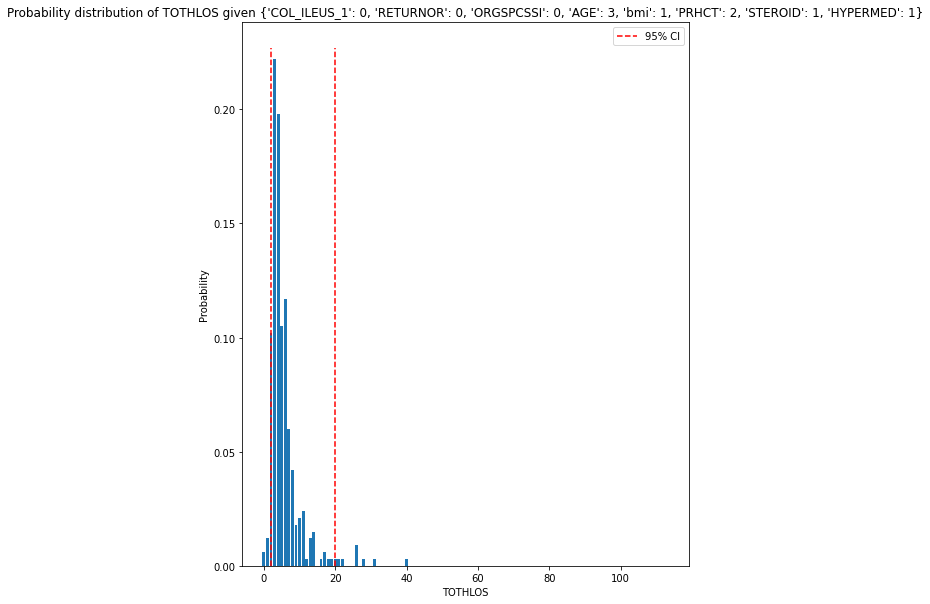

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00506708 |
+----+-----------+------------+
|  1 |         1 | 0.0055735  |
+----+-----------+------------+
|  2 |         2 | 0.0769785  |
+----+-----------+------------+
|  3 |         3 | 0.14889    |
+----+-----------+------------+
|  4 |         4 | 0.159525   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


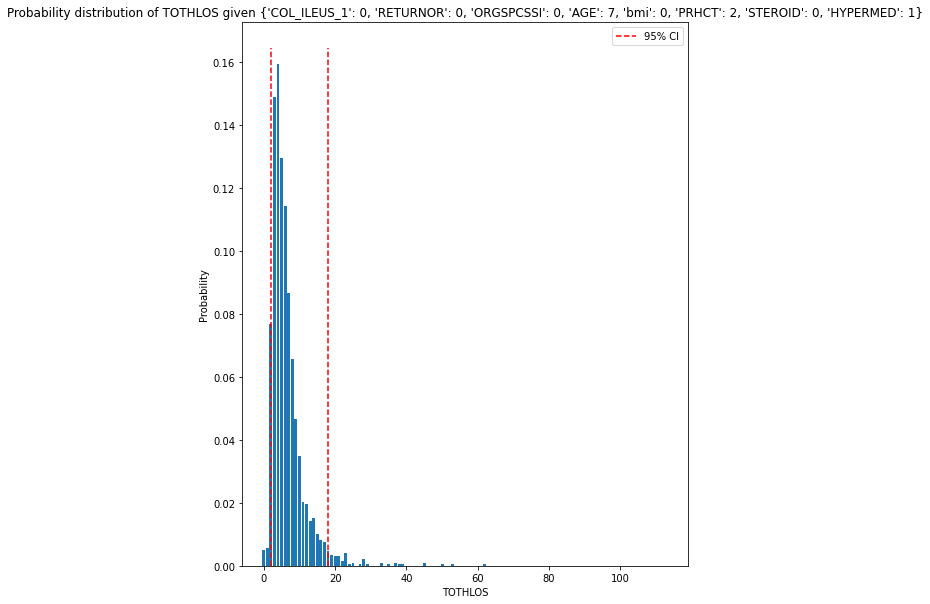

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 2.19945e-05 |
+----+-----------+-------------+
|  1 |         1 | 0.011576    |
+----+-----------+-------------+
|  2 |         2 | 0.0731971   |
+----+-----------+-------------+
|  3 |         3 | 0.154075    |
+----+-----------+-------------+
|  4 |         4 | 0.181034    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


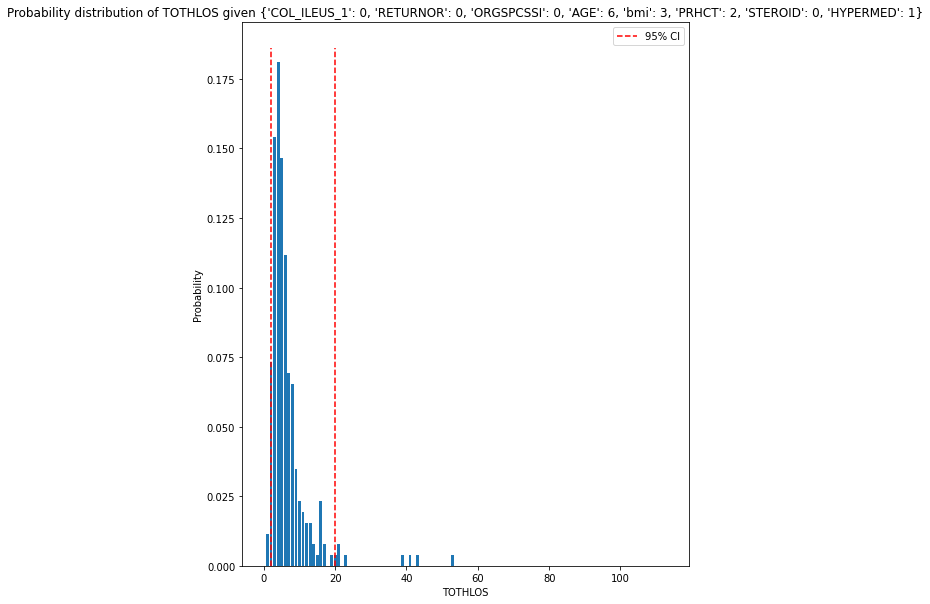

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00575822 |
+----+-----------+------------+
|  1 |         1 | 0.0273208  |
+----+-----------+------------+
|  2 |         2 | 0.207009   |
+----+-----------+------------+
|  3 |         3 | 0.254446   |
+----+-----------+------------+
|  4 |         4 | 0.189759   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


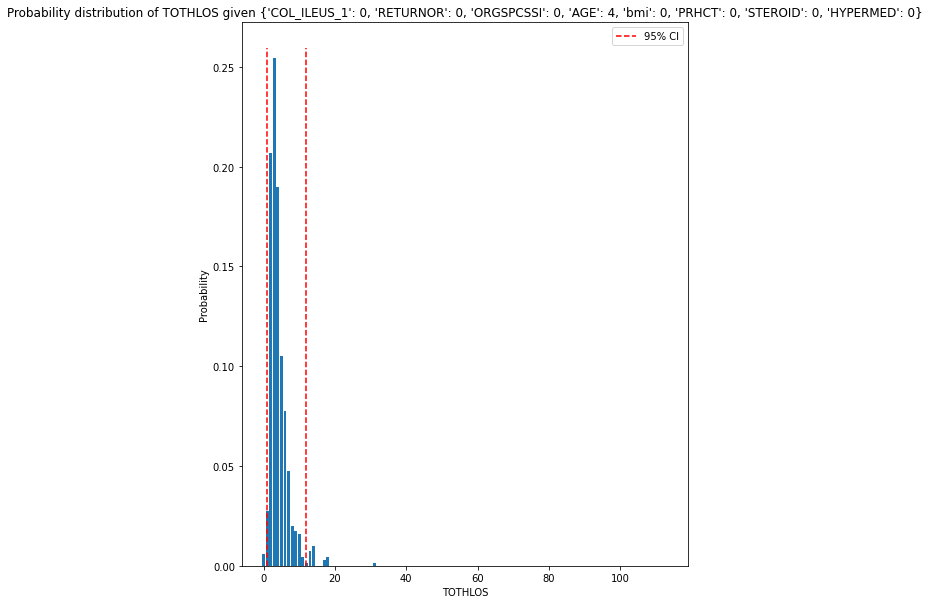

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00506708 |
+----+-----------+------------+
|  1 |         1 | 0.0055735  |
+----+-----------+------------+
|  2 |         2 | 0.0769785  |
+----+-----------+------------+
|  3 |         3 | 0.14889    |
+----+-----------+------------+
|  4 |         4 | 0.159525   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


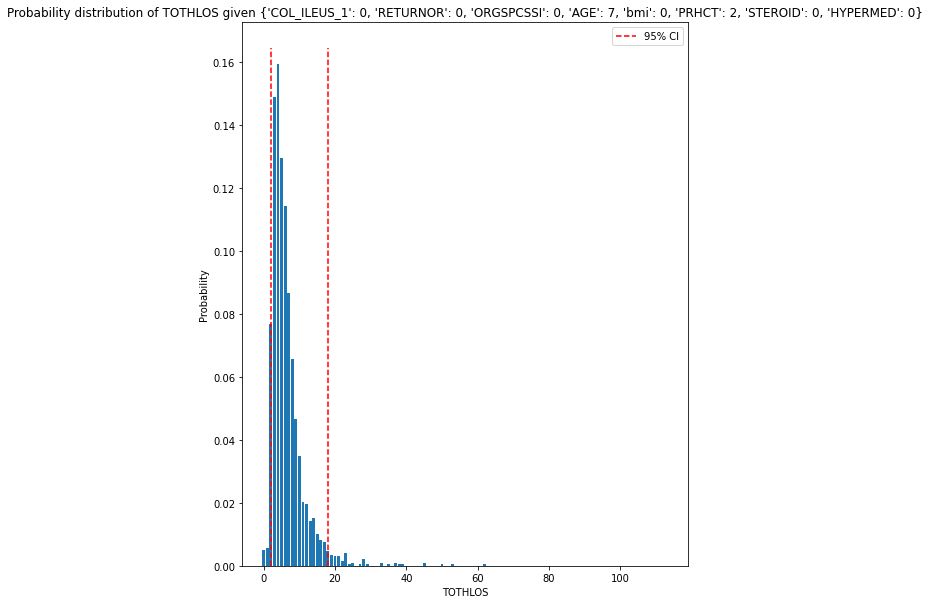

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00320156 |
+----+-----------+------------+
|  1 |         1 | 0.0166884  |
+----+-----------+------------+
|  2 |         2 | 0.122525   |
+----+-----------+------------+
|  3 |         3 | 0.205046   |
+----+-----------+------------+
|  4 |         4 | 0.179673   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


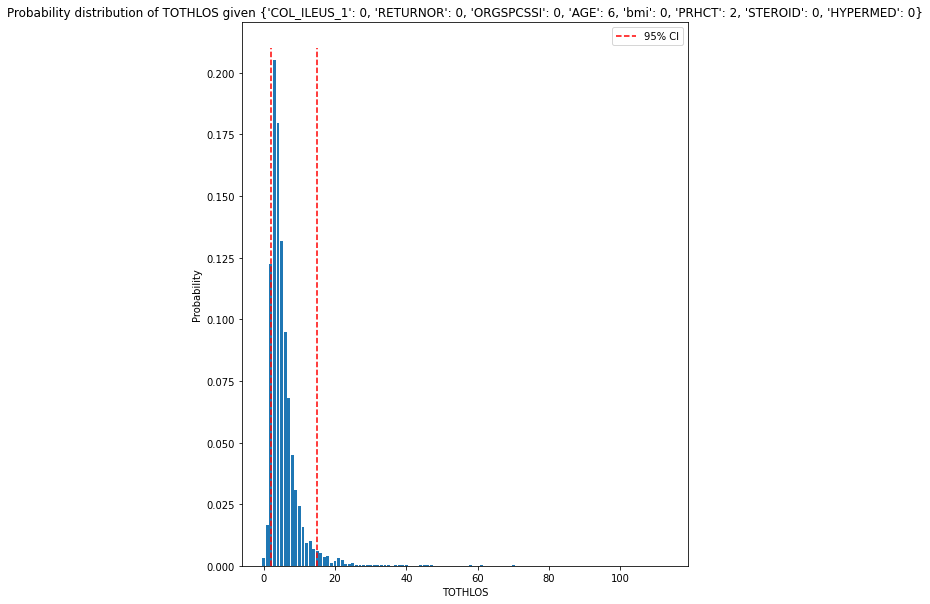

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 5.50973e-05 |
+----+-----------+-------------+
|  1 |         1 | 0.0193506   |
+----+-----------+-------------+
|  2 |         2 | 0.0193506   |
+----+-----------+-------------+
|  3 |         3 | 0.0772371   |
+----+-----------+-------------+
|  4 |         4 | 0.144771    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


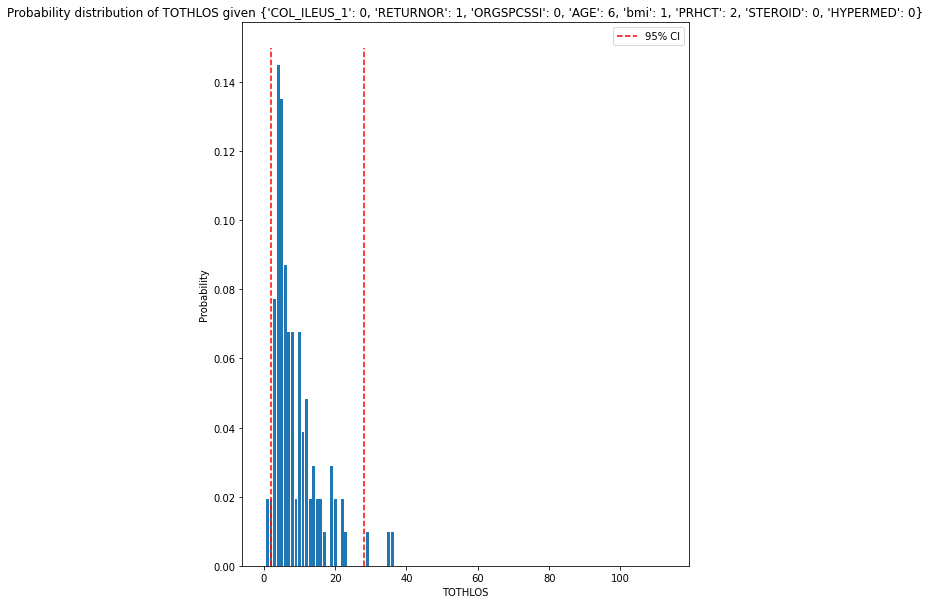

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00329772 |
+----+-----------+------------+
|  1 |         1 | 0.0222461  |
+----+-----------+------------+
|  2 |         2 | 0.140879   |
+----+-----------+------------+
|  3 |         3 | 0.247979   |
+----+-----------+------------+
|  4 |         4 | 0.200196   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


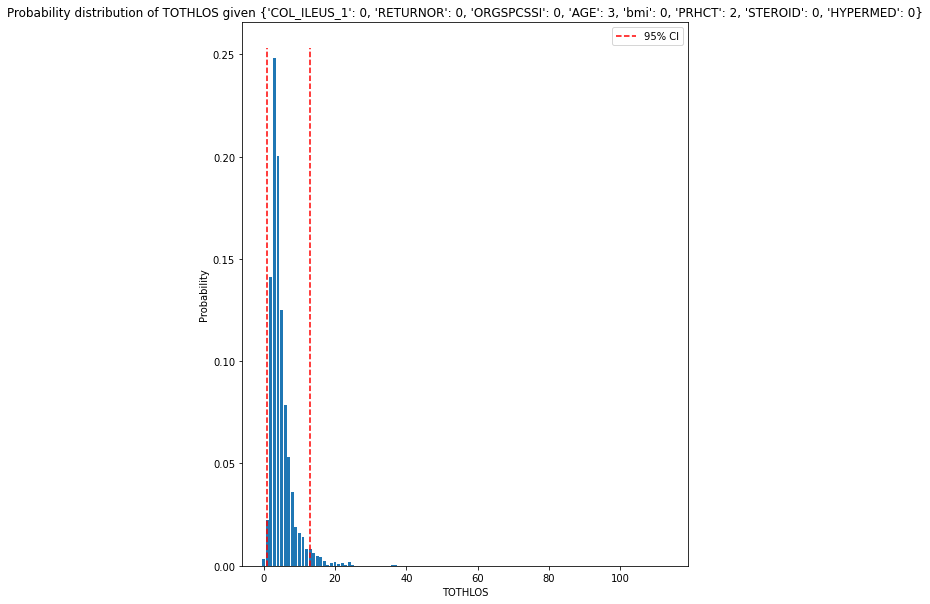

[bnlearn] >Variable Elimination..




+----+-----------+-----------+
|    |   TOTHLOS |         p |
+====+===========+===========+
|  0 |         0 | 0.003185  |
+----+-----------+-----------+
|  1 |         1 | 0.0120928 |
+----+-----------+-----------+
|  2 |         2 | 0.0789016 |
+----+-----------+-----------+
|  3 |         3 | 0.141893  |
+----+-----------+-----------+
|  4 |         4 | 0.117078  |
+----+-----------+-----------+
RangeIndex(start=0, stop=114, step=1)


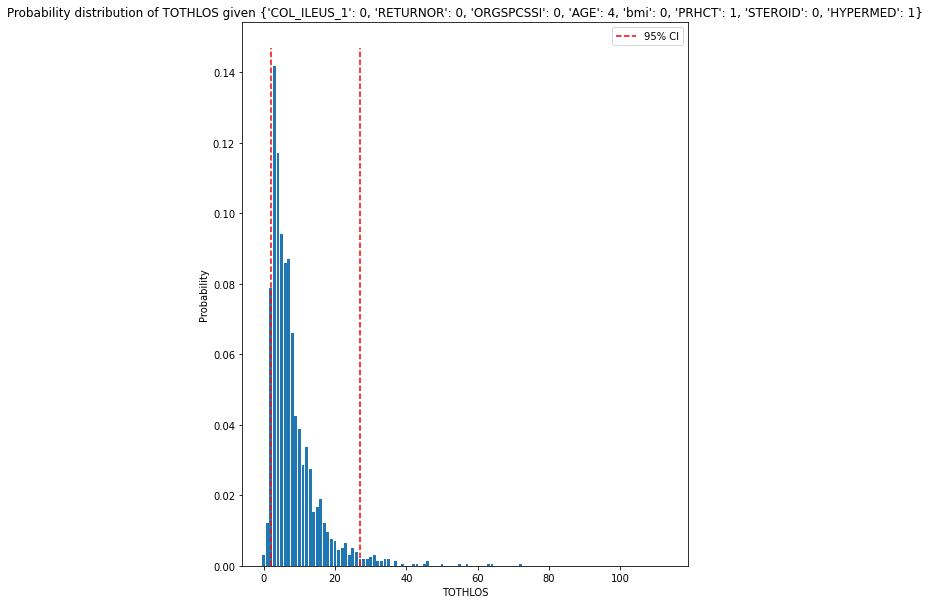

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000206534 |
+----+-----------+-------------+
|  1 |         1 | 0.000206534 |
+----+-----------+-------------+
|  2 |         2 | 0.0725365   |
+----+-----------+-------------+
|  3 |         3 | 0.217197    |
+----+-----------+-------------+
|  4 |         4 | 0.0725365   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


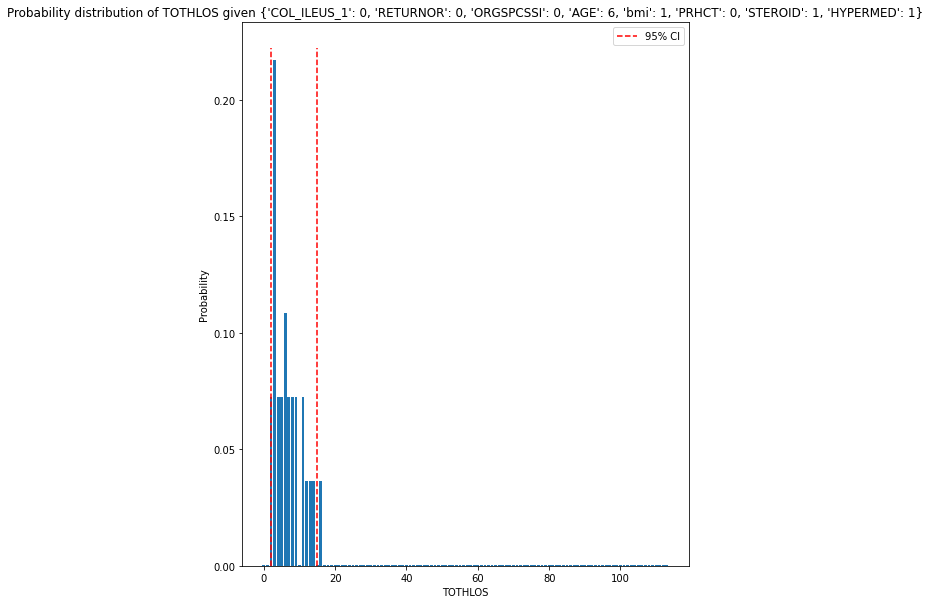

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 5.71861e-06 |
+----+-----------+-------------+
|  1 |         1 | 0.00200842  |
+----+-----------+-------------+
|  2 |         2 | 0.0260408   |
+----+-----------+-------------+
|  3 |         3 | 0.0320489   |
+----+-----------+-------------+
|  4 |         4 | 0.0420625   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


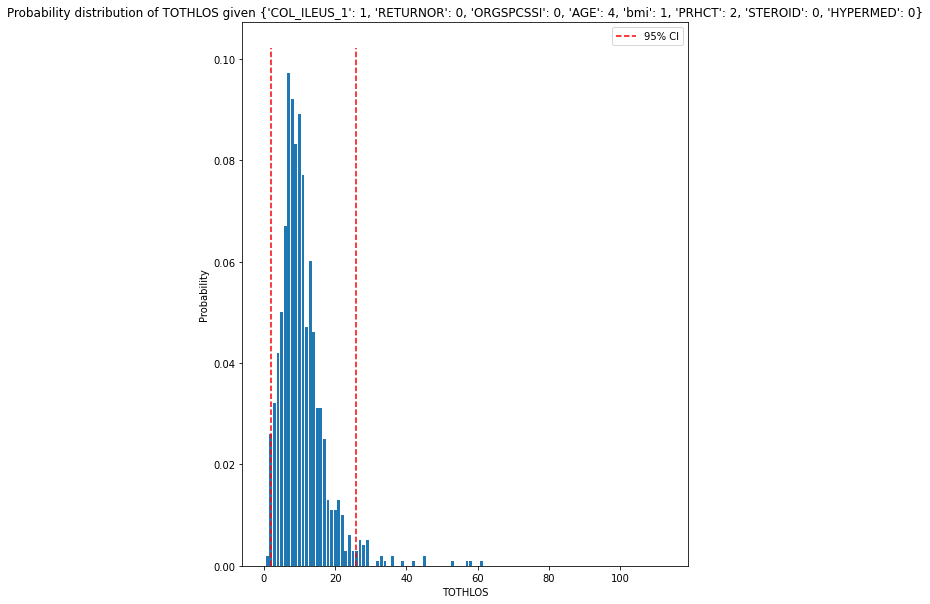

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00528609 |
+----+-----------+------------+
|  1 |         1 | 0.0115873  |
+----+-----------+------------+
|  2 |         2 | 0.11566    |
+----+-----------+------------+
|  3 |         3 | 0.212618   |
+----+-----------+------------+
|  4 |         4 | 0.19717    |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


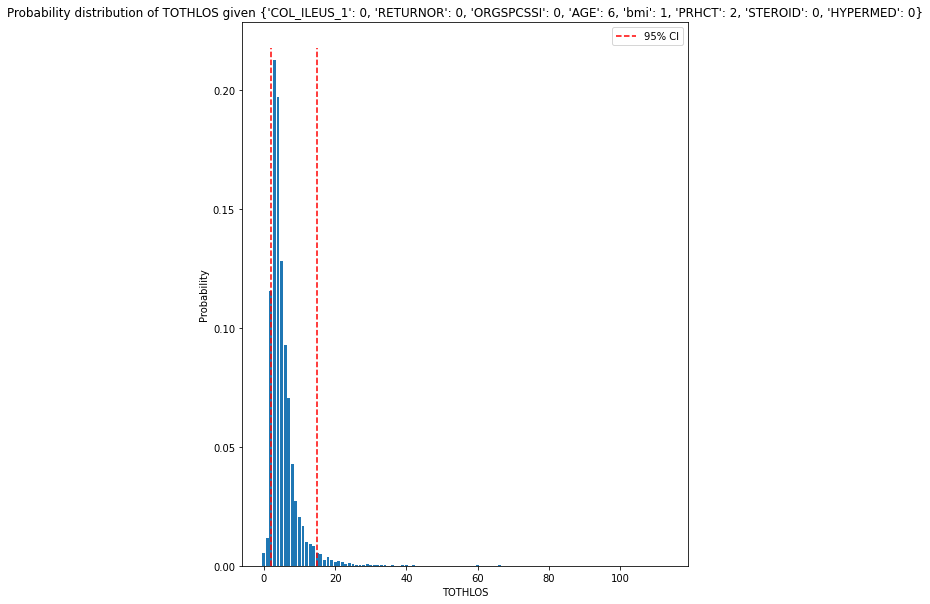

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 8.83341e-05 |
+----+-----------+-------------+
|  1 |         1 | 8.83341e-05 |
+----+-----------+-------------+
|  2 |         2 | 0.061959    |
+----+-----------+-------------+
|  3 |         3 | 0.139297    |
+----+-----------+-------------+
|  4 |         4 | 0.139297    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


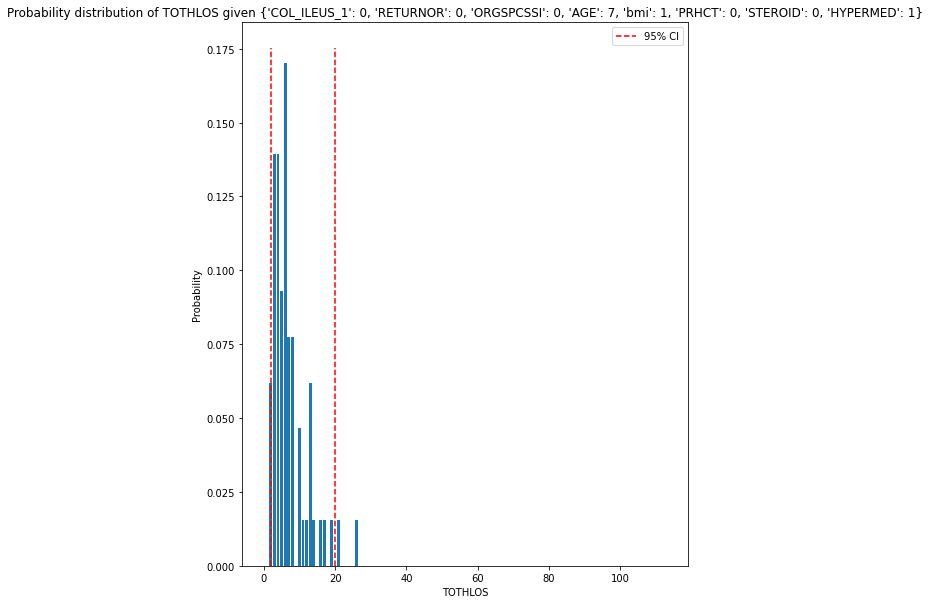

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 4.24125e-05 |
+----+-----------+-------------+
|  1 |         1 | 0.00746902  |
+----+-----------+-------------+
|  2 |         2 | 0.0520286   |
+----+-----------+-------------+
|  3 |         3 | 0.178281    |
+----+-----------+-------------+
|  4 |         4 | 0.133721    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


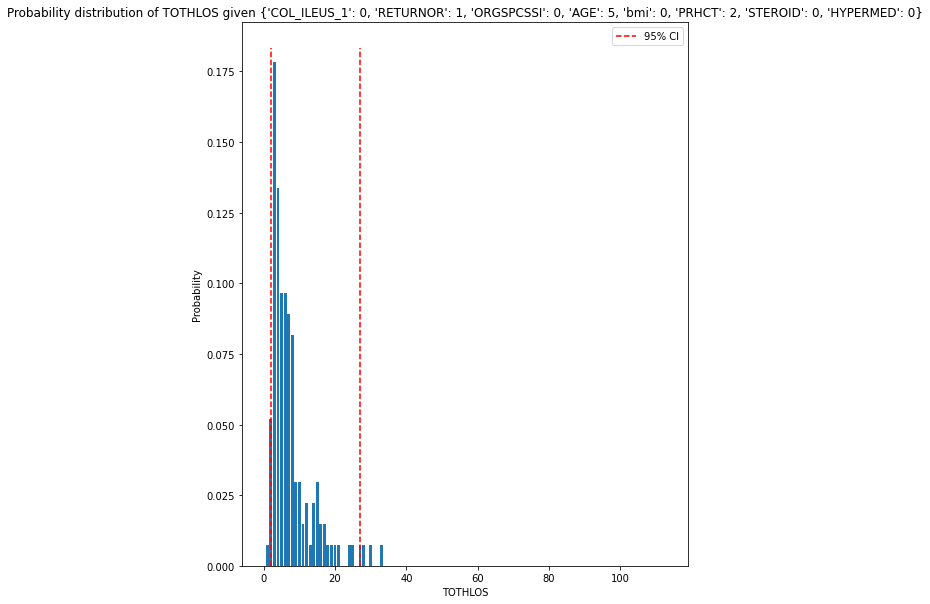

[bnlearn] >Variable Elimination..




+----+-----------+-----------+
|    |   TOTHLOS |         p |
+====+===========+===========+
|  0 |         0 | 0.0077998 |
+----+-----------+-----------+
|  1 |         1 | 0.0323034 |
+----+-----------+-----------+
|  2 |         2 | 0.204386  |
+----+-----------+-----------+
|  3 |         3 | 0.253393  |
+----+-----------+-----------+
|  4 |         4 | 0.187122  |
+----+-----------+-----------+
RangeIndex(start=0, stop=114, step=1)


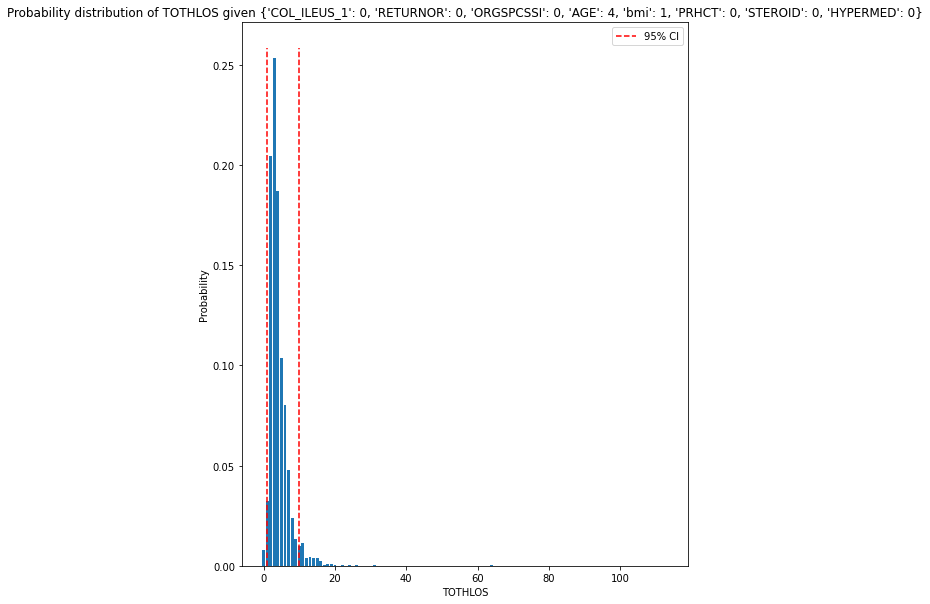

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.000180433 |
+----+-----------+-------------+
|  1 |         1 | 0.031775    |
+----+-----------+-------------+
|  2 |         2 | 0.158153    |
+----+-----------+-------------+
|  3 |         3 | 0.221342    |
+----+-----------+-------------+
|  4 |         4 | 0.316126    |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


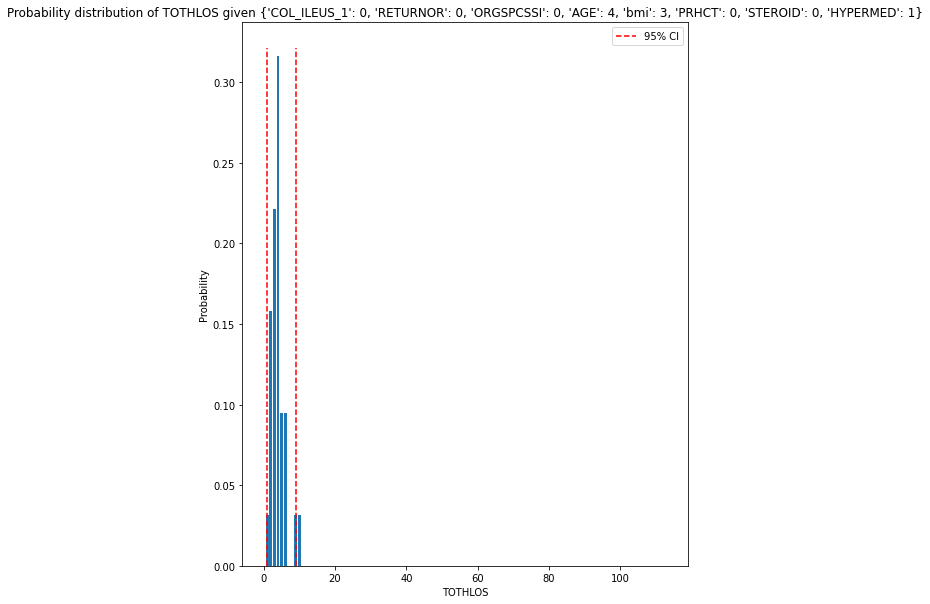

[bnlearn] >Variable Elimination..




+----+-----------+-------------+
|    |   TOTHLOS |           p |
+====+===========+=============+
|  0 |         0 | 0.00251647  |
+----+-----------+-------------+
|  1 |         1 | 1.42897e-05 |
+----+-----------+-------------+
|  2 |         2 | 0.010023    |
+----+-----------+-------------+
|  3 |         3 | 0.0150274   |
+----+-----------+-------------+
|  4 |         4 | 0.0175296   |
+----+-----------+-------------+
RangeIndex(start=0, stop=114, step=1)


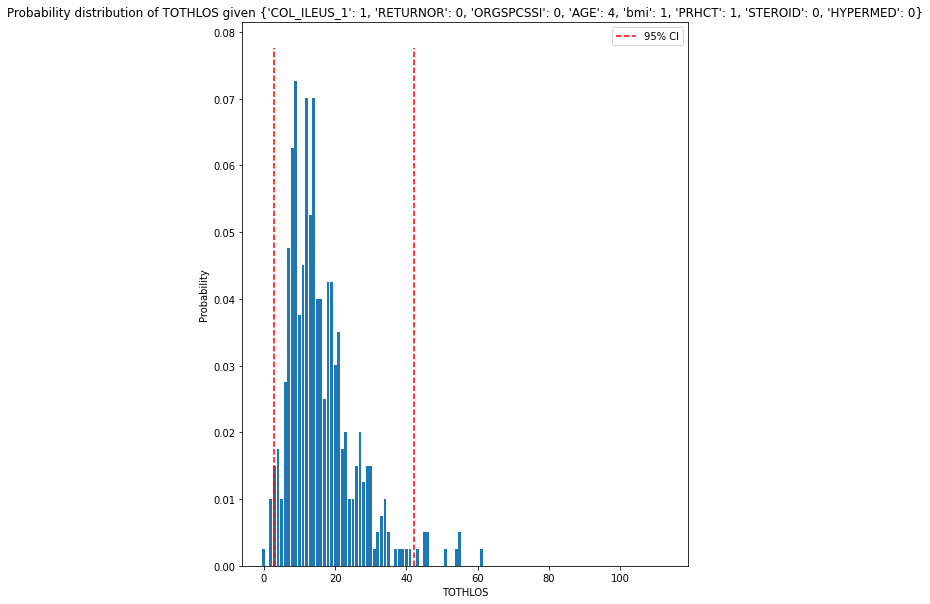

[bnlearn] >Variable Elimination..




+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00194841 |
+----+-----------+------------+
|  1 |         1 | 0.00648605 |
+----+-----------+------------+
|  2 |         2 | 0.0758472  |
+----+-----------+------------+
|  3 |         3 | 0.145857   |
+----+-----------+------------+
|  4 |         4 | 0.142615   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)


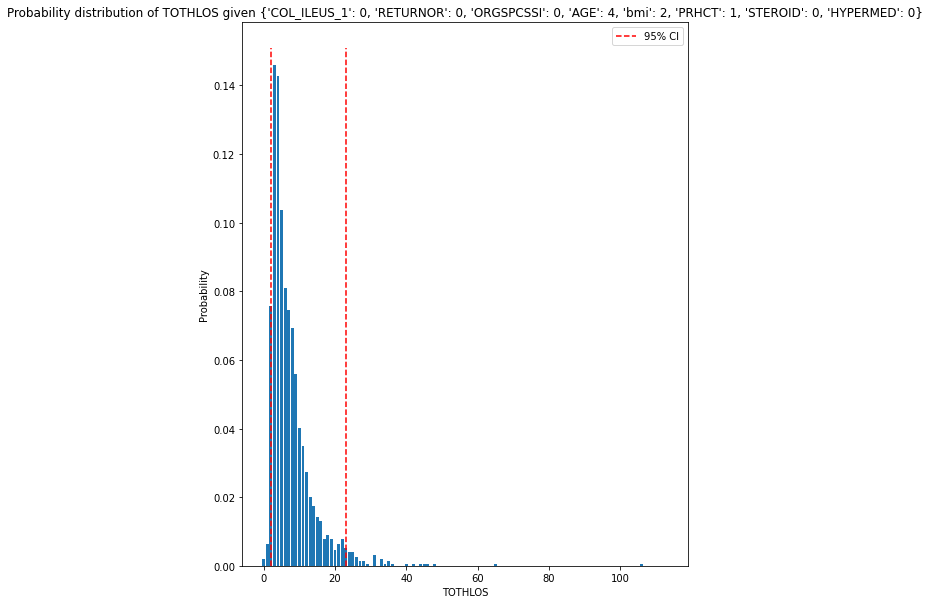

In [42]:
X = inference(temp, model)

In [23]:
def eval_met(true, predicted, flag = 'mse'):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    med_ae = median_absolute_error(true, predicted)
    if flag == 'mae':
        return mae
    elif flag == 'mse':
        return mse
    elif flag == 'rmse':
        return rmse
    elif flag == 'med_ae':
        return med_ae
    else:
        return mae, mse, rmse, med_ae

In [33]:
def pred_days_vs_actual(df):
    #w_0 through w_7
    df['num'] = np.abs(df['pred_tothlos'] - df['TOTHLOS'])
    df['w_0'] = np.where(df['num'] == 0, 1, 0)
    df['w_1'] = np.where(df['num'] <= 1, 1, 0)
    df['w_2'] = np.where(df['num'] <= 2, 1, 0)
    df['w_3'] = np.where(df['num'] <= 3, 1, 0)
    df['w_4'] = np.where(df['num'] <= 4, 1, 0)
    df['w_5'] = np.where(df['num'] <= 5, 1, 0)
    df['w_6'] = np.where(df['num'] <= 6, 1, 0)
    df['w_7'] = np.where(df['num'] <= 7, 1, 0)

In [45]:
X

,COL_ILEUS_1,RETURNOR,ORGSPCSSI,AGE,bmi,PRHCT,STEROID,HYPERMED,pred_tothlos,p,CI95_lower,CI95_upper,lower_pval,upper_pval,TOTHLOS,in_CI95
0,0,0,0,3,1,0,0,1,3.0,0.247366,1.0,10.0,0.480245,0.767121,3.0,1.0
1,0,0,0,1,0,2,1,0,3.0,0.242423,2.0,16.0,0.099271,0.983712,2.0,1.0
2,0,0,0,1,0,2,1,0,3.0,0.242423,2.0,16.0,0.099271,0.983712,1.0,0.0
3,0,0,0,3,1,0,0,0,3.0,0.247366,1.0,10.0,0.033535,0.997277,9.0,1.0
4,1,0,0,5,1,1,0,0,9.0,0.078055,3.0,47.0,0.320076,0.757978,3.0,1.0
5,0,0,0,4,2,2,0,1,3.0,0.251885,1.0,12.0,0.463553,0.788332,3.0,1.0
6,0,0,0,4,2,2,0,1,3.0,0.251885,1.0,12.0,0.463553,0.788332,4.0,1.0
7,0,0,0,3,0,1,0,1,3.0,0.177572,2.0,26.0,0.253985,0.923587,3.0,1.0
8,0,0,0,4,1,2,0,0,3.0,0.249219,2.0,13.0,0.636308,0.561401,26.0,0.0
9,0,0,0,4,1,2,0,0,3.0,0.249219,2.0,13.0,0.636308,0.561401,1.0,0.0


In [46]:
pred_days_vs_actual(X)

In [47]:
X

,COL_ILEUS_1,RETURNOR,ORGSPCSSI,AGE,bmi,PRHCT,STEROID,HYPERMED,pred_tothlos,p,CI95_lower,CI95_upper,lower_pval,upper_pval,TOTHLOS,in_CI95,num,w_1,w_2,w_3
0,0,0,0,3,1,0,0,1,3.0,0.247366,1.0,10.0,0.480245,0.767121,3.0,1.0,0.0,1,0,0
1,0,0,0,1,0,2,1,0,3.0,0.242423,2.0,16.0,0.099271,0.983712,2.0,1.0,1.0,1,0,0
2,0,0,0,1,0,2,1,0,3.0,0.242423,2.0,16.0,0.099271,0.983712,1.0,0.0,2.0,0,1,0
3,0,0,0,3,1,0,0,0,3.0,0.247366,1.0,10.0,0.033535,0.997277,9.0,1.0,6.0,0,0,0
4,1,0,0,5,1,1,0,0,9.0,0.078055,3.0,47.0,0.320076,0.757978,3.0,1.0,6.0,0,0,0
5,0,0,0,4,2,2,0,1,3.0,0.251885,1.0,12.0,0.463553,0.788332,3.0,1.0,0.0,1,0,0
6,0,0,0,4,2,2,0,1,3.0,0.251885,1.0,12.0,0.463553,0.788332,4.0,1.0,1.0,1,0,0
7,0,0,0,3,0,1,0,1,3.0,0.177572,2.0,26.0,0.253985,0.923587,3.0,1.0,0.0,1,0,0
8,0,0,0,4,1,2,0,0,3.0,0.249219,2.0,13.0,0.636308,0.561401,26.0,0.0,23.0,0,0,0
9,0,0,0,4,1,2,0,0,3.0,0.249219,2.0,13.0,0.636308,0.561401,1.0,0.0,2.0,0,1,0


In [49]:
eval_met(X['TOTHLOS'], X['pred_tothlos'], flag = 'all')

(8.850877192982455, 1305.622807017544, 36.133402926067504, 3.0)

In [ ]:
#confidence intervals by excluding top and bottom 2.5% for each patients prob dist.
#find prob of greater and less than the TOTHLOS (p-value)-- this will show the expected dist.
#patient plots for distribution, the 95% CI and the patient value, p-value
#some type of SHAP thing for TOTHLOS
#calculate some distance metric like MAE for pred_tothlos and TOTHLOS
#calculate whether or not the patient was in the CI or not (outlier 2.0)
# patient upper p value < .05 (patient stayed too long)
# patient lower p value < .05 (patient stayed too short)
# 7 or 8 (patient is an outlier)
# calculated whether the predicted was within 1-3 days of the actual--just a binary value (3 columns)
# do eval metrics like auc, precision etc for the 0/1 variables
# fishers exact test -- (kinda like chi squared)

## Bayes DAG large

In [6]:
cols = pd.DataFrame(df.columns)
cols

,0
0,female
1,inpatient
2,diabetes
3,SMOKE
4,VENTILAT
5,HXCOPD
6,ASCITES
7,HXCHF
8,HYPERMED
9,RENAFAIL


In [7]:
# Define the network structure
edges = [('COL_ILEUS_1', 'TOTHLOS'),
         ('RETURNOR', 'TOTHLOS'),
         ('ORGSPCSSI', 'TOTHLOS'),
         ('ORGSPCSSI', 'AGE'),
         ('bmi', 'TOTHLOS'),
         ('bmi', 'ORGSPCSSI'),
         ('bmi', 'AGE'), 
         ('PRHCT', 'TOTHLOS'),
         ('AGE', 'STEROID'),
         ('AGE', 'HYPERMED'),
         ('AGE', 'TOTHLOS'),
         ('STEROID', 'HYPERMED'),
         ('STEROID', 'TOTHLOS'),
         ('AGE', 'SUPINFEC'),
         ('RETURNOR', 'SUPINFEC'),
         ('COL_ILEUS_1', 'SUPINFEC'),
         ('STEROID', 'SUPINFEC'),
         ('PRHCT', 'SUPINFEC'),
         ('ORGSPCSSI', 'SUPINFEC'),
         ('bmi', 'SUPINFEC'),
         ('AGE', 'OUPNEUMO'),
         ('HYPERMED', 'OUPNEUMO'),
         ('COL_ILEUS_1', 'OUPNEUMO'),
         ('STEROID', 'OUPNEUMO'),
         ('PRHCT', 'OUPNEUMO'),
         ('ORGSPCSSI', 'OUPNEUMO'),
         ('bmi', 'OUPNEUMO'),
         ('AGE', 'URNINFEC'),
         ('COL_ILEUS_1', 'URNINFEC'),
         ('STEROID', 'URNINFEC'),
         ('PRHCT', 'URNINFEC'),
         ('bmi', 'URNINFEC'),
         ('AGE', 'OTHSYSEP'),
         ('RETURNOR', 'OTHSYSEP'),
         ('COL_ILEUS_1', 'OTHSYSEP'),
         ('STEROID', 'OTHSYSEP'),
         ('PRHCT', 'OTHSYSEP'),
         ('ORGSPCSSI', 'OTHSYSEP'),
         ('bmi', 'OTHSYSEP'),
         ('AGE', 'WNDINF'),
         ('RETURNOR', 'WNDINF'),
         ('COL_ILEUS_1', 'WNDINF'),
         ('STEROID', 'WNDINF'),
         ('ORGSPCSSI', 'WNDINF'),
         ('bmi', 'WNDINF'),
         ('AGE', 'OTHDVT'),
         ('COL_ILEUS_1', 'OTHDVT'),
         ('STEROID', 'OTHDVT'),
         ('ORGSPCSSI', 'OTHDVT'),
         ('bmi', 'OTHDVT'),
         ('AGE', 'PULEMBOL'),
         ('COL_ILEUS_1', 'PULEMBOL'),
         ('STEROID', 'PULEMBOL'),
         ('ORGSPCSSI', 'PULEMBOL'),
         ('bmi', 'PULEMBOL'),
         ('AGE', 'CDMI'),
         ('HYPERMED', 'CDMI'),
         ('COL_ILEUS_1', 'CDMI'),
         ('STEROID', 'CDMI'),
         ('PRHCT', 'CDMI'),
         ('ORGSPCSSI', 'CDMI'),
         ('bmi', 'CDMI'),
         ('AGE', 'CDARREST'),
         ('HYPERMED', 'CDARREST'),
         ('COL_ILEUS_1', 'CDARREST'),
         ('STEROID', 'CDARREST'),
         ('PRHCT', 'CDARREST'),
         ('ORGSPCSSI', 'CDARREST'),
         ('bmi', 'CDARREST'),
         ('AGE', 'CNSCVA'),
         ('HYPERMED', 'CNSCVA'),
         ('COL_ILEUS_1', 'CNSCVA'),
         ('STEROID', 'CNSCVA'),
         ('PRHCT', 'CNSCVA'),
         ('ORGSPCSSI', 'CNSCVA'),
         ('bmi', 'CNSCVA'),
         ('AGE', 'REINTUB'),
         ('RETURNOR', 'REINTUB'),
         ('HYPERMED', 'REINTUB'),
         ('COL_ILEUS_1', 'REINTUB'),
         ('STEROID', 'REINTUB'),
         ('PRHCT', 'REINTUB'),
         ('ORGSPCSSI', 'REINTUB'),
         ('bmi', 'REINTUB'),
         ('AGE', 'OPRENAFL'),
         ('RETURNOR', 'OPRENAFL'),
         ('HYPERMED', 'OPRENAFL'),
         ('COL_ILEUS_1', 'OPRENAFL'),
         ('STEROID', 'OPRENAFL'),
         ('PRHCT', 'OPRENAFL'),
         ('ORGSPCSSI', 'OPRENAFL'),
         ('bmi', 'OPRENAFL'),
         ('AGE', 'RENAINSF'),
         ('RETURNOR', 'RENAINSF'),
         ('HYPERMED', 'RENAINSF'),
         ('COL_ILEUS_1', 'RENAINSF'),
         ('STEROID', 'RENAINSF'),
         ('PRHCT', 'RENAINSF'),
         ('ORGSPCSSI', 'RENAINSF'),
         ('bmi', 'RENAINSF'),
         ('AGE', 'OTHBLEED'),
         ('RETURNOR', 'OTHBLEED'),
         ('HYPERMED', 'OTHBLEED'),
         ('COL_ILEUS_1', 'OTHBLEED'),
         ('STEROID', 'OTHBLEED'),
         ('PRHCT', 'OTHBLEED'),
         ('ORGSPCSSI', 'OTHBLEED'),
         ('bmi', 'OTHBLEED'), 
         ('AGE', 'unplanned'),
         ('RETURNOR', 'unplanned'),
         ('HYPERMED', 'unplanned'),
         ('COL_ILEUS_1', 'unplanned'),
         ('STEROID', 'unplanned'),
         ('ORGSPCSSI', 'unplanned'),
         ('bmi', 'unplanned')
         ]

# Make the actual Bayesian DAG
DAG = bn.make_DAG(edges)

[bnlearn] >bayes DAG created.


[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


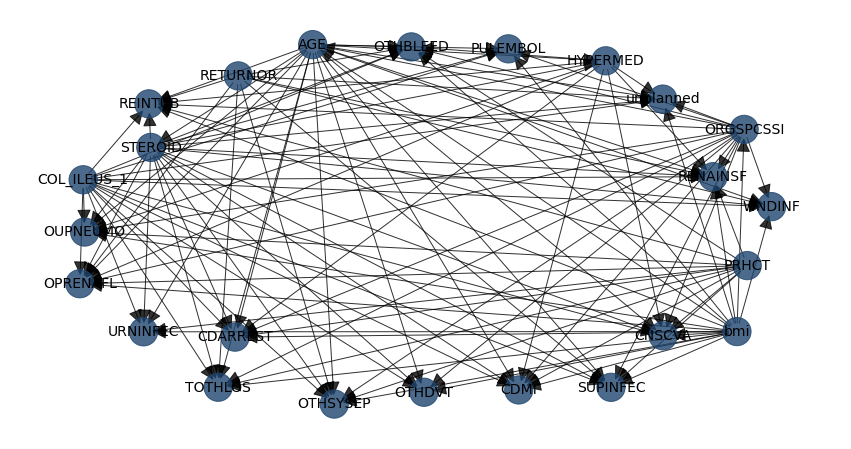

{'pos': {'COL_ILEUS_1': array([-0.96245765,  0.25049962]),
  'TOTHLOS': array([-0.57990841, -0.90023899]),
  'RETURNOR': array([-0.52296426,  0.82680023]),
  'ORGSPCSSI': array([0.91049742, 0.52981281]),
  'AGE': array([-0.31204426,  1.        ]),
  'bmi': array([ 0.89016516, -0.5914448 ]),
  'PRHCT': array([ 0.91922201, -0.22550071]),
  'STEROID': array([-0.77075678,  0.42996954]),
  'HYPERMED': array([0.51865158, 0.91038967]),
  'SUPINFEC': array([ 0.53333608, -0.9007076 ]),
  'OUPNEUMO': array([-0.95834308, -0.03940593]),
  'URNINFEC': array([-0.79149324, -0.5928061 ]),
  'OTHSYSEP': array([-0.25099217, -0.99357836]),
  'WNDINF': array([0.98830408, 0.10150297]),
  'OTHDVT': array([ 0.00323426, -0.92804455]),
  'PULEMBOL': array([0.24252333, 0.97674744]),
  'CDMI': array([ 0.27188326, -0.91530036]),
  'CDARREST': array([-0.53206075, -0.62228313]),
  'CNSCVA': array([ 0.68089958, -0.61519742]),
  'REINTUB': array([-0.77609236,  0.67161488]),
  'OPRENAFL': array([-0.97191581, -0.326076

In [8]:
bn.plot(DAG)

In [9]:
cols_to_keep = ['COL_ILEUS_1', 
                'TOTHLOS', 
                'RETURNOR', 
                'ORGSPCSSI', 
                'AGE', 
                'bmi', 
                'PRHCT', 
                'STEROID', 
                'HYPERMED', 
                'SUPINFEC',
                'OUPNEUMO',
                'URNINFEC',
                'OTHSYSEP',
                'WNDINF',
                'OTHDVT',
                'PULEMBOL', 
                'CDMI', 
                'CDARREST', 
                'CNSCVA', 
                'REINTUB', 
                'OPRENAFL',
                'RENAINSF', 
                'OTHBLEED',
                'unplanned']
df_big = df[cols_to_keep]

In [10]:
model = bn.parameter_learning.fit(DAG, df_big)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of COL_ILEUS_1:
+----------------+----------+
| COL_ILEUS_1(0) | 0.840203 |
+----------------+----------+
| COL_ILEUS_1(1) | 0.159797 |
+----------------+----------+
[bnlearn] >CPD of TOTHLOS:
+----------------+-----+---------------------+
| AGE            | ... | AGE(7)              |
+----------------+-----+---------------------+
| COL_ILEUS_1    | ... | COL_ILEUS_1(1)      |
+----------------+-----+---------------------+
| ORGSPCSSI      | ... | ORGSPCSSI(1)        |
+----------------+-----+---------------------+
| PRHCT          | ... | PRHCT(2)            |
+----------------+-----+---------------------+
| RETURNOR       | ... | RETURNOR(1)         |
+----------------+-----+---------------------+
| STEROID        | ... | STEROID(1)          |
+----------------+-----+---------------------+
| bmi            | ... | bmi(3)              |
+----------------+-----+---------------------+
| TOTHLOS(0.0)   | ..

+-------------+-----+----------------+----------------+
| AGE         | ... | AGE(7)         | AGE(7)         |
+-------------+-----+----------------+----------------+
| COL_ILEUS_1 | ... | COL_ILEUS_1(1) | COL_ILEUS_1(1) |
+-------------+-----+----------------+----------------+
| HYPERMED    | ... | HYPERMED(1)    | HYPERMED(1)    |
+-------------+-----+----------------+----------------+
| ORGSPCSSI   | ... | ORGSPCSSI(1)   | ORGSPCSSI(1)   |
+-------------+-----+----------------+----------------+
| PRHCT       | ... | PRHCT(2)       | PRHCT(2)       |
+-------------+-----+----------------+----------------+
| STEROID     | ... | STEROID(1)     | STEROID(1)     |
+-------------+-----+----------------+----------------+
| bmi         | ... | bmi(2)         | bmi(3)         |
+-------------+-----+----------------+----------------+
| OUPNEUMO(0) | ... | 0.5            | 0.5            |
+-------------+-----+----------------+----------------+
| OUPNEUMO(1) | ... | 0.5            | 0.5      

+-------------+-----+----------------+----------------+
| AGE         | ... | AGE(7)         | AGE(7)         |
+-------------+-----+----------------+----------------+
| COL_ILEUS_1 | ... | COL_ILEUS_1(1) | COL_ILEUS_1(1) |
+-------------+-----+----------------+----------------+
| HYPERMED    | ... | HYPERMED(1)    | HYPERMED(1)    |
+-------------+-----+----------------+----------------+
| ORGSPCSSI   | ... | ORGSPCSSI(1)   | ORGSPCSSI(1)   |
+-------------+-----+----------------+----------------+
| PRHCT       | ... | PRHCT(2)       | PRHCT(2)       |
+-------------+-----+----------------+----------------+
| RETURNOR    | ... | RETURNOR(1)    | RETURNOR(1)    |
+-------------+-----+----------------+----------------+
| STEROID     | ... | STEROID(1)     | STEROID(1)     |
+-------------+-----+----------------+----------------+
| bmi         | ... | bmi(2)         | bmi(3)         |
+-------------+-----+----------------+----------------+
| OPRENAFL(0) | ... | 0.5            | 0.5      

In [12]:
temp = bn.sampling(model, 5)

[bnlearn] >Forward sampling for 5 samples..


[bnlearn] >Variable Elimination..



+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00538831 |
+----+-----------+------------+
|  1 |         1 | 0.019144   |
+----+-----------+------------+
|  2 |         2 | 0.151313   |
+----+-----------+------------+
|  3 |         3 | 0.235338   |
+----+-----------+------------+
|  4 |         4 | 0.188454   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)



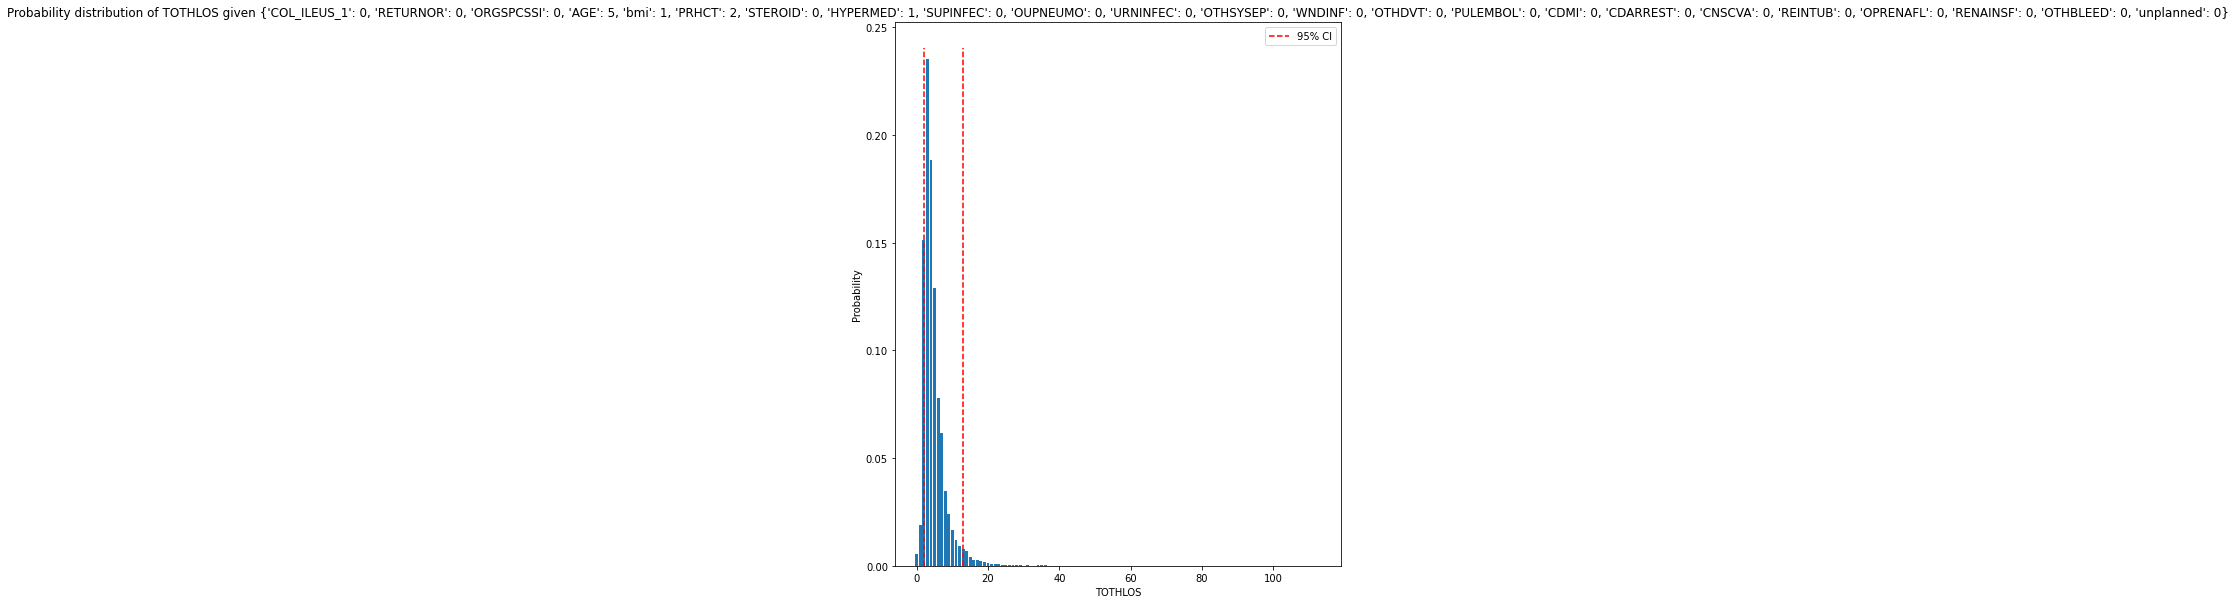

[bnlearn] >Variable Elimination..



+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00506708 |
+----+-----------+------------+
|  1 |         1 | 0.0055735  |
+----+-----------+------------+
|  2 |         2 | 0.0769785  |
+----+-----------+------------+
|  3 |         3 | 0.14889    |
+----+-----------+------------+
|  4 |         4 | 0.159525   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)



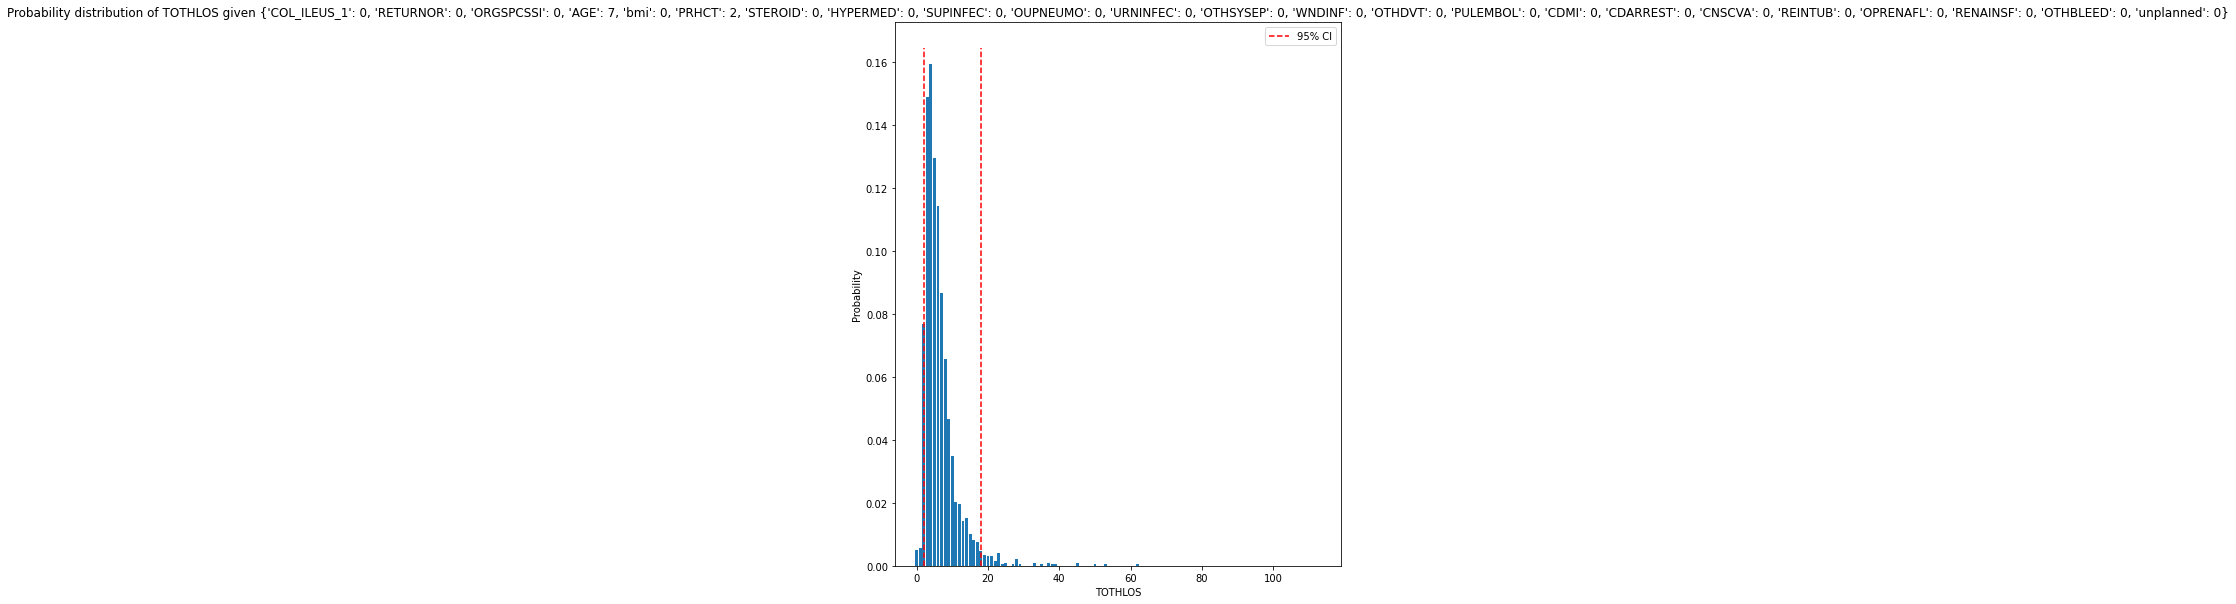

[bnlearn] >Variable Elimination..



+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.0021738  |
+----+-----------+------------+
|  1 |         1 | 0.00649671 |
+----+-----------+------------+
|  2 |         2 | 0.112408   |
+----+-----------+------------+
|  3 |         3 | 0.237773   |
+----+-----------+------------+
|  4 |         4 | 0.194543   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)



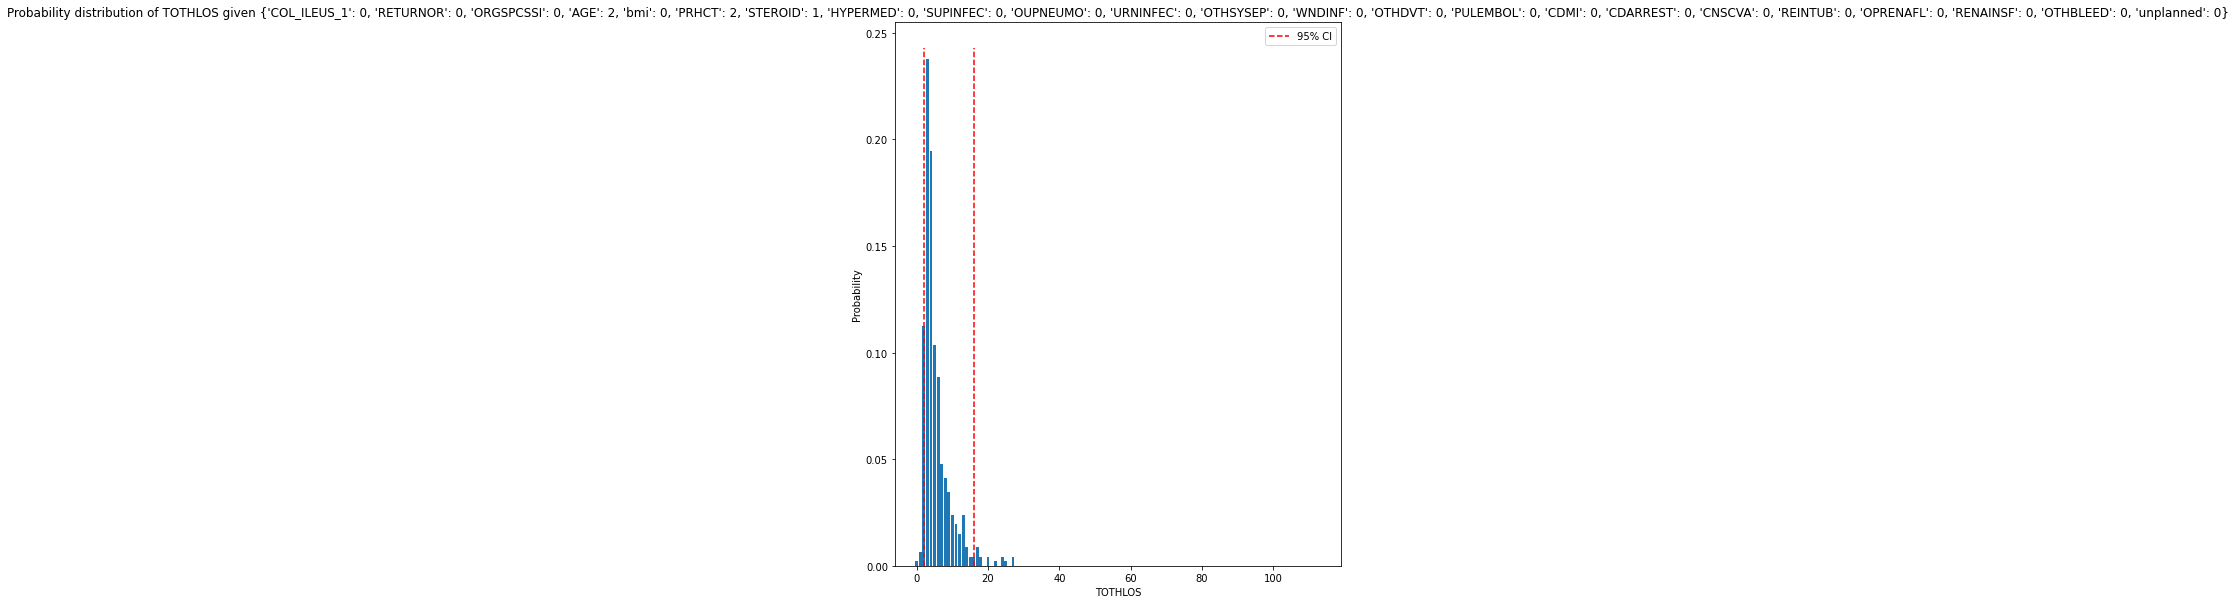

[bnlearn] >Variable Elimination..



+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.0040037  |
+----+-----------+------------+
|  1 |         1 | 0.00633809 |
+----+-----------+------------+
|  2 |         2 | 0.0723678  |
+----+-----------+------------+
|  3 |         3 | 0.146068   |
+----+-----------+------------+
|  4 |         4 | 0.125725   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)



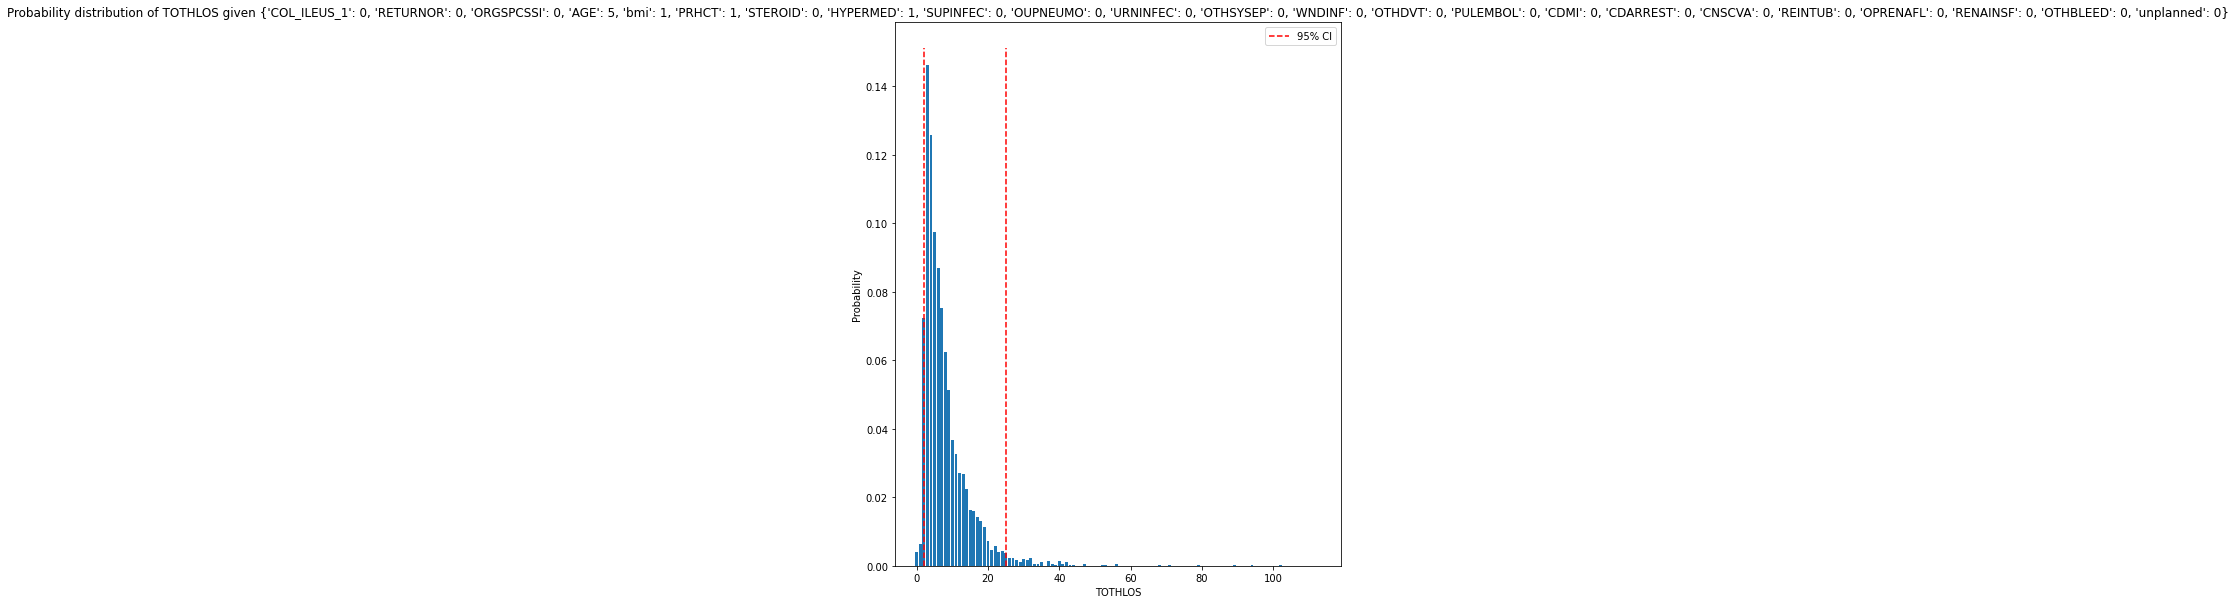

[bnlearn] >Variable Elimination..



+----+-----------+------------+
|    |   TOTHLOS |          p |
+====+===========+============+
|  0 |         0 | 0.00501476 |
+----+-----------+------------+
|  1 |         1 | 0.0154004  |
+----+-----------+------------+
|  2 |         2 | 0.140565   |
+----+-----------+------------+
|  3 |         3 | 0.213622   |
+----+-----------+------------+
|  4 |         4 | 0.184256   |
+----+-----------+------------+
RangeIndex(start=0, stop=114, step=1)



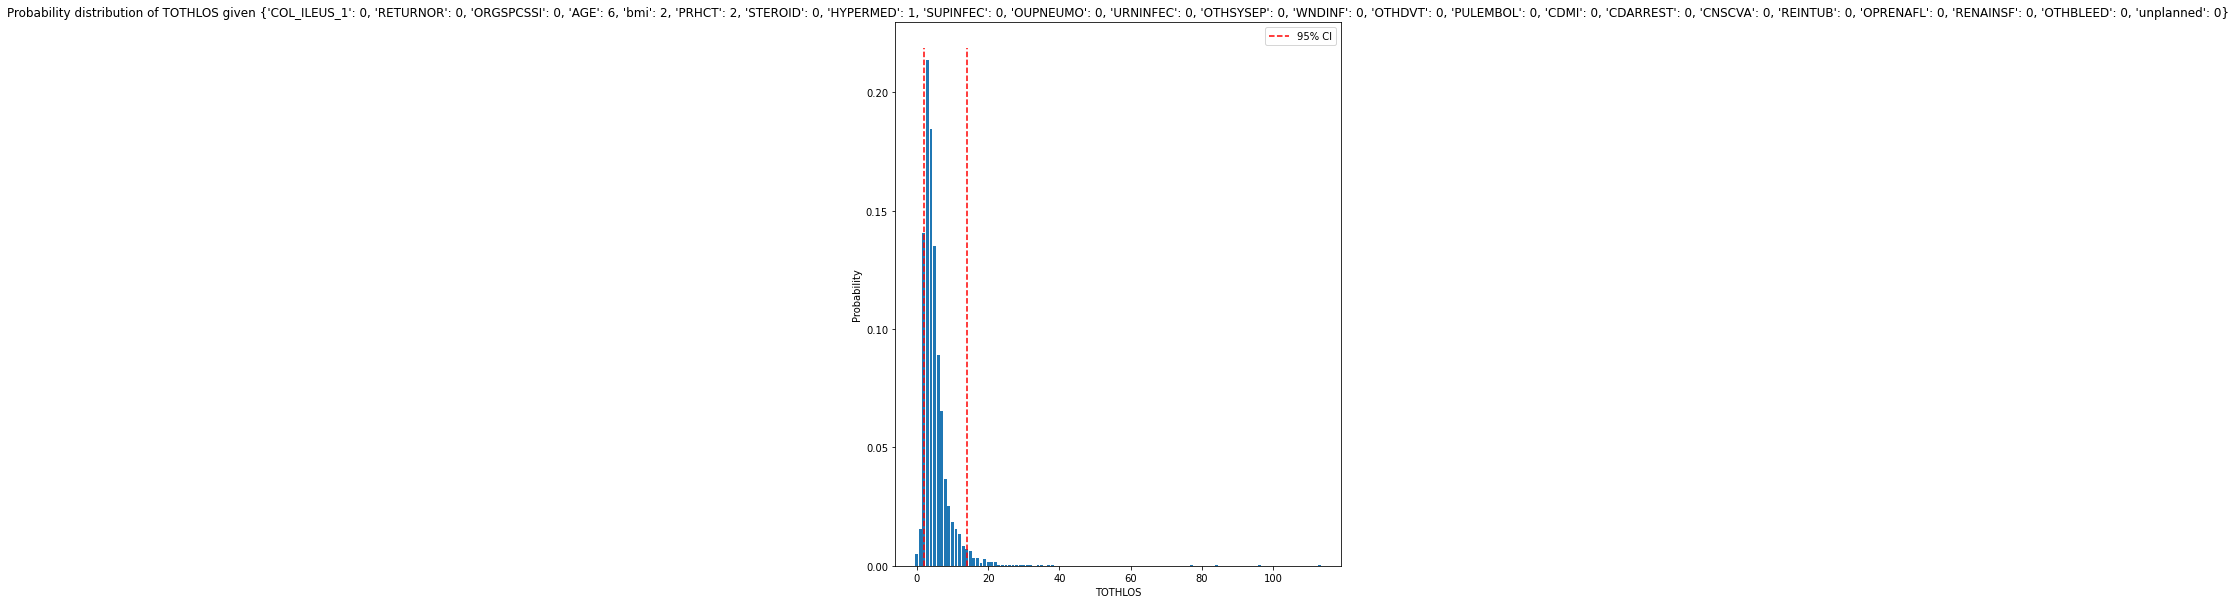

In [20]:
X = inference(temp, model)

In [21]:
X

,COL_ILEUS_1,RETURNOR,ORGSPCSSI,AGE,bmi,PRHCT,STEROID,HYPERMED,SUPINFEC_x,OUPNEUMO_x,...,OTHBLEED_y,unplanned_y,pred_tothlos,p,CI95_lower,CI95_upper,lower_pval,upper_pval,TOTHLOS,in_CI95
0,0,0,0,5,1,2,0,1,0,0,...,0,0,3.0,0.235338,2.0,13.0,0.599638,0.588816,4.0,1.0
1,0,0,0,7,0,2,0,0,0,0,...,0,0,4.0,0.159525,2.0,18.0,0.640133,0.474320,6.0,1.0
2,0,0,0,2,0,2,1,0,0,0,...,0,0,3.0,0.237773,2.0,16.0,0.121079,0.991329,2.0,1.0
3,0,0,0,5,1,1,0,1,0,0,...,0,0,3.0,0.146068,2.0,25.0,0.614291,0.461078,7.0,1.0
4,0,0,0,6,2,2,0,1,0,0,...,0,0,3.0,0.213622,2.0,14.0,0.160980,0.979585,2.0,1.0


In [34]:
pred_days_vs_actual(X)

In [35]:
X

,COL_ILEUS_1,RETURNOR,ORGSPCSSI,AGE,bmi,PRHCT,STEROID,HYPERMED,SUPINFEC_x,OUPNEUMO_x,...,in_CI95,num,w_1,w_2,w_3,w_0,w_4,w_5,w_6,w_7
0,0,0,0,5,1,2,0,1,0,0,...,1.0,1.0,1,1,1,0,1,1,1,1
1,0,0,0,7,0,2,0,0,0,0,...,1.0,2.0,0,1,1,0,1,1,1,1
2,0,0,0,2,0,2,1,0,0,0,...,1.0,1.0,1,1,1,0,1,1,1,1
3,0,0,0,5,1,1,0,1,0,0,...,1.0,4.0,0,0,0,0,1,1,1,1
4,0,0,0,6,2,2,0,1,0,0,...,1.0,1.0,1,1,1,0,1,1,1,1


In [32]:
eval_met(X['TOTHLOS'], X['pred_tothlos'], all)

(1.8, 4.6, 2.1447610589527217, 1.0)

In [ ]:
#calculate accuracy for within days (do this up to a week) number of 1s/total number of rows
#do accuracy for within 95% CI as well
#plot p value distribution for all patients (should look uniform) (one for upper one for lower)
#pickle data and pickle model
#put functions into python script
#pickle the output
#use the map function: https://stackoverflow.com/questions/1704401/is-there-a-simple-process-based-parallel-map-for-python
#estimate runtime for all patients

## Pruning

In [17]:
df_test = train[['TOTHLOS', 'COL_ILEUS_1', 'RETURNOR', 'bmi']]
df_test

,TOTHLOS,COL_ILEUS_1,RETURNOR,bmi
160818,3.0,1,1,1
151312,9.0,1,0,0
167740,64.0,0,0,2
176898,2.0,0,0,1
48756,16.0,0,0,2
...,...,...,...,...
37123,4.0,0,0,0
126476,2.0,0,0,2
162923,6.0,0,0,0
30183,3.0,0,0,3


In [37]:
# Keep only significant edges
DAG = bn.independence_test(DAG, train, prune=True)

[bnlearn] >Compute edge strength with [chi_square]


In [63]:
evidence = ['COL_ILEUS_1', 'RETURNOR', 'bmi']
vals1, freqs1 = np.unique(df_test[evidence[0]], return_counts = True)
vals2, freqs2 = np.unique(df_test[evidence[1]], return_counts = True)
vals3, freqs3 = np.unique(df_test[evidence[2]], return_counts = True)
print(vals1, vals2, vals3)
p01 = list(itertools.product(vals1, repeat = 2))
df = pd.DataFrame(p01)
df

[0 1] [0 1] [0 1 2 3]


,0,1
0,0,0
1,0,1
2,1,0
3,1,1


[bnlearn]> Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


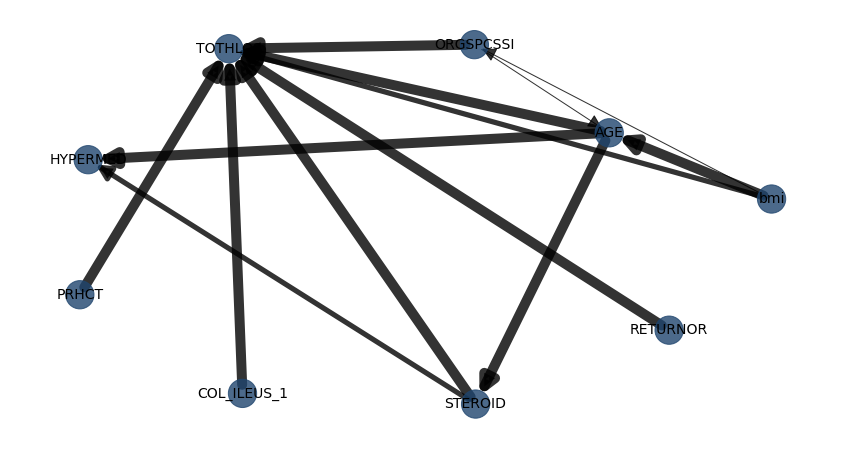

{'pos': {'COL_ILEUS_1': array([-0.44077173, -0.80998388]),
  'TOTHLOS': array([-0.47802055,  0.82890998]),
  'RETURNOR': array([ 0.72100427, -0.50938935]),
  'ORGSPCSSI': array([0.19066786, 0.84802747]),
  'AGE': array([0.55793166, 0.42886667]),
  'bmi': array([1.        , 0.11413014]),
  'PRHCT': array([-0.88377266, -0.34097011]),
  'STEROID': array([ 0.19401886, -0.86066898]),
  'HYPERMED': array([-0.86105772,  0.30107805])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f9d719262b0>,
 'node_properties': {'COL_ILEUS_1': {'node_color': '#1f456e',
   'node_size': 800},
  'TOTHLOS': {'node_color': '#1f456e', 'node_size': 800},
  'RETURNOR': {'node_color': '#1f456e', 'node_size': 800},
  'ORGSPCSSI': {'node_color': '#1f456e', 'node_size': 800},
  'AGE': {'node_color': '#1f456e', 'node_size': 800},
  'bmi': {'node_color': '#1f456e', 'node_size': 800},
  'PRHCT': {'node_color': '#1f456e', 'node_size': 800},
  'STEROID': {'node_color': '#1f456e', 'node_size': 800},
  'HYPERMED': {'node_colo

In [39]:
bn.plot(DAG)

In [57]:
df_1 = bn.import_example('asia')
edges1 = [('smoke', 'lung'),
         ('smoke', 'bronc'),
         ('lung', 'xray'),
         ('bronc', 'xray')]
DAG1 = bn.make_DAG(edges1, verbose=0)
model1 = bn.parameter_learning.fit(DAG1, df_1, verbose=3)
Xtest = bn.sampling(model1, n=1000)
Pout = bn.predict(model1, Xtest, variables=['bronc','xray'])
print(Pout)

[bnlearn] >Extracting files..



[bnlearn] >Removing columns from dataframe to make consistent with DAG [['asia' 'tub' 'either' 'dysp']]
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of smoke:
+----------+----------+
| smoke(0) | 0.494909 |
+----------+----------+
| smoke(1) | 0.505091 |
+----------+----------+
[bnlearn] >CPD of lung:
+---------+---------------------+---------------------+
| smoke   | smoke(0)            | smoke(1)            |
+---------+---------------------+---------------------+
| lung(0) | 0.13592946362968406 | 0.05543556515478762 |
+---------+---------------------+---------------------+
| lung(1) | 0.864070536370316   | 0.9445644348452124  |
+---------+---------------------+---------------------+
[bnlearn] >CPD of bronc:
+----------+--------------------+--------------------+
| smoke    | smoke(0)           | smoke(1)           |
+----------+--------------------+--------------------+
| bronc(0) | 0.5929463629684056 | 0.3250539956803456 |
+----------+-----------

100%|██████████| 4/4 [00:00<00:00, 118.86it/s]


[bnlearn]> Remaining columns for inference: 2
     bronc  xray         p
0        1     1  0.621823
1        0     1  0.543667
2        0     1  0.543667
3        1     1  0.621823
4        1     1  0.621823
..     ...   ...       ...
995      1     0  0.497256
996      0     1  0.543667
997      0     1  0.543667
998      1     1  0.621823
999      0     1  0.543667

[1000 rows x 3 columns]
